##### LIBRARIES AND ORDERED DICT

In [637]:
#standard libraries
import pandas as pd, numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#text
import re

#maths and statistics
import math
import statistics

#unpack dict
import ast

#store and manage
from collections import Counter
from collections import OrderedDict

#geography
from geopy.geocoders import Nominatim

#date and time
from datetime import datetime
import time

#statistical testing
import scipy.stats as stats
import statsmodels.api as sm

#preprocessing
import category_encoders
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler

#machine learning
from sklearn import metrics
from sklearn import model_selection
from sklearn import feature_selection

from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm

#hyperparameters
import optuna
from optuna import Trial, study, samplers

#web framework
from flask import Flask, request, jsonify

#serializing and deserializing objects
import pickle

#logging
from loguru import logger

import logging

In [2]:
#create an ordered dict to store model results
review = OrderedDict([
    ('model', []),
    ('type', []),
    ('features', []),
    ('hyperparameters', []),
    ('learning time', []),
    ('MAE, test', []),
    ('MSE, test', []),
    ('MAPE, test', []),
    ('R2, test', [])
    ]
)

##### DATA DESCRIPTION

➔ **status** — sale status; \
➔ **private pool** and **PrivatePool** — availability of a private pool; \
➔ **propertyType** - property type; \
➔ **street** — property address; \
➔ **baths** — number of bathrooms; \
➔ **homeFacts** — property construction information (contains several types of information that affect property valuation); \
➔ **fireplace** — presence of a fireplace; \
➔ **city** — city; \
➔ **schools** — information about schools in the area; \
➔ **sqft** — square footage; \
➔ **zipcode** — postal code; \
➔ **beds** — number of bedrooms; \
➔ **state** — state; \
➔ **stories** — number of floors; \
➔ **mls-id** and **MlsId** — MLS (Multiple Listing Service) identifier; \
➔ **target** — the price of the real estate object (the target feature that needs to be predicted).

### **DATA INTRODUCTION**

In [3]:
original_data = pd.read_csv('data/real_estate.csv')
original_data.head(2)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

**basic statistics**

In [5]:
original_data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


In [6]:
original_data.describe(include=object)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


**null values**

In [7]:
original_data.isnull().sum()[original_data.isnull().sum() > 0]

status           39918
private pool    373004
propertyType     34733
street               2
baths           106338
fireplace       274071
city                34
sqft             40577
beds             91282
stories         150716
mls-id          352243
PrivatePool     336874
MlsId            66880
target            2481
dtype: int64

**duplicates**

In [8]:
print(f'original dimension: {original_data.shape}')

original_data = original_data.drop_duplicates()

print(f'dimension without duplicates: {original_data.shape}')

original dimension: (377185, 18)
dimension without duplicates: (377135, 18)


### **DATA TRANSFORMATION**

- долгий и трудоёмкий процесс заполнения пустых значений и преобразования данных в читаемый и удобный формат;
- для каждого отдельного признака используется метод join() для объединения всех элементов признака в список > набор > список, а затем экспортируется признак в Excel для сортировки и идентификации элементов, что позволяет выявить потенциальные сходства в данных и точки для исправления данных.

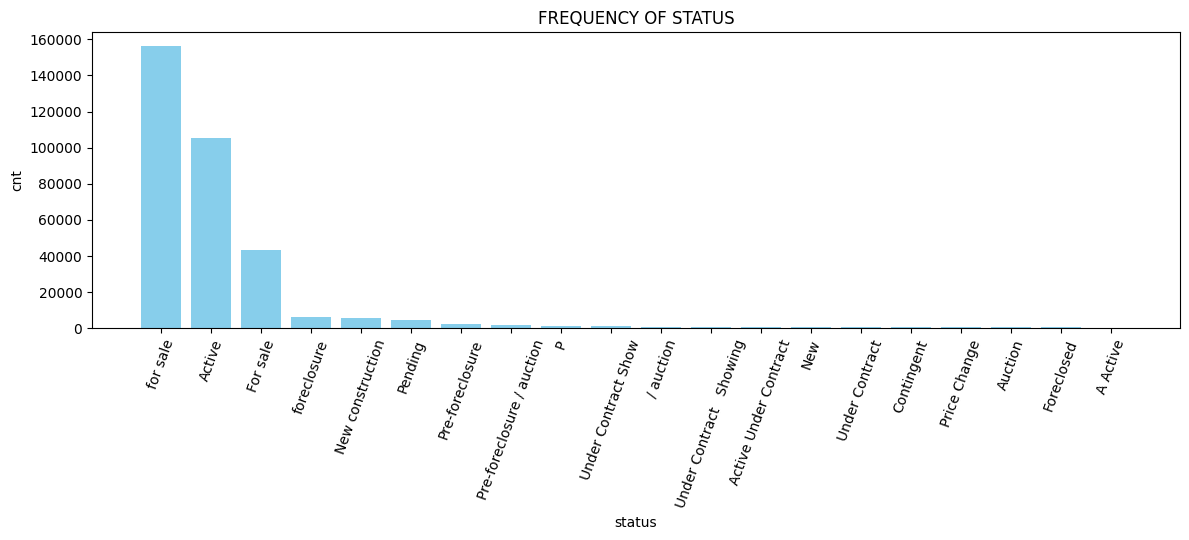

In [9]:
status_cnt = original_data['status'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(status_cnt.index,
        status_cnt.values,
        color='skyblue')

plt.xlabel('status',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF STATUS')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [10]:
original_data['status'].isnull().sum()[original_data['status'].isnull().sum() > 0]

array([39917])

In [11]:
original_data['status'] = original_data['status'].fillna('private')

original_data['status'] = original_data['status'].apply(lambda x: str(x).lower())
original_data['status'] = original_data['status'].apply(lambda x: str(x).replace('  ', ''))

- В основном использовал Google для идентификации различных статусов в объявлениях о недвижимости и того, что могут означать сокращения слов
- Сортировал элементы по группам на основе интуитивного восприятия

In [12]:
def group_the_status(table: pd.DataFrame):
  
  '''
    > identify elements in status and sort them into relevant listing status groups
  '''
  
  if 'auction' in str(table['status']):
    return 'auction'

  elif any(element in str(table['status']) for element in ['backup', 'back up', 'bckp', 'continue to show', 'showing']) or (str(table['status']) == 'pending ab') or (str(table['status']) == 'ps'):
    return 'backup'

  elif ('sold' in str(table['status'])) or (str(table['status']) == 'closed') or (str(table['status']) == 'accepted offer'):
    return 'closed'

  elif ('foreclos' in str(table['status'])) or (str(table['status']) == 'ct'):
    return 'foreclosure'

  elif (str(table['status']) == 'lease/purchase') or (str(table['status']) == 'lease/purchase pending'):
    return 'lease'

  elif any(element in str(table['status']) for element in ['conting', 'contract', 'pending']) or (str(table['status']) == 'p') or (str(table['status']) == 'pf') or (str(table['status']) == 'pi') or \
   (str(table['status']) == 'active option') or (str(table['status']) == 'active with offer') or (str(table['status']) == 'c continue show') or (str(table['status']) == 'due diligence period'):
    return 'contingent'

  elif ('coming soon' in str(table['status'])) or (str(table['status']) == 'c') or (str(table['status']) == 'temporary active'):
    return 'coming soon'

  elif (str(table['status']) == 'a active') or (str(table['status']) == 'active') or (str(table['status']) == 'back on market') or (str(table['status']) == 'for sale') or (str(table['status']) == 'listing extended') or \
   (str(table['status']) == 'price change') or (str(table['status']) == 're activated') or (str(table['status']) == 'reactivated'):
    return 'for sale'

  elif (str(table['status']) == 'new') or (str(table['status']) == 'new construction'):
    return 'new construction'

  elif 'rent' in str(table['status']):
    return 'rent'

  elif table['status'] == 'private':
    return 'private listing'

  else:
    return 'no known status'

original_data['listing_status'] = original_data.apply(group_the_status,
                                                      axis=1)

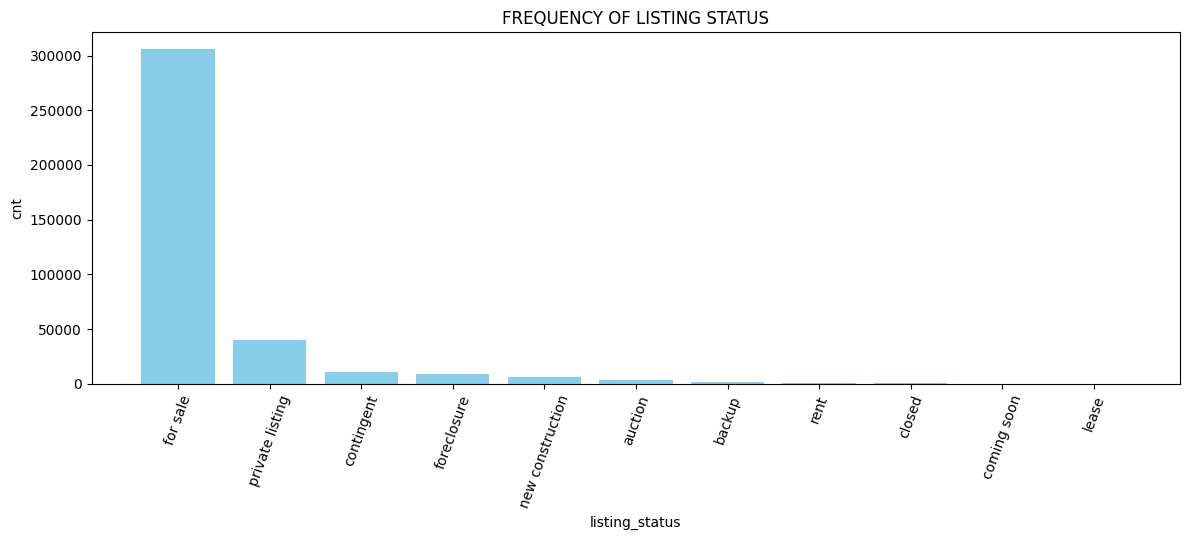

In [13]:
l_status_cnt = original_data['listing_status'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(l_status_cnt.index,
        l_status_cnt.values,
        color='skyblue')

plt.xlabel('listing_status',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF LISTING STATUS')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [14]:
original_data['listing_status'].isnull().sum()[original_data['listing_status'].isnull().sum() > 0]

array([], dtype=int64)

In [15]:
original_data['listing_status'].value_counts()

listing_status
for sale            305880
private listing      39917
contingent           10462
foreclosure           9353
new construction      6164
auction               3070
backup                1412
rent                   412
closed                 311
coming soon            150
lease                    4
Name: count, dtype: int64

Дополнительная очистка не нужна, кроме потенциального удаления приватных listings в случае нерелевантных прогнозов

In [16]:
original_data['listing_status'] = original_data['listing_status'].astype('string')

In [17]:
original_data = original_data.drop(['status'],
                                   axis=1)

#### **private pool**

- анализировать взаимосвязи: если один признак отсутствует, а другой есть, ориентироваться на имеющийся признак, и vice versa

- оба параметра означают одно и то же, поэтому можно использовать любой из них, изучить и взять данные из доступного источника

In [18]:
print(original_data['private pool'].isnull().sum()[original_data['private pool'].isnull().sum() > 0])
print(original_data['PrivatePool'].isnull().sum()[original_data['PrivatePool'].isnull().sum() > 0])

[372954]
[336825]


In [19]:
original_data['private pool'] = original_data['private pool'].fillna('No')
original_data['PrivatePool'] = original_data['PrivatePool'].fillna('No')

original_data['private pool'] = original_data['private pool'].apply(lambda x: str(x).lower())
original_data['PrivatePool'] = original_data['PrivatePool'].apply(lambda x: str(x).lower())

In [20]:
def consolidate_the_pool(table: pd.DataFrame):
  
  '''
    > populate the private pool feature as either yes or no based on the availability of data in either of the two columns
  '''
  
  if table['private pool'] == table['PrivatePool']:
    return table['private pool']
  elif table['private pool'] == 'yes':
    return table['private pool']
  elif table['PrivatePool'] == 'yes':
    return table['PrivatePool']
  else:
    return 'no'

original_data['private_pool'] = original_data.apply(consolidate_the_pool,
                                                    axis=1)

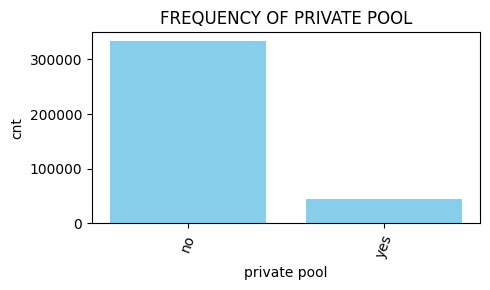

In [21]:
ppool_cnt = original_data['private_pool'].value_counts()

plt.figure(figsize=(5, 3))
plt.bar(ppool_cnt.index,
        ppool_cnt.values,
        color='skyblue')

plt.xlabel('private pool',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PRIVATE POOL')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [22]:
original_data['private_pool'].value_counts()

private_pool
no     332644
yes     44491
Name: count, dtype: int64

In [23]:
original_data['private_pool'].isnull().sum()[original_data['private_pool'].isnull().sum() > 0]

array([], dtype=int64)

Дальнейшая очистка не требуется — практически исключены аномалии, ведь свойство либо имеет бассейн, либо не имеет

In [24]:
original_data['private_pool'] = original_data['private_pool'].astype('string')

In [25]:
original_data = original_data.drop(['private pool', 'PrivatePool'],
                                   axis=1)

#### **fireplace**

- Выполнил краткий анализ видов каминов
- Самыми распространенными вариантами стали электрические, газовые и работающие на дровах

In [26]:
original_data['fireplace'].isnull().sum()[original_data['fireplace'].isnull().sum() > 0]

array([274024])

In [27]:
original_data['fireplace'].value_counts()

fireplace
yes                                                                   50353
Yes                                                                   20856
1                                                                     14544
2                                                                      2432
Not Applicable                                                         1993
                                                                      ...  
Den, Kitchen, Living Room, Natural Gas, Wood burning w/Gas Starter        1
Den, Great Room                                                           1
Dining Area, Fireplace - Gas, Wet Bar, Balcony Access, Built-Ins          1
Firepit, Gas Fireplace, Two Way Fireplace                                 1
Masonry, Wood Burning, Two                                                1
Name: count, Length: 1652, dtype: int64

In [28]:
original_data['fireplace'] = original_data['fireplace'].apply(lambda x: str(x).lower())

In [29]:
def group_the_fireplace(table: pd.DataFrame):
  
  '''
    > identify elements in fireplace and sort them into relevant fireplace type groups
  '''
  
  if (str(table['fireplace']) == 'not applicable') or (str(table['fireplace']) == 'no fireplace') or (str(table['fireplace']) == 'no'):
    result = 'no fireplace'

  elif (str(table['fireplace']) == 'nan') or (str(table['fireplace']) == '0') or any(element in str(table['fireplace']) for element in ['furn', 'inoperative', 'n/k', 'non']):
    result = 'no fireplace'

  elif any(element in str(table['fireplace']) for element in ['free', 'mason', 'pellet', 'wood']):
    result = 'woodburning'

  elif any(element in str(table['fireplace']) for element in ['artif', 'electric']):
    result = 'electric'

  elif any(element in str(table['fireplace']) for element in ['gas', 'propane']):
    result = 'gas'

  elif any(element in str(table['fireplace']) for element in ['fire', 'fireplace', 'fp', 'frplc', 'hearth', 'heatilator',
                                                              'metal', 'prefab', 'pre-fab', 'see th', 'stone', 'yes', 'coal']):
    result = 'unknown type'

  elif (str(table['fireplace']) == 'one') or (str(table['fireplace']) == 'yes') or any(element in str(table['fireplace']) for element in ['brick']):
    result = 'unknown type'

  elif any(element in str(table['fireplace']) for element in ['1', '2', '3', '4', '5',
                                                              '6', '7', '8', '9', '10']):
    result = 'unknown type'

  elif str(table['fireplace']) == 'one' or any(element in str(table['fireplace']) for element in ['two', 'three', 'four', 'five',
                                                                                                  'six', 'seven', 'eight', 'nine']):
    result = 'unknown type'

  else:
    result = 'no fireplace'

  return result

original_data['type_of_fireplace'] = original_data.apply(group_the_fireplace,
                                                         axis=1)

In [30]:
original_data['type_of_fireplace'].value_counts()

type_of_fireplace
no fireplace    280481
unknown type     91455
gas               2922
woodburning       2098
electric           179
Name: count, dtype: int64

Создать новый признак, показывающий, есть ли в собственности камин или нет

In [31]:
original_data['availability_of_fireplace'] = original_data['type_of_fireplace'].apply(lambda x: 'no' if x == 'no fireplace' else 'yes')

In [32]:
original_data['availability_of_fireplace'].value_counts()

availability_of_fireplace
no     280481
yes     96654
Name: count, dtype: int64

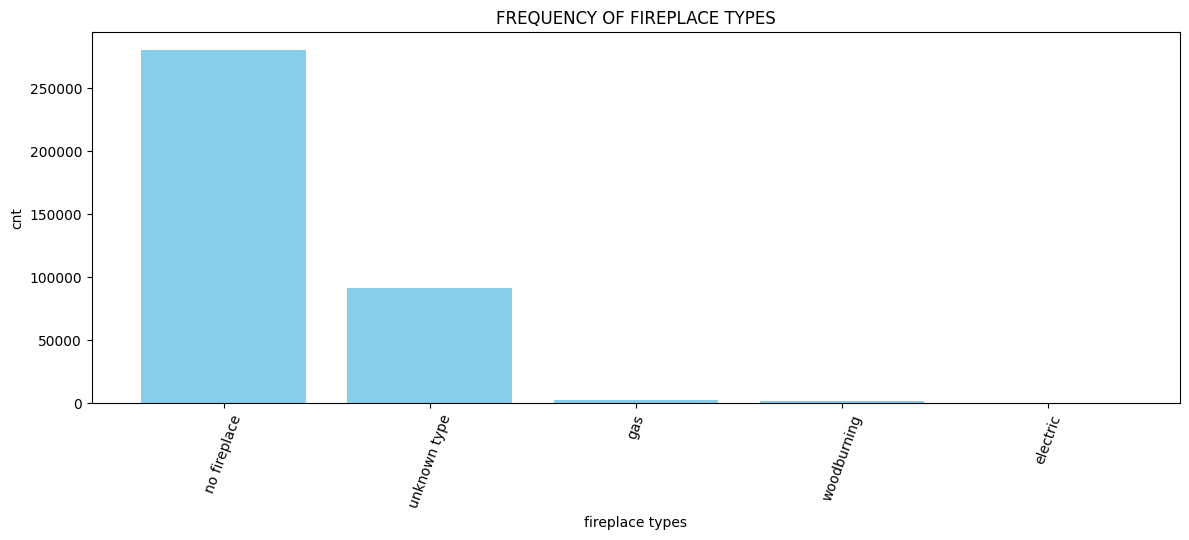

In [33]:
fireplace_types_cnt = original_data['type_of_fireplace'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(fireplace_types_cnt.index,
        fireplace_types_cnt.values,
        color='skyblue')

plt.xlabel('fireplace types',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF FIREPLACE TYPES')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

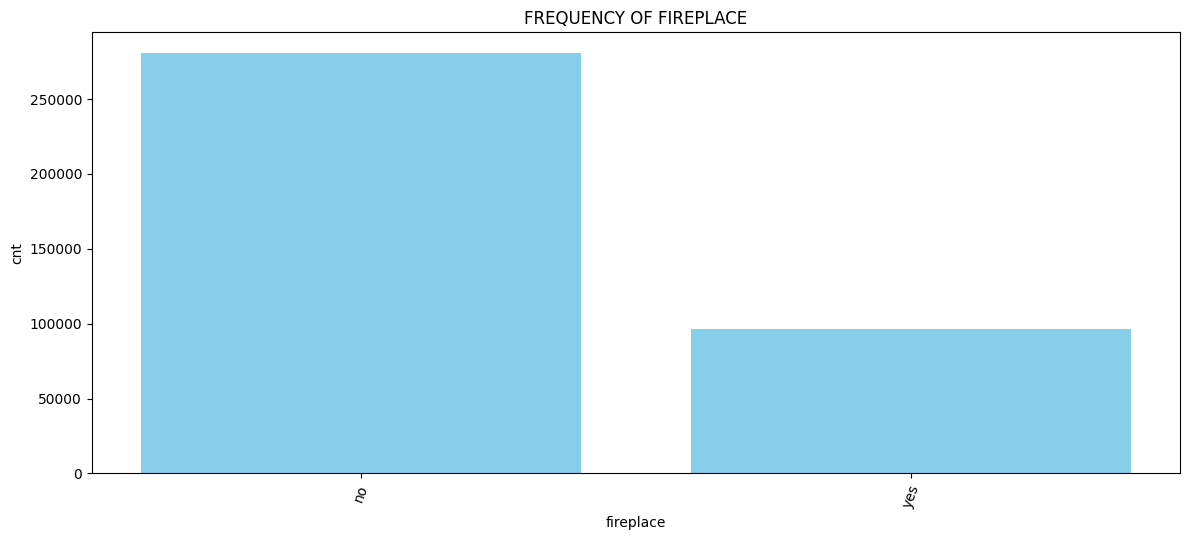

In [34]:
fireplace_cnt = original_data['availability_of_fireplace'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(fireplace_cnt.index,
        fireplace_cnt.values,
        color='skyblue')

plt.xlabel('fireplace',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF FIREPLACE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [35]:
original_data['availability_of_fireplace'].isnull().sum()[original_data['availability_of_fireplace'].isnull().sum() > 0]

array([], dtype=int64)

In [36]:
original_data['type_of_fireplace'].isnull().sum()[original_data['type_of_fireplace'].isnull().sum() > 0]

array([], dtype=int64)

- Дополнительная очистка данных не требуется, маловероятно наличие выбросов - либо у объекта есть камин, либо нет
- но необходимо следить за признаком отопления, если отопление пустое, то его нужно скорректировать, чтобы включить источник тепла > т.е. камин

In [37]:
original_data['availability_of_fireplace'] = original_data['availability_of_fireplace'].astype('string')
original_data['type_of_fireplace'] = original_data['type_of_fireplace'].astype('string')

In [38]:
original_data = original_data.drop('fireplace',
                                   axis=1)

#### **target**

In [39]:
original_data['target'].isnull().sum()[original_data['target'].isnull().sum() > 0]

array([2480])

In [40]:
original_data['target'] = original_data['target'].apply(lambda x: str(x).replace('$', '').replace(',', '').replace('+', ''))
original_data['target'] = original_data['target'].apply(lambda x: str(x).replace('/mo', ''))
original_data['target'] = original_data['target'].apply(lambda x: str(x).split('-')[0])
original_data['target'] = original_data['target'].apply(lambda x: str(x).replace('nan', '0'))

original_data['target'] = original_data['target'].astype('float64')

In [41]:
original_data['target'].isnull().sum()[original_data['target'].isnull().sum() > 0]

array([], dtype=int64)

In [42]:
original_data['target'] = original_data['target'].astype('float64')

In [43]:
original_data['target'].describe().round(0)

count       377135.0
mean        640488.0
std        1836062.0
min              0.0
25%         184900.0
50%         319900.0
75%         579000.0
max      195000000.0
Name: target, dtype: float64

Требуется дальнейшая очистка данных, целевая переменная не может быть равна 0 - это означало бы, что объект недвижимости не продается, следовательно, необходимо проверить статус объявления ИЛИ запись не содержит информативных данных для прогнозирования

#### **sq ft**

In [44]:
original_data['sqft'].isnull().sum()[original_data['sqft'].isnull().sum() > 0]

array([40550])

In [45]:
original_data['sqft'].value_counts()

sqft
0                                          11854
1,200 sqft                                   839
1,000 sqft                                   654
1,100 sqft                                   573
1,800 sqft                                   563
                                           ...  
9,093 sqft                                     1
Total interior livable area: 3,257 sqft        1
Total interior livable area: 4,433 sqft        1
444,115 sqft                                   1
10350                                          1
Name: count, Length: 25405, dtype: int64

In [46]:
original_data['sqft'] = original_data['sqft'].fillna('0')

original_data['sqft'] = original_data['sqft'].apply(lambda x: "".join(filter(str.isdigit, x)) if type(x) == str else x)
original_data['sqft'] = pd.to_numeric(original_data['sqft'],
                                      errors='coerce')

original_data['sqft'] = original_data['sqft'].apply(lambda x: str(x).replace('-- sqft', '0').replace('--', '0'))

original_data['sqft'] = original_data['sqft'].astype('float64')

original_data['sqft'] = original_data['sqft'].fillna(0)

In [47]:
original_data['sqft'].isnull().sum()[original_data['sqft'].isnull().sum() > 0]

array([], dtype=int64)

Требуется очистка данных, высока вероятность наличия выбросов, и площадь не может быть равна 0 - необходимо заполнить средними значениями на основе размера участка или типа недвижимости

#### **multiple listings**

- искать точки сопряжения: если одна характеристика отсутствует, но другая присутствует, брать элемент на основе последней, и наоборот
- обе характеристики соответствуют одному и тому же, поэтому любую из них можно заполнить, изучить и использовать доступные данные

In [48]:
print(original_data['mls-id'].isnull().sum()[original_data['mls-id'].isnull().sum() > 0])
print(original_data['MlsId'].isnull().sum()[original_data['MlsId'].isnull().sum() > 0])

[352193]
[66869]


In [49]:
original_data['mls-id'] = original_data['mls-id'].fillna(0)
original_data['MlsId'] = original_data['MlsId'].fillna(0)

In [50]:
def consolidate_the_listings(table: pd.DataFrame):
  
  '''
    > populate the multiple listings feature based on the availability of data in either of the two columns
  '''
  
  if (table['mls-id'] != 0) and (table['MlsId']  == 0):
    return table['mls-id']
  elif (table['mls-id']  == 0) and (table['MlsId'] != 0):
    return table['MlsId']
  else:
    return None

original_data['combined_listings'] = original_data.apply(consolidate_the_listings,
                                                         axis=1)

In [51]:
original_data['combined_listings'] = original_data['combined_listings'].fillna(0)

In [52]:
original_data['combined_listings'].isnull().sum()[original_data['combined_listings'].isnull().sum() > 0]

array([], dtype=int64)

In [53]:
original_data = original_data.drop(['mls-id', 'MlsId'],
                                   axis=1)

Предположительно, идентификатор множественного listings состоит из 9 цифр

In [54]:
original_data['combined_listings'].unique()

array(['611019', '201916904', 'FR19221027', ..., '2152007', '219049831',
       '10374233'], shape=(249013,), dtype=object)

In [55]:
original_data['combined_listings'].value_counts()

combined_listings
0                        41927
NO MLS                      25
No MLS #                    16
 A, Houston, TX 77008       13
No                          12
                         ...  
F10207914                    1
4975368                      1
95301365                     1
A10622323                    1
PAPH847006                   1
Name: count, Length: 249013, dtype: int64

In [56]:
original_data['combined_listings'] = original_data['combined_listings'].apply(lambda x: str(x).lower())

original_data['combined_listings'] = original_data['combined_listings'].apply(lambda x: 0 if len(x) != 9 else x)

In [57]:
original_data['multiple_listings'] = original_data['combined_listings'].apply(lambda x: 'yes' if (str(x).isdigit() and x != 0) else 'no')

In [58]:
original_data['multiple_listings'].value_counts()

multiple_listings
no     357226
yes     19909
Name: count, dtype: int64

Идентификатор множественного листинга сам по себе не содержит информативных данных для прогнозирования

In [59]:
original_data = original_data.drop('combined_listings',
                                   axis=1)

In [60]:
original_data['multiple_listings'] = original_data['multiple_listings'].astype('string')

In [61]:
original_data['multiple_listings'].isnull().sum()[original_data['multiple_listings'].isnull().sum() > 0]

array([], dtype=int64)

Дополнительная очистка данных не требуется, маловероятно наличие выбросов - либо недвижимость была выставлена несколько раз, либо нет

#### **beds**

In [62]:
original_data['beds'].isnull().sum()[original_data['beds'].isnull().sum() > 0]

array([91254])

In [63]:
original_data['beds'].unique()

array(['4', '3 Beds', '5 Beds', ..., '9,565 sqft', '1.74 acres',
       '8,479 sqft'], shape=(1185,), dtype=object)

In [64]:
original_data['beds'] = original_data['beds'].fillna('0')

original_data['beds'] = original_data['beds'].apply(lambda x: str(x).lower())

In [65]:
def condition_for_beds(table: pd.DataFrame):

  '''
    > look through elements and return whether the element is likely to contain the relevant value for number of bedrooms
  '''
  
  def is_float_regex(t: str):
    '''
      > identify whether the string contains a float value
    '''
    return re.fullmatch(r"[-+]?\d*\.?\d+", t) is not None

  text = str(table['beds'])
  tr_text = text.replace(' ', '')

  if text.isdigit():
    result = 'yes'

  elif is_float_regex(text):
    result = 'yes'

  else:
    if tr_text.isalpha():
      result = 'no'
    elif tr_text.isalpha() == False:
      if any(element in text for element in ['acre', 'sqft']):
        result = 'no'
      elif (any(element in text for element in ['bed', 'bedroom', 'bd'])) and (any(char.isdigit() for char in text)):
        result = 'yes'
      else:
        result = 'no'

  return result

original_data['bed_condition'] = original_data.apply(condition_for_beds,
                                                     axis=1)

In [66]:
original_data['bed_condition'].value_counts()

bed_condition
yes    356574
no      20561
Name: count, dtype: int64

In [67]:
original_data = original_data[original_data['bed_condition'] == 'yes']

In [68]:
original_data['beds'] = original_data['beds'].apply(lambda x: str(x).replace(' bd', '').replace(' beds', ''))

In [69]:
def make_corrections_on_beds(table: pd.DataFrame):
  
  '''
    > clean the beds feature to return the number of bedrooms
  '''
  
  text = str(table['beds'])

  def is_float_regex(t: str):
    return re.fullmatch(r"[-+]?\d*\.?\d+", t) is not None

  if is_float_regex(text):
    result = text
  elif any(element in text for element in ['bed', 'bedroom']):
    firstly = text.split(',')
    for b in firstly:
      if any(element in b for element in ['bed', 'bedroom']):
        if any(element in b for element in ['st', 'nd', 'rd', 'th']):
          result = '1'
        else:
          secondly = "".join(filter(str.isdigit, b))
          result = secondly
  else:
    result = '0'

  return result

original_data['number_of_bedrooms'] = original_data.apply(make_corrections_on_beds,
                                                          axis=1)

In [70]:
original_data = original_data.drop(['beds', 'bed_condition'],
                                   axis=1)

In [71]:
original_data['number_of_bedrooms'].unique()

array(['4', '3', '5', '0', '2', '8', '2.0', '1', '3.0', '6', '12', '14',
       '7', '5.0', '4.0', '9', '7.0', '16', '1.0', '6.0', '13', '10',
       '18', '20', '0.0', '32', '11', '26', '64', '144', '22', '24', '15',
       '10.0', '8.0', '28', '36', '19', '48', '25', '17', '27', '40',
       '47', '23', '44', '12.0', '30.0', '33', '9.0', '14.0', '13.0',
       '31', '16.0', '34', '30', '99', '78', '11.0', '53', '27.0', '51',
       '21', '75', '29', '15.0', '39', '42', '52', '46', '76', '35', '88'],
      dtype=object)

Недвижимость может описываться как имеющая «ноль спален», что часто называется «квартирой с нулем спален» или «студией». Такие апартаменты обычно состоят из единственного помещения, объединяющего гостиную, столовую и спальную зоны, с отдельными кухней и ванной комнатой. Термин «нулевые спальни» также используется для описания такого типа жилья, подчеркивая его открытую планировку и гибкость использования.

In [72]:
original_data['number_of_bedrooms'] = original_data['number_of_bedrooms'].astype('float16')

In [73]:
original_data['number_of_bedrooms'].isnull().sum()[original_data['number_of_bedrooms'].isnull().sum() > 0]

array([], dtype=int64)

Требуется дальнейшая очистка данных, вероятно наличие выбросов и необходимо исправить нулевые значения спален в случае, если тип недвижимости не является студией или эквивалентом

#### **baths**

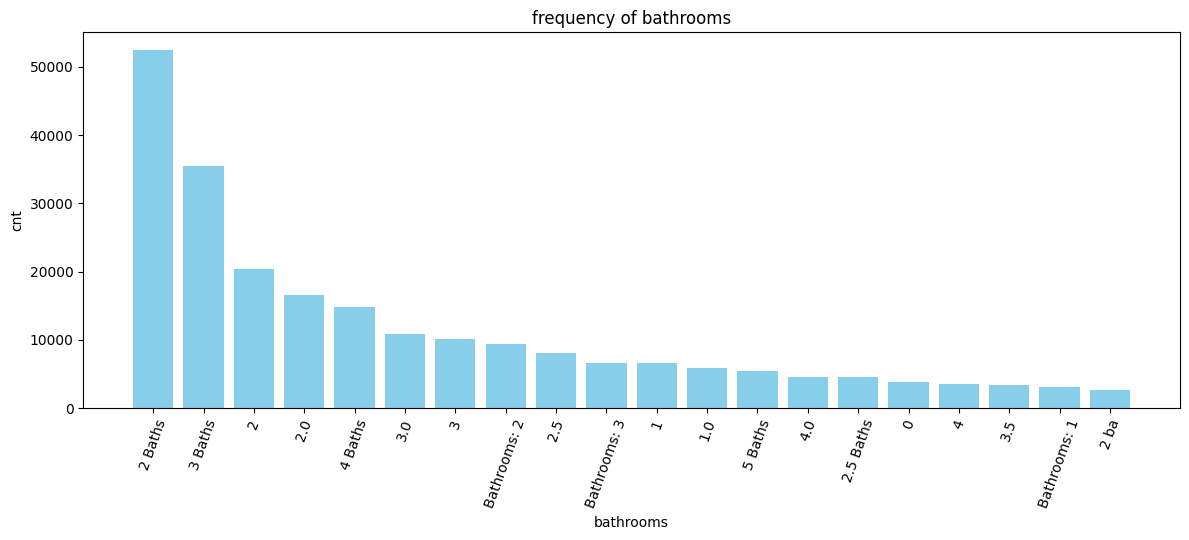

In [74]:
bath_cnt = original_data['baths'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(bath_cnt.index,
        bath_cnt.values,
        color='skyblue')

plt.xlabel('bathrooms',
           fontsize=10)

plt.ylabel('cnt')
plt.title('frequency of bathrooms')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [75]:
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).lower())

original_data['baths'] = original_data['baths'].apply(lambda x: str(x).replace('+', '').replace(',', '.').replace('baths', '').replace('bathrooms', '').replace('semimod', '1').replace('ba', '')\
                                                      .replace('sq.ft.', '1').replace(':', '').replace('—', '0').replace('--', '').replace('~', '').replace('sq.', '').replace('ft.', ''))

original_data['baths'] = original_data['baths'].apply(lambda x: x.split('/')[0])
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).split('-')[0])
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).replace('nan', ''))
original_data['baths'] = original_data['baths'].apply(lambda x: str(x).replace(' ', ''))
original_data['baths'] = original_data['baths'].apply(lambda x: '0' if x == '' else x)

In [76]:
original_data['baths'] = original_data['baths'].astype('float16')

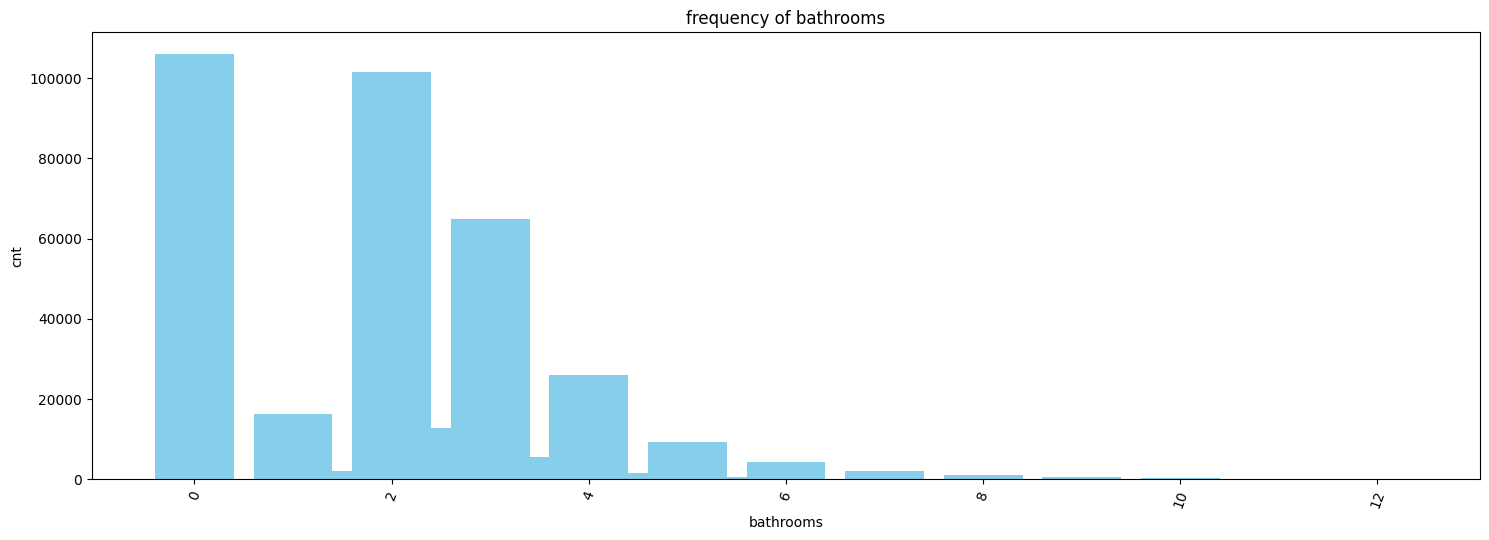

In [77]:
bath_cnt = original_data['baths'].value_counts().nlargest(20)

plt.figure(figsize=(15, 5.5))
plt.bar(bath_cnt.index,
        bath_cnt.values,
        color='skyblue')

plt.xlabel('bathrooms',
           fontsize=10)

plt.ylabel('cnt')
plt.title('frequency of bathrooms')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [78]:
original_data['baths'].describe()

c:\phython\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\phython\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\phython\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan


count    356574.0
mean          NaN
std           0.0
min           0.0
25%           0.0
50%           2.0
75%           3.0
max         750.0
Name: baths, dtype: float64

Вполне возможно наличие половинной ванной, четверть-ванной, трехчетвертной ванной и полной ванной комнаты

In [79]:
def group_the_baths(table: pd.DataFrame):

  '''
    > group the bathrooms into four known categories: whole, one_quarter, half, and three_quarter equivalent

    Parameters:
        table (DataFrame)

    Output:
        column (float, Series): returns the consolidated values for the bathroom feature
    '''

  one_quarter, half, three_quarters = 0.25, 0.5, 0.75
  whole_value, floored_value = table['baths'], math.floor(table['baths'])

  if whole_value < (floored_value + one_quarter):
    result = floored_value

  elif (whole_value >= (floored_value + one_quarter)) and (whole_value < (floored_value + half)):
    result = (floored_value + one_quarter)

  elif (whole_value >= (floored_value + half)) and (whole_value < (floored_value + three_quarters)):
    result = (floored_value + half)

  elif whole_value >= (floored_value + three_quarters):
    result = (floored_value + three_quarters)

  else:
    result = round(whole_value, 2)

  return result

original_data['bathroom'] = original_data.apply(group_the_baths,
                                                axis=1)

In [80]:
original_data = original_data.drop('baths',
                                   axis=1)

In [81]:
original_data['bathroom'].isnull().sum()[original_data['bathroom'].isnull().sum() > 0]

array([], dtype=int64)

Хотя не существует строгих правил относительно количества ванных комнат в доме, в среднем доме приходится не менее двух ванных комнат на каждые три спальни.

Да, это распространенная практика, особенно в домах высокого класса, когда ванных комнат больше, чем спален. Эта тенденция обусловлена такими факторами, как стремление к уединению, более просторные ванные комнаты и необходимость размещения гостей. В некоторых роскошных домах даже есть раздельные ванные комнаты "для него и для нее" или несколько ванных комнат для одной главной спальни.

In [82]:
def find_the_bathroom_ratio(table: pd.DataFrame):
    if table['bathroom'] == 0:
        return 0
    else:
        return round(table['number_of_bedrooms'] / table['bathroom'], 2)

original_data['baths_ratio'] = original_data.apply(find_the_bathroom_ratio,
                                                   axis=1)

Сократить нелогичное соотношение между количеством спален и количеством ванных комнат в объекте недвижимости

In [83]:
def bathroom_outliers(table: pd.DataFrame):

    if table['baths_ratio'] > 10:
        return True
    elif (table['baths_ratio'] < 0.4) & (table['baths_ratio'] != 0):
        return True
    else:
        return False

original_data['baths_ratio_condition'] = original_data.apply(bathroom_outliers,
                                                             axis=1)

In [84]:
original_data = original_data[original_data['baths_ratio_condition'] == False]

In [85]:
original_data = original_data.drop(['baths_ratio', 'baths_ratio_condition'],
                                   axis=1)

In [86]:
original_data['bathroom'].isnull().sum()[original_data['bathroom'].isnull().sum() > 0]

array([], dtype=int64)

#### **property type**

In [87]:
original_data['propertyType'].isnull().sum()[original_data['propertyType'].isnull().sum() > 0]

array([25478])

In [88]:
original_data['propertyType'] = original_data['propertyType'].apply(lambda x: str(x).lower())

In [89]:
original_data['propertyType'] = original_data['propertyType'].fillna('private_listing')

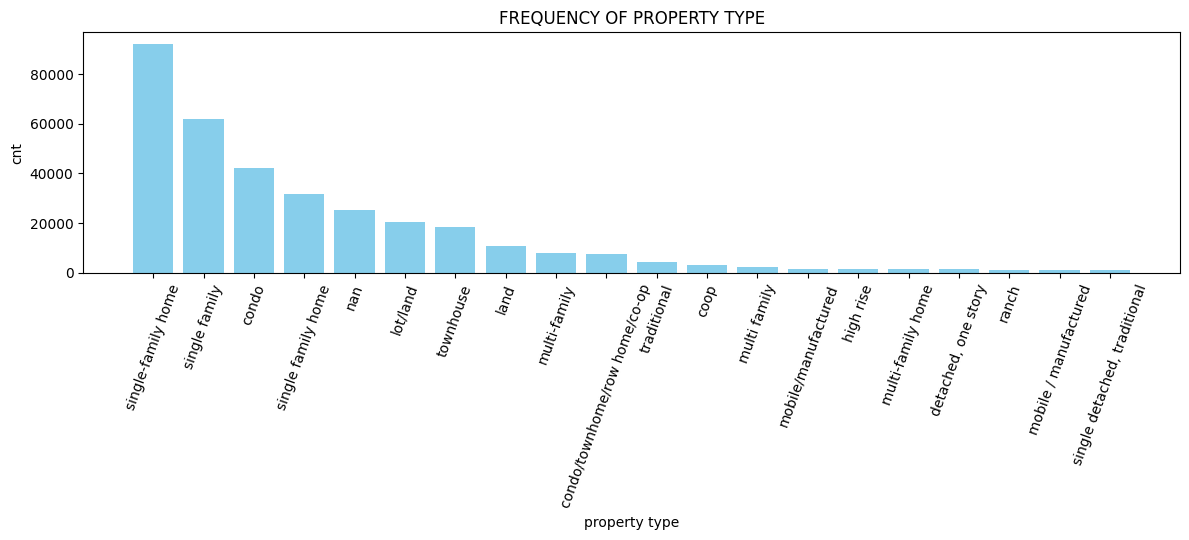

In [90]:
prprty_cnt = original_data['propertyType'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(prprty_cnt.index,
        prprty_cnt.values,
        color='skyblue')

plt.xlabel('property type',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTY TYPE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [91]:
original_data['propertyType'].value_counts()

propertyType
single-family home                                                  92159
single family                                                       62022
condo                                                               42388
single family home                                                  31727
nan                                                                 25478
                                                                    ...  
rustic                                                                  1
single detached, craftsman, early american                              1
residential (1+ acre)                                                   1
condo/townhome, hi-rise, contemporary/modern, mid-century modern        1
transitional, williamsburg                                              1
Name: count, Length: 1036, dtype: int64

In [92]:
original_data = original_data.reset_index()

indices = original_data[original_data['propertyType'] == ''].index.to_list()
original_data.loc[indices, 'propertyType'] = 'private_listing'

In [93]:
original_data[original_data['propertyType'] == '']

c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,index,propertyType,street,homeFacts,city,schools,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,multiple_listings,number_of_bedrooms,bathroom


- При исследовании элементов в propertyType я обнаружил, что сложно разделить определенные элементы и сгруппировать их согласно руководству тестового задания, поскольку многие типы недвижимости фактически пересекаются

- Поэтому я провел дополнительное исследование и выяснил, что определенные типы недвижимости могут быть частью специфических групп, и решил создать два новых признака: группа недвижимости и тип недвижимости на основе этого руководства: [this guideline](https://www.basicknowledge101.com/pdf/housing/house%20types%20List.pdf)

In [94]:
def group_and_sort_the_property_type(table: pd.DataFrame):
    
    '''
        > identify elements in propertyType and sort them into relevant property groups and property types
    '''
    
    if any(element in str(table['propertyType']) for element in ['single detached', 'single family', 'single-family', 'singlefamily']):
        result = 'detached single-unit housing, single family'

    elif any(element in str(table['propertyType']) for element in ['georgian', 'german', 'new england', 'spanish', 'french']):
        result = 'detached single-unit housing, american colonial'

    elif any(element in str(table['propertyType']) for element in ['foursquare']):
        result = 'detached single-unit housing, american foursquare'

    elif any(element in str(table['propertyType']) for element in ['barndominium']):
        result = 'detached single-unit housing, barndominium'

    elif any(element in str(table['propertyType']) for element in ['bungalow']):
        result = 'detached single-unit housing, bungalow'

    elif any(element in str(table['propertyType']) for element in ['craftsman']):
        result = 'detached single-unit housing, american craftsman'

    elif any(element in str(table['propertyType']) for element in ['cape cod']):
        result = 'detached single-unit housing, cape cod'

    elif any(element in str(table['propertyType']) for element in ['chalet']):
        result = 'detached single-unit housing, chalet'

    elif any(element in str(table['propertyType']) for element in ['cottage']):
        result = 'detached single-unit housing, cottage'

    elif any(element in str(table['propertyType']) for element in ['farmhouse', 'farm house']):
        result = 'detached single-unit housing, farmhouse'

    elif any(element in str(table['propertyType']) for element in ['federal']):
        result = 'detached single-unit housing, federal'

    elif any(element in str(table['propertyType']) for element in ['gambrel']):
        result = 'detached single-unit housing, gambrel'

    elif any(element in str(table['propertyType']) for element in ['hall']):
        result = 'detached single-unit housing, hall'

    elif any(element in str(table['propertyType']) for element in ['link detached']):
        result = 'detached single-unit housing, linked'

    elif any(element in str(table['propertyType']) for element in ['log', 'rustic']):
        result = 'detached single-unit housing, log'

    elif any(element in str(table['propertyType']) for element in ['manor']):
        result = 'detached single-unit housing, manor'

    elif any(element in str(table['propertyType']) for element in ['mansion']):
        result = 'detached single-unit housing, mansion'

    elif any(element in str(table['propertyType']) for element in ['manufactured', 'warehouse', 'garage', 'industrial']):
        result = 'detached single-unit housing, manufactured'

    elif any(element in str(table['propertyType']) for element in ['patio']):
        result = 'detached single-unit housing, patio'

    elif any(element in str(table['propertyType']) for element in ['prefab']):
        result = 'detached single-unit housing, prefabricated'

    elif any(element in str(table['propertyType']) for element in ['ranch']):
        result = 'detached single-unit housing, ranch'

    elif any(element in str(table['propertyType']) for element in ['saltbox']):
        result = 'detached single-unit housing, saltbox'

    elif any(element in str(table['propertyType']) for element in ['split']):
        result = 'detached single-unit housing, split-level'

    elif any(element in str(table['propertyType']) for element in ['stilt']):
        result = 'detached single-unit housing, stilt'

    elif any(element in str(table['propertyType']) for element in ['tudor']):
        result = 'detached single-unit housing, tudor'

    elif any(element in str(table['propertyType']) for element in ['tuscan']):
        result = 'detached single-unit housing, tuscan'

    elif any(element in str(table['propertyType']) for element in ['victorian']):
        result = 'detached single-unit housing, victorian'

    elif any(element in str(table['propertyType']) for element in ['villa']):
        result = 'detached single-unit housing, villa'

    elif any(element in str(table['propertyType']) for element in ['beach', 'moorage', 'key west', 'resort', 'coastal']):
        result = 'detached single-unit housing, beach'

    elif any(element in str(table['propertyType']) for element in ['frame']):
        result = 'detached single-unit housing, a-frame'



    elif any(element in str(table['propertyType']) for element in ['council']):
        result = 'semi-detached dwellings, council'

    elif any(element in str(table['propertyType']) for element in ['duplex']):
        result = 'semi-detached dwellings, duplex'

    elif any(element in str(table['propertyType']) for element in ['two family', 'two-family']):
        result = 'semi-detached dwellings, two-family'

    elif any(element in str(table['propertyType']) for element in ['two decker', 'two-decker']):
        result = 'semi-detached dwellings, two-decker'

    elif any(element in str(table['propertyType']) for element in ['semi-detached', 'semi detached']):
        result = 'semi-detached dwellings, semi-detached'



    elif any(element in str(table['propertyType']) for element in ['byre']):
        result = 'attached single-unit housing, byre-dwelling'

    elif any(element in str(table['propertyType']) for element in ['connected farm']):
        result = 'attached single-unit housing, connected farm'

    elif any(element in str(table['propertyType']) for element in ['housebarn']):
        result = 'attached single-unit housing, housebarn'

    elif any(element in str(table['propertyType']) for element in ['longhouse']):
        result = 'attached single-unit housing, longhouse'



    elif any(element in str(table['propertyType']) for element in ['apartment', 'flat', 'deck access', 'loft']):
        result = 'attached multi-unit housing, apartment'

    elif any(element in str(table['propertyType']) for element in ['brownstone']):
        result = 'attached multi-unit housing, brownstone'

    elif any(element in str(table['propertyType']) for element in ['cluster']):
        result = 'attached multi-unit housing, cluster'

    elif any(element in str(table['propertyType']) for element in ['condo']):
        result = 'attached multi-unit housing, condominium'

    elif any(element in str(table['propertyType']) for element in ['garden', 'lake']):
        result = 'attached multi-unit housing, garden'

    elif any(element in str(table['propertyType']) for element in ['coop', 'co-op']):
        result = 'attached multi-unit housing, housing cooperative'

    elif any(element in str(table['propertyType']) for element in ['penthouse', 'airlite', 'studio']):
        result = 'attached multi-unit housing, penthouse'

    elif any(element in str(table['propertyType']) for element in ['townhouse', 'townhome', 'custom']):
        result = 'attached multi-unit housing, townhouse'

    elif any(element in str(table['propertyType']) for element in ['multi-family', 'multi family']):
        result = 'attached multi-unit housing, multifamily'

    elif any(element in str(table['propertyType']) for element in ['high rise', 'high-rise', 'hi-rise', 'mid-rise', 'mid rise', 'mid-level']):
        result = 'attached multi-unit housing, tower block'



    elif any(element in str(table['propertyType']) for element in ['park', 'mobile', 'modular', 'caravan',
                                                                   'travel', 'coach', 'carriage', 'houseboat']):
        result = 'movable dwellings, mobile'

    elif any(element in str(table['propertyType']) for element in ['tent']):
        result = 'movable dwellings, tent'

    elif any(element in str(table['propertyType']) for element in ['yurt']):
        result = 'movable dwellings, yurt'

    else:
        result = 'unknown group, unknown type'

    return result

original_data['grouping_ptype'] = original_data.apply(group_and_sort_the_property_type,
                                                      axis=1)

In [95]:
original_data['grouping_ptype'] = original_data['grouping_ptype'].astype('string')

original_data['ptype_groups'] = original_data['grouping_ptype'].str.split(', ')
original_data['property_group'] = original_data['ptype_groups'].str[0]
original_data['property_type'] = original_data['ptype_groups'].str[-1]

In [96]:
original_data['property_group'].unique()

array(['detached single-unit housing', 'unknown group',
       'attached multi-unit housing', 'movable dwellings',
       'semi-detached dwellings'], dtype=object)

In [97]:
original_data['property_type'].unique()

array(['single family', 'unknown type', 'townhouse',
       'housing cooperative', 'multifamily', 'condominium', 'tower block',
       'manufactured', 'american craftsman', 'federal', 'apartment',
       'cape cod', 'mobile', 'bungalow', 'american colonial', 'ranch',
       'garden', 'a-frame', 'split-level', 'farmhouse', 'cluster',
       'tudor', 'cottage', 'hall', 'penthouse', 'beach', 'duplex',
       'victorian', 'tuscan', 'stilt', 'patio', 'saltbox', 'chalet',
       'gambrel', 'yurt', 'log', 'villa'], dtype=object)

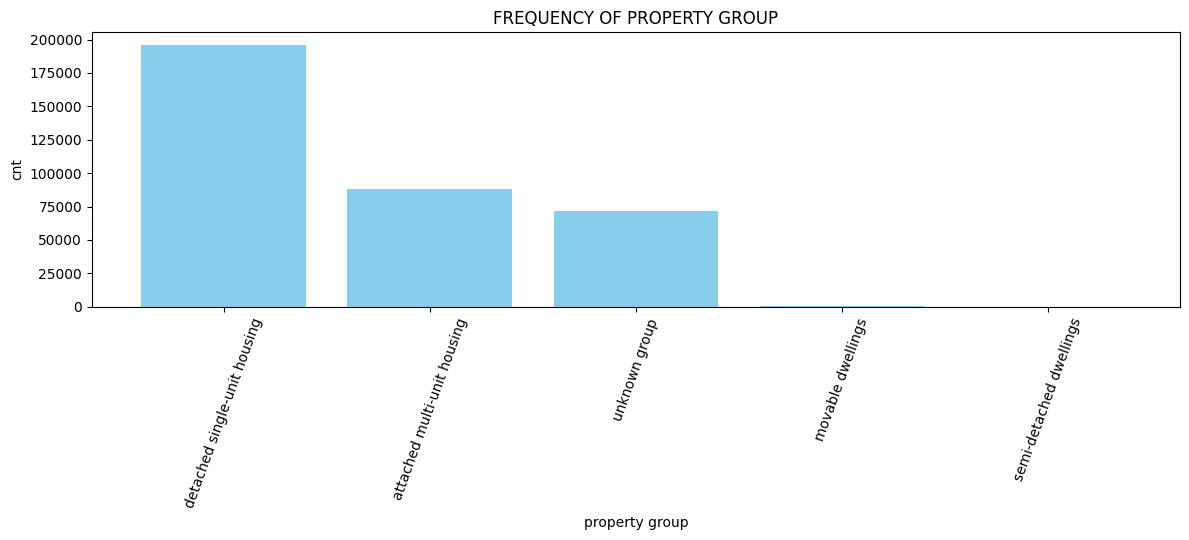

In [98]:
prprty_group_cnt = original_data['property_group'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(prprty_group_cnt.index,
        prprty_group_cnt.values,
        color='skyblue')

plt.xlabel('property group',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTY GROUP')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

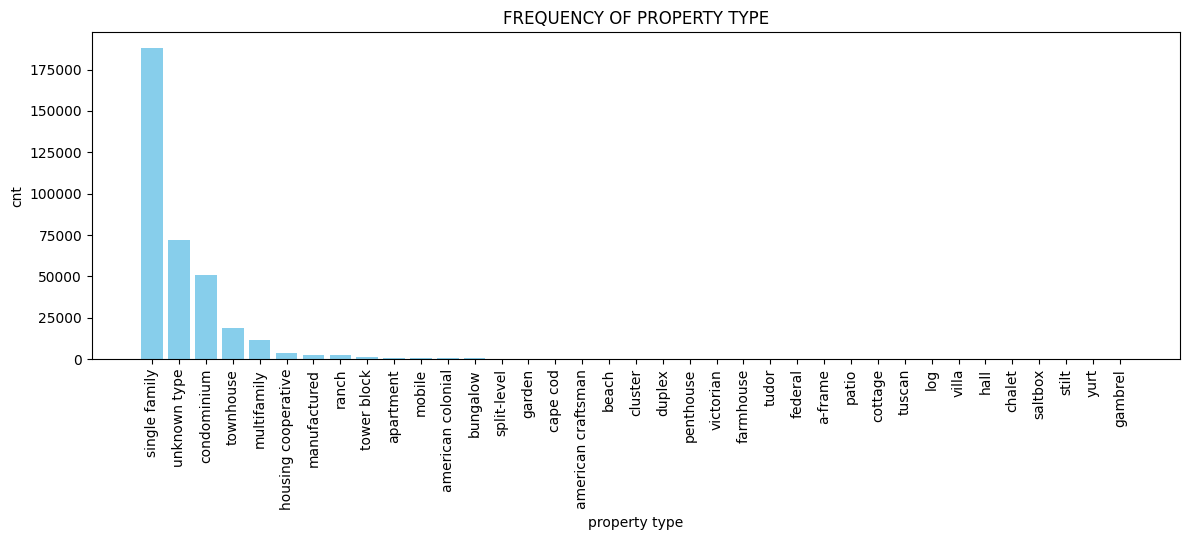

In [99]:
prprty_type_cnt = original_data['property_type'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(prprty_type_cnt.index,
        prprty_type_cnt.values,
        color='skyblue')

plt.xlabel('property type',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTY TYPE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Согласно тестовому заданию, *apartments* не подлежат продаже

In [100]:
original_data['selling'] = original_data['property_type'].apply(lambda x: 'not for sale' if x == 'apartment' else 'for sale')

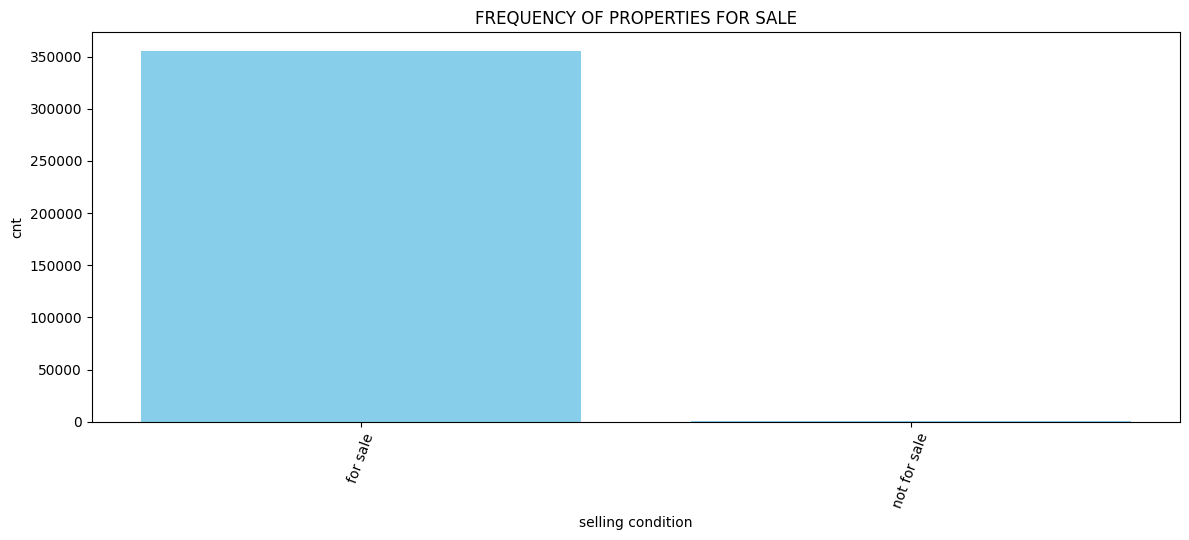

In [101]:
sell_cnt = original_data['selling'].value_counts()

plt.figure(figsize=(12, 5.5))
plt.bar(sell_cnt.index,
        sell_cnt.values,
        color='skyblue')

plt.xlabel('selling condition',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF PROPERTIES FOR SALE')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [102]:
original_data['property_group'].isnull().sum()[original_data['property_group'].isnull().sum() > 0]

array([], dtype=int64)

In [103]:
original_data['property_type'].isnull().sum()[original_data['property_type'].isnull().sum() > 0]

array([], dtype=int64)

In [104]:
original_data['selling'].isnull().sum()[original_data['selling'].isnull().sum() > 0]

array([], dtype=int64)

In [105]:
original_data['property_group'] = original_data['property_group'].astype('string')
original_data['property_type'] = original_data['property_type'].astype('string')
original_data['selling'] = original_data['selling'].astype('string')

In [106]:
original_data = original_data.drop(['index', 'propertyType', 'grouping_ptype', 'ptype_groups'],
                                   axis=1)

- Не нужно проводить дополнительную очистку данных, маловероятно, что в данных есть выбросы — все записи распределены по группам объектов и типам недвижимости.
- Но необходимо рассмотреть целесообразность сохранения записей с неизвестным типом.

#### **home facts --> годы реконструкции и перепланировки, отопление, охлаждение, парковка, размер участка, цена за кв.фут

In [107]:
original_data['homeFacts'].isnull().sum()[original_data['homeFacts'].isnull().sum() > 0]

array([], dtype=int64)

In [108]:
def unpack_home_facts(table: pd.DataFrame):
  
  '''
    > extract elements from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['homeFacts'])

  my_dict = ast.literal_eval(list_of_dicts)
  factValue, factLabel = [], []

  for v in range(len(my_dict['atAGlanceFacts'])):
    factValue.append(my_dict['atAGlanceFacts'][v]['factValue'])
    factLabel.append(my_dict['atAGlanceFacts'][v]['factLabel'])

  return factValue

original_data['hf_all'] = original_data.apply(unpack_home_facts,
                                              axis=1)

In [109]:
original_data['b_year'] = original_data['hf_all'].str[0] #built_year
original_data['r_year'] = original_data['hf_all'].str[1] #remodeled_year
original_data['heat'] = original_data['hf_all'].str[2] #heating
original_data['cool'] = original_data['hf_all'].str[3] #cooling
original_data['park'] = original_data['hf_all'].str[4] #parking
original_data['lot'] = original_data['hf_all'].str[5] #lotsize
original_data['price/sqft'] = original_data['hf_all'].str[6] #price_per_sqft

In [110]:
original_data = original_data.drop(['homeFacts', 'hf_all'],
                                   axis=1)

##### **built_year** (год постройки)

In [111]:
original_data['b_year'].isnull().sum()[original_data['b_year'].isnull().sum() > 0]

array([526])

In [112]:
original_data = original_data.reset_index()

In [113]:
indices = original_data[original_data['b_year'] == ''].index.to_list()
original_data.loc[indices, 'b_year'] = 0

In [114]:
original_data[original_data['b_year'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,property_group,property_type,selling,b_year,r_year,heat,cool,park,lot,price/sqft


In [115]:
original_data['b_year'] = original_data['b_year'].fillna(0)

In [116]:
def find_uninformative_built_year(table: pd.DataFrame):
    
    '''
        > look for error input if the string is not 4 characters long, it's not a reasonable construction year value
    '''
    
    if len(str(table['b_year'])) != 4:
        result = '0'
    elif str(table['b_year']) == 'No Data':
        result = '0'
    elif str(table['b_year']) == '':
        result = '0'
    else:
        result = str(table['b_year'])
    return result

original_data['built_year'] = original_data.apply(find_uninformative_built_year,
                                                  axis=1)

In [117]:
original_data['built_year'] = original_data['built_year'].astype('int16')

In [118]:
original_data['built_year'].isnull().sum()[original_data['built_year'].isnull().sum() > 0]

array([], dtype=int64)

In [119]:
original_data = original_data.drop('index',
                                   axis=1)

##### **remodeled year** (год ремонта)

In [120]:
original_data['r_year'].isnull().sum()[original_data['r_year'].isnull().sum() > 0]

array([23338])

In [121]:
original_data = original_data.reset_index()

In [122]:
indices = original_data[original_data['r_year'] == ''].index.to_list()
original_data.loc[indices, 'r_year'] = 0

In [123]:
original_data[original_data['r_year'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,property_type,selling,b_year,r_year,heat,cool,park,lot,price/sqft,built_year


In [124]:
original_data['r_year'] = original_data['r_year'].fillna(0)

In [125]:
def find_uninformative_remodeled_year(table: pd.DataFrame):
    
    '''
        > look for error input if the string is not 4 characters long, it's not a reasonable remodeling year value
    '''
    
    if len(str(table['r_year'])) != 4:
        result = '0'
    elif str(table['r_year']) == 'No Data':
        result = '0'
    elif str(table['r_year']) == '':
        result = '0'
    else:
        result = str(table['r_year'])
    return result

original_data['rem_year'] = original_data.apply(find_uninformative_remodeled_year,
                                                axis=1)

In [126]:
original_data['rem_year'] = original_data['rem_year'].astype('int16')

In [127]:
original_data['rem_year'].isnull().sum()[original_data['rem_year'].isnull().sum() > 0]

array([], dtype=int64)

In [128]:
original_data = original_data.drop('index',
                                   axis=1)

##### years swap (смена лет)

- напишите функцию для замены мест между годом постройки и годом ремонта, если год постройки > года ремонта, при условии, что год ремонта не пуст
- предполагается, что могла быть возможность некорректного ввода данных

In [129]:
def switch_built_year(table: pd.DataFrame):
    if (table['built_year'] > table['rem_year']) and (table['rem_year'] != 0):
        return table['rem_year']
    else:
        return table['built_year']

original_data['year_of_construction'] = original_data.apply(switch_built_year,
                                                            axis=1)


def switch_remodeled_year(table: pd.DataFrame):
    if (table['built_year'] > table['rem_year']) and (table['rem_year'] != 0):
        return table['built_year']
    else:
        return table['rem_year']

original_data['year_of_remodeling'] = original_data.apply(switch_remodeled_year,
                                                          axis=1)

In [130]:
original_data[(original_data['year_of_construction'] > original_data['year_of_remodeling']) & (original_data['year_of_remodeling'] != 0)]

,street,city,schools,sqft,zipcode,state,stories,target,listing_status,private_pool,...,r_year,heat,cool,park,lot,price/sqft,built_year,rem_year,year_of_construction,year_of_remodeling


In [131]:
original_data['year_of_construction'] = original_data['year_of_construction'].astype('int16')
original_data['year_of_remodeling'] = original_data['year_of_remodeling'].astype('int16')

Требуется дальнейшая очистка данных, так как годы строительства / ремонта, вероятно, содержат выбросы - и год постройки не может быть равен 0, поэтому данные необходимо унифицировать по типам недвижимости.

In [132]:
original_data = original_data.drop(['b_year', 'r_year', 'built_year', 'rem_year'],
                                   axis=1)

##### **heating** (отопление)

In [133]:
original_data['heat'].isnull().sum()[original_data['heat'].isnull().sum() > 0]

array([498])

In [134]:
original_data = original_data.reset_index()

indices = original_data[original_data['heat'] == ''].index.to_list()
original_data.loc[indices, 'heat'] = 'no heating'

In [135]:
original_data[original_data['heat'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,property_group,property_type,selling,heat,cool,park,lot,price/sqft,year_of_construction,year_of_remodeling


In [136]:
original_data['heat'] = original_data['heat'].fillna('no heating')

In [137]:
original_data['heat'] = original_data['heat'].apply(lambda x: str(x).lower())

In [138]:
original_data['heat'].unique()

array(['central a/c, heat pump', 'no heating', 'forced air', ...,
       'electric furnace, electric heat pump',
       'floor furnace, wall electric, wall gas',
       'baseboard, hot water, programmable thermostat, radiant floor'],
      shape=(1661,), dtype=object)

- Изучил, какие варианты отопления доступны, и соответствующим образом отсортировал элементы.
- Хотя функция не идеальна, она достаточно хороша, честно говоря: может быть пересечение между элементами, или некоторые элементы не будут включены, но для достижения совершенства пришлось бы перебирать каждый элемент в строке, чтобы подсчитать каждое вхождение, что было бы слишком затратно по времени на данном этапе тестирования.

In [139]:
def group_and_sort_heating_elements(table: pd.DataFrame):

  if any(element in str(table['heat']) for element in ['no heat', 'no data', 'none']):
    result = 'no heating, no heating'


  elif any(element in str(table['heat']) for element in ['air', 'forced', 'geothem', 'mini', 'pump', 'filt']):
    result = 'heating, heat pump'


  elif any(element in str(table['heat']) for element in ['baseboard']):
    result = 'heating, baseboard'


  elif any(element in str(table['heat']) for element in ['centr', 'oile', 'basem']):
    result = 'heating, boiler'


  elif any(element in str(table['heat']) for element in ['blow']):
    result = 'heating, blower'


  elif any(element in str(table['heat']) for element in ['closet', 'heater', 'water', 'hot', 'tank', 'steam']):
    result = 'heating, boiler'


  elif any(element in str(table['heat']) for element in ['floor', 'radia', 'roof']):
    result = 'heating, radiant'


  elif any(element in str(table['heat']) for element in ['fireplace', 'roof', 'fuel', 'furn', 'bsmt', 'stove']):
    result = 'heating, furnace'


  elif any(element in str(table['heat']) for element in ['hvac', 'inc', 'zone', 'source', 'system', 'thermo', 'thmstat', 'unit', 'utility', 'yes']):
    result = 'heating, unknown type'

  elif any(char.isdigit() for char in str(table['heat'])):
    result = 'heating, unknown type'


  else:
    result = 'no heating, no heating'


  return result

original_data['grouping_heat_elements'] = original_data.apply(group_and_sort_heating_elements,
                                                              axis=1)

- предположил, что источник отопления может быть полезным признаком

In [140]:
def find_the_heat_source(table: pd.DataFrame):
    if any(element in str(table['heat']) for element in ['electr']):
        result = 'electric'

    elif any(element in str(table['heat']) for element in ['gas', 'butane', 'propane']):
        result = 'gas'

    elif (any(element in str(table['heat']) for element in ['oil', 'kerosene', 'diesel', 'petrol', 'gasoline'])) and ('boiler' not in str(table['heat'])):
        result = 'oil'

    elif any(element in str(table['heat']) for element in ['wood', 'pellet']):
        result = 'wood'

    elif any(element in str(table['heat']) for element in ['solar', 'coal']):
        result = 'other'

    else:
        result = 'unknown energy source'

    return result

original_data['heat_source'] = original_data.apply(find_the_heat_source,
                                                   axis=1)

In [141]:
original_data['grouping_heat_elements'].value_counts()

grouping_heat_elements
no heating, no heating    164109
heating, heat pump        161719
heating, boiler            20716
heating, baseboard          4273
heating, unknown type       3579
heating, radiant            1780
heating, furnace             284
Name: count, dtype: int64

In [142]:
original_data['heat_source'].value_counts()

heat_source
unknown energy source    313813
electric                  26141
gas                       16033
oil                         283
wood                        149
other                        41
Name: count, dtype: int64

In [143]:
original_data['grouping_heat_elements'] = original_data['grouping_heat_elements'].astype('string')

original_data['heat_groups'] = original_data['grouping_heat_elements'].str.split(', ')
original_data['avail_heat'] = original_data['heat_groups'].str[0]
original_data['heat_type'] = original_data['heat_groups'].str[-1]

Проверять наличие любого источника энергии

In [144]:
def correct_heating_system(table: pd.DataFrame):
  if str(table['heat_source']) != 'unknown energy source':
    return 'heating'
  else:
    return str(table['avail_heat'])

original_data['availability_of_heating'] = original_data.apply(correct_heating_system,
                                                               axis=1)

In [145]:
def correct_heating_type(table: pd.DataFrame):
  if str(table['availability_of_heating']) != 'no heating':
    if str(table['heat_type']) == 'no heating':
      return 'unknown type'
    else:
      return str(table['heat_type'])
  else:
    return str(table['heat_type'])

original_data['type_of_heating_system'] = original_data.apply(correct_heating_type,
                                                              axis=1)

In [146]:
def correct_heating_source(table: pd.DataFrame):
  if str(table['availability_of_heating']) == 'no heating':
    return 'no source'
  else:
    return str(table['heat_source'])

original_data['source_of_heat'] = original_data.apply(correct_heating_source,
                                                      axis=1)

Очистка данных: скорректировать элементы отопления, если в объекте присутствует камин

In [147]:
def legitimate_heating_system(table: pd.DataFrame):
  if table['availability_of_fireplace'] == 'yes':
    return 'heating'
  else:
    return table['availability_of_heating']

original_data['availability_of_heating2'] = original_data.apply(legitimate_heating_system,
                                                                axis=1)

In [148]:
def legitimate_heating_type(table: pd.DataFrame):
  if (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'heating') and (table['type_of_heating_system'] == 'unknown type'):
    return 'furnace'
  elif (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'heating') and (table['type_of_heating_system'] != 'unknown type'):
    return table['type_of_heating_system']
  elif (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'no heating'):
    return 'furnace'
  else:
    return table['type_of_heating_system']

original_data['type_of_heating_system2'] = original_data.apply(legitimate_heating_type,
                                                               axis=1)

In [149]:
def legitimate_heating_source(table: pd.DataFrame):
  if (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'no heating'):
    return table['type_of_fireplace']

  elif (table['availability_of_fireplace'] == 'yes') and (table['availability_of_heating'] == 'heating') and (table['type_of_heating_system'] == 'unknown type') and (table['source_of_heat'] == 'unknown energy source'):
    return table['type_of_fireplace']

  else:
    return table['source_of_heat']

original_data['source_of_heat2'] = original_data.apply(legitimate_heating_source,
                                                       axis=1)

In [150]:
original_data['source_of_heat2'] = original_data['source_of_heat2'].apply(lambda x: 'unknown energy source' if x =='unknown type' else x)
original_data['source_of_heat2'] = original_data['source_of_heat2'].apply(lambda x: 'wood' if x =='woodburning' else x)

In [151]:
original_data = original_data.drop(['index', 'heat', 'grouping_heat_elements', 'heat_source',
                                    'heat_groups', 'avail_heat', 'heat_type',
                                    'availability_of_heating', 'type_of_heating_system', 'source_of_heat'],
                                   axis=1)

In [152]:
original_data = original_data.rename(columns={
    'availability_of_heating2': 'availability_of_heating',
    'type_of_heating_system2': 'type_of_heating_system',
    'source_of_heat2': 'source_of_heat',

})

In [153]:
original_data['availability_of_heating'] = original_data['availability_of_heating'].astype('string')
original_data['type_of_heating_system'] = original_data['type_of_heating_system'].astype('string')
original_data['source_of_heat'] = original_data['source_of_heat'].astype('string')

In [154]:
print(original_data['availability_of_heating'].isnull().sum()[original_data['availability_of_heating'].isnull().sum() > 0])
print(original_data['type_of_heating_system'].isnull().sum()[original_data['type_of_heating_system'].isnull().sum() > 0])
print(original_data['source_of_heat'].isnull().sum()[original_data['source_of_heat'].isnull().sum() > 0])

[]
[]
[]


Нет необходимости в дальнейшей очистке данных, маловероятно наличие выбросов — либо у объекта недвижимости есть элементы отопления, либо их нет.

##### **cooling** (охлаждение)

In [155]:
original_data['cool'].isnull().sum()[original_data['cool'].isnull().sum() > 0]

array([498])

In [156]:
original_data = original_data.reset_index()

indices = original_data[original_data['cool'] == ''].index.to_list()
original_data.loc[indices, 'cool'] = 'no cooling'

In [157]:
original_data[original_data['cool'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,selling,cool,park,lot,price/sqft,year_of_construction,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat


In [158]:
original_data['cool'] = original_data['cool'].fillna('no cooling')

In [159]:
original_data['cool'] = original_data['cool'].apply(lambda x: str(x).lower())

In [160]:
original_data['cool'].unique()

array(['no cooling', 'central', 'central air', ...,
       'common area maintenance, common area taxes and insurance, common heating/cooling, exterior building maintenance',
       'no heat, space heater, window unit',
       'central a/c (gas), central heat (gas), heat pump'],
      shape=(1232,), dtype=object)

- Изучил, какие варианты охлаждения доступны, и соответствующим образом отсортировал элементы.
- Хотя функция не идеальна, она достаточно хороша, честно говоря: может быть пересечение между элементами, или некоторые элементы не будут включены, но для достижения совершенства пришлось бы перебирать каждый элемент в строке, чтобы подсчитать каждое вхождение, что было бы слишком затратно по времени на данном этапе тестирования.

In [161]:
def group_and_sort_cooling_elements(table: pd.DataFrame):

  if any(element in str(table['cool']) for element in ['no a/c', 'no air', 'no cooling', 'no data', 'none', 'no cool']):
    result = 'no cooling, no cooling'


  elif any(element in str(table['cool']) for element in ['a/c', 'centr', 'cond', 'ceil', 'fan']):
    result = 'cooling, air conditioning'

  elif any(char.isdigit() for char in str(table['cool'])):
    result = 'cooling, air conditioning'


  elif any(element in str(table['cool']) for element in ['evap', 'humid', 'vent']):
    result = 'cooling, air circulation'


  elif any(element in str(table['cool']) for element in ['cool', 'zone', 'source', 'system', 'thermo', 'thmstat', 'unit', 'utility', 'yes', 'hvac', 'incl', 'mini', 'solar', 'window']):
    result = 'cooling, unknown type'


  else:
    result = 'no cooling, no cooling'


  return result

original_data['grouping_cool_elements'] = original_data.apply(group_and_sort_cooling_elements,
                                                              axis=1)

- предположил, что источник охлаждения может быть полезным признаком

In [162]:
def find_the_cool_source(table: pd.DataFrame):
    if any(element in str(table['cool']) for element in ['electr']):
        result = 'electric'

    elif any(element in str(table['cool']) for element in ['gas', 'butane', 'propane']):
        result = 'gas'

    elif any(element in str(table['cool']) for element in ['oil', 'kerosene', 'diesel', 'petrol', 'gasoline']):
        result = 'oil'

    elif any(element in str(table['cool']) for element in ['wood', 'pellet']):
        result = 'wood'

    elif any(element in str(table['cool']) for element in ['solar', 'coal']):
        result = 'other'

    else:
        result = 'unknown energy source'

    return result

original_data['cool_source'] = original_data.apply(find_the_cool_source,
                                                   axis=1)

In [163]:
original_data['grouping_cool_elements'].value_counts()

grouping_cool_elements
cooling, air conditioning    199310
no cooling, no cooling       142949
cooling, unknown type         13031
cooling, air circulation       1170
Name: count, dtype: int64

In [164]:
original_data['cool_source'].value_counts()

cool_source
unknown energy source    336974
electric                  12743
gas                        6040
other                       676
oil                          15
wood                         12
Name: count, dtype: int64

In [165]:
original_data['grouping_cool_elements'] = original_data['grouping_cool_elements'].astype('string')

original_data['cool_groups'] = original_data['grouping_cool_elements'].str.split(', ')
original_data['avail_cool'] = original_data['cool_groups'].str[0]
original_data['cool_type'] = original_data['cool_groups'].str[-1]

In [166]:
def correct_cooling_system(table: pd.DataFrame):
  if str(table['cool_source']) != 'unknown energy source':
    return 'cooling'
  else:
    return str(table['avail_cool'])

original_data['availability_of_cooling'] = original_data.apply(correct_cooling_system,
                                                               axis=1)

In [167]:
def correct_cooling_type(table: pd.DataFrame):
  if str(table['availability_of_cooling']) != 'no cooling':
    if str(table['cool_type']) == 'no cooling':
      return 'unknown type'
    else:
      return str(table['cool_type'])
  else:
    return str(table['cool_type'])

original_data['type_of_cooling_system'] = original_data.apply(correct_cooling_type,
                                                              axis=1)

In [168]:
def correct_cooling_source(table: pd.DataFrame):
  if str(table['availability_of_cooling']) == 'no cooling':
    return 'no source'
  else:
    return str(table['cool_source'])

original_data['source_of_cool'] = original_data.apply(correct_cooling_source,
                                                      axis=1)

In [169]:
original_data['availability_of_cooling'] = original_data['availability_of_cooling'].astype('string')
original_data['type_of_cooling_system'] = original_data['type_of_cooling_system'].astype('string')
original_data['source_of_cool'] = original_data['source_of_cool'].astype('string')

In [170]:
original_data = original_data.drop(['index', 'cool', 'grouping_cool_elements', 'cool_source', 'cool_groups', 'avail_cool', 'cool_type'],
                                   axis=1)

Нет необходимости в дальнейшей очистке данных, маловероятно наличие выбросов — либо у объекта недвижимости есть элементы охлаждения, либо их нет.

##### **parking** (парковка)

In [171]:
original_data['park'].isnull().sum()[original_data['park'].isnull().sum() > 0]

array([498])

In [172]:
original_data = original_data.reset_index()

indices = original_data[original_data['park'] == ''].index.to_list()
original_data.loc[indices, 'park'] = 'no parking'

In [173]:
original_data[original_data['park'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,lot,price/sqft,year_of_construction,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat,availability_of_cooling,type_of_cooling_system,source_of_cool


In [174]:
original_data['park'] = original_data['park'].fillna('no parking')

In [175]:
original_data['park'] = original_data['park'].apply(lambda x: str(x).lower())

In [176]:
original_data['park'].unique()

array(['no parking', 'attached garage', 'detached garage', ...,
       'basement, detached',
       'paved driveway, off street, detached garage',
       'deed restrictions, fitness, gated community, golf carts ok, no truck/rv/motorcycle parking, pool, special community restrictions'],
      shape=(3317,), dtype=object)

- Изучил, какие варианты парковки доступны, и соответствующим образом отсортировал элементы.
- Хотя функция не идеальна, она достаточно хороша, честно говоря: может быть пересечение между элементами, или некоторые элементы не будут включены, но для достижения совершенства пришлось бы перебирать каждый элемент в строке, чтобы подсчитать каждое вхождение, что было бы слишком затратно по времени на данном этапе тестирования.
- Решил дополнительно разделить парковку на уличную и внеуличную.

In [177]:
def group_and_sort_parking_elements(table: pd.DataFrame):

  if (any(element in str(table['park']) for element in ['none', 'no data', 'no garage', 'no parking'])) or (str(table['park']) == '0') or (str(table['park']) == 'no'):
    result = 'no parking, no parking'


  elif any(element in str(table['park']) for element in ['curb', 'off site', 'on street', 'on-street',
                                                         'onstr', 'outside', 'street parking', 'unassigned']):
    result = 'on-street parking, on-street'


  elif any(element in str(table['park']) for element in ['addl', 'additional']):
    result = 'off-street parking, additional'


  elif any(element in str(table['park']) for element in ['carport']):
    result = 'off-street parking, carport'


  elif any(element in str(table['park']) for element in ["attached", "attchd", "atchf", "atchr", "attch'd"]):
    result = 'off-street parking, attached'


  elif any(element in str(table['park']) for element in ['detached', 'dtach', 'garage']):
    result = 'off-street parking, detached'


  elif any(element in str(table['park']) for element in ['visitor', 'guest']):
    result = 'off-street parking, guest'


  elif any(element in str(table['park']) for element in ['no covered', 'uncovered', 'open', 'outdoor', 'paved', 'aspht', 'asphalt',
                                                         'stone', 'drive', 'drvwy', 'gravel', 'gravl', 'cirdw', 'concr', 'parking lot']):
    result = 'off-street parking, outdoor'


  elif any(element in str(table['park']) for element in ['indoor', 'covered', 'assigned', 'reserved', 'secure parking']):
    result = 'off-street parking, indoor'


  elif any(element in str(table['park']) for element in ['deck']):
    result = 'off-street parking, parking deck'


  elif any(element in str(table['park']) for element in ['pad', 'pkpad']):
    result = 'off-street parking, parking pad'


  elif any(element in str(table['park']) for element in ['no rv', 'no truck', 'private', 'leasing',
                                                         'limited', 'fee', 'pvt', 'parking restrictions']):
    result = 'off-street parking, parking restriction'


  elif any(element in str(table['park']) for element in ['under', 'underground']):
    result = 'off-street parking, underground'


  elif any(element in str(table['park']) for element in ['yes', 'possible', 'unpavd', 'prkng', 'space', 'off-street',
                                                         'off street', 'car', 'parking', 'park', 'on-site', 'on site']):
    result = 'off-street parking, unknown type'


  elif any(char.isdigit() for char in str(table['park'])):
    result = 'off-street parking, unknown type'


  else:
    result = 'no parking, no parking'


  return result

original_data['grouping_park_elements'] = original_data.apply(group_and_sort_parking_elements,
                                                              axis=1)

In [178]:
original_data['grouping_park_elements'] = original_data['grouping_park_elements'].astype('string')

original_data['park_groups'] = original_data['grouping_park_elements'].str.split(', ')
original_data['parking_availability'] = original_data['park_groups'].str[0]
original_data['parking_type'] = original_data['park_groups'].str[-1]

In [179]:
original_data['parking_availability'].value_counts()

parking_availability
off-street parking    179520
no parking            172444
on-street parking       4496
Name: count, dtype: int64

In [180]:
original_data['parking_type'].value_counts()

parking_type
no parking             172444
attached                77769
unknown type            67329
detached                17306
carport                 13532
on-street                4496
outdoor                  2776
indoor                    413
guest                     199
parking restriction        78
underground                66
parking pad                41
additional                  8
parking deck                3
Name: count, dtype: int64

In [181]:
original_data['parking_availability'] = original_data['parking_availability'].astype('string')
original_data['parking_type'] = original_data['parking_type'].astype('string')

In [182]:
original_data = original_data.drop(['index', 'park', 'grouping_park_elements', 'park_groups'],
                                   axis=1)

Нет необходимости в дальнейшей очистке данных, маловероятно наличие выбросов — либо у объекта недвижимости есть парковка, либо её нет.

##### **lotsize** (размер участка)

In [183]:
original_data['lot'].isnull().sum()[original_data['lot'].isnull().sum() > 0]

array([25233])

In [184]:
original_data['lot'] = original_data['lot'].fillna('0')

In [185]:
original_data['lot'].value_counts()

lot
                  32828
0                 25233
—                 19242
No Data            5269
-- sqft lot        3733
                  ...  
2113531               1
20394                 1
9,286 sqft lot        1
10,599 Sq. Ft.        1
6,718 Sq. Ft.         1
Name: count, Length: 36310, dtype: int64

In [186]:
original_data['lot'].unique()

array(['0', '5828 sqft', '8,626 sqft', ..., '8,019 sqft lot',
       '101.00 acres', '7,084 sqft lot'], shape=(36310,), dtype=object)

In [187]:
original_data['lot'] = original_data['lot'].apply(lambda x: str(x).lower())
original_data['lot'] = original_data['lot'].apply(lambda x: str(x).replace(',', ''))

In [188]:
original_data = original_data.reset_index()

In [189]:
indices = original_data[original_data['lot'] == ''].index.to_list()
original_data.loc[indices, 'lot'] = 0

In [190]:
original_data[original_data['lot'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,year_of_construction,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type


In [191]:
original_data['lot'].isnull().sum()[original_data['lot'].isnull().sum() > 0]

array([], dtype=int64)

- Решил преобразовать размер участка в квадратные футы вместо акров, так как это будет более полезно при будущем сравнении с площадью в квадратных футах, если потребуется, и лучше иметь согласованные единицы измерения по всем параметрам.

In [192]:
def convert_lotsize(table: pd.DataFrame):

    make_a_string = str(table['lot'])
    acr_to_sqft = 43560

    #for letters only
    make_a_string_no_spaces = make_a_string.replace(' ', '')
    make_a_string_no_special = re.sub(r'[^a-zA-Z0-9]', '', make_a_string_no_spaces)

    #for numbers only
    make_a_number = make_a_string.replace('.', '')

    if any(element in make_a_string for element in ['sq']):
        result = "".join(filter(str.isdigit, make_a_string))
        result = result

    elif any(element in make_a_string for element in ['acr']):
        try:
            firstly = re.findall('\d+\.\d+', make_a_string)
            secondly = firstly[0]
            result = float(secondly) * acr_to_sqft
        except:
            thirdly = "".join(filter(str.isdigit, make_a_string))
            result = float(thirdly) * acr_to_sqft

    elif make_a_number.isnumeric():
        if float(make_a_string) < 1:
            result = float(make_a_string) * acr_to_sqft
        else:
            result = float(make_a_string)

    elif make_a_string_no_special.isalpha():
        result = 0

    else:
        result = 0

    return result

original_data['lotsize'] = original_data.apply(convert_lotsize,
                                               axis=1)

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_9868\4276001143.py:19: SyntaxWarning: invalid escape sequence '\d'
  firstly = re.findall('\d+\.\d+', make_a_string)


In [193]:
original_data['lotsize'].isnull().sum()[original_data['lotsize'].isnull().sum() > 0]

array([], dtype=int64)

In [194]:
original_data = original_data.drop(['lot', 'index'],
                                   axis=1)

In [195]:
original_data = original_data.reset_index()

indices = original_data[original_data['lotsize'] == ''].index.to_list()
original_data.loc[indices, 'lotsize'] = 0

In [196]:
original_data['lotsize'] = original_data['lotsize'].astype('float')

In [197]:
original_data['lotsize'].isnull().sum()[original_data['lotsize'].isnull().sum() > 0]

array([], dtype=int64)

Требуется дальнейшая очистка данных, вероятно наличие выбросов — и размер участка не может быть равен 0, поэтому данные необходимо унифицировать либо по условию, что площадь участка должна превышать площадь застройки в 2,5–3,5 раза, либо усреднить по типам недвижимости.

In [198]:
original_data = original_data.drop(['index'],
                                   axis=1)

##### **price/sqft** (цена за кв.фут)

In [199]:
original_data['price/sqft'].isnull().sum()[original_data['price/sqft'].isnull().sum() > 0]

array([53229])

In [200]:
original_data['price/sqft'] = original_data['price/sqft'].fillna('0')
original_data['price/sqft'] = original_data['price/sqft'].apply(lambda x: str(x).lower())

In [201]:
original_data = original_data.reset_index()

In [202]:
indices = original_data[original_data['price/sqft'] == ''].index.to_list()
original_data.loc[indices, 'price/sqft'] = 0

In [203]:
original_data[original_data['price/sqft'] == '']

,index,street,city,schools,sqft,zipcode,state,stories,target,listing_status,...,year_of_remodeling,availability_of_heating,type_of_heating_system,source_of_heat,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize


In [204]:
original_data['price/sqft'].unique()

array(['$144', '$159/sqft', '$965/sqft', ..., '$1141 / sq. ft.', '$2,592',
       '$2,032'], shape=(6383,), dtype=object)

In [205]:
original_data['price/sqft'] = original_data['price/sqft'].apply(lambda x: str(x).replace('$', '').replace(' ', '').replace('.', '').replace(',', '')
    .replace('/sqft', ''))

In [206]:
original_data['price_per_sq_feet'] = original_data['price/sqft'].apply(lambda x: '0' if str(x).isalpha() else x)
# original_data['price_per_sq_feet'] = pd.to_numeric(original_data['price_per_sq_feet'],
#                                                    errors='coerce')

original_data['price_per_sq_feet'] = original_data['price_per_sq_feet'].astype('float64')

In [207]:
original_data['price_per_sq_feet'] = original_data['price_per_sq_feet'].fillna(0)

In [208]:
original_data['price_per_sq_feet'].isnull().sum()[original_data['price_per_sq_feet'].isnull().sum() > 0]

array([], dtype=int64)

In [209]:
original_data = original_data.drop(['index', 'price/sqft'],
                                   axis=1)

#### **schools --> средний рейтинг, количество школ, максимальное расстояние, возрастные категории школ

In [210]:
original_data['schools'].isnull().sum()[original_data['schools'].isnull().sum() > 0]

array([], dtype=int64)

In [211]:
def unpack_school_rating(table: pd.DataFrame):
  
  '''
    > extract school rating from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['schools'])

  my_dict = ast.literal_eval(list_of_dicts)
  factValue = []

  for v in range(len(my_dict)):
    factValue.append(my_dict[v]['rating'])

  return factValue

original_data['s_rating'] = original_data.apply(unpack_school_rating,
                                                axis=1)

In [212]:
def unpack_school_distance(table: pd.DataFrame):
  
  '''
    > extract school distance from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['schools'])

  my_dict = ast.literal_eval(list_of_dicts)
  factDistance = []

  for v in range(len(my_dict)):
    factDistance.append(my_dict[v]['data']['Distance'])

  return factDistance

original_data['s_distance'] = original_data.apply(unpack_school_distance,
                                                  axis=1)

In [213]:
def unpack_school_grades(table: pd.DataFrame):
  
  '''
    > extract school grades from a string that acts as a dict
  '''
  
  list_of_dicts = str(table['schools'])

  my_dict = ast.literal_eval(list_of_dicts)
  factGrades = []

  for v in range(len(my_dict)):
    factGrades.append(my_dict[v]['data']['Grades'])

  return factGrades

original_data['s_grades'] = original_data.apply(unpack_school_grades,
                                                axis=1)

In [214]:
original_data = original_data.drop('schools',
                                   axis=1)

##### **school rating to average rating**

In [215]:
original_data['s_rating'].isnull().sum()[original_data['s_rating'].isnull().sum() > 0]

array([], dtype=int64)

In [216]:
original_data['s_rating'] = original_data['s_rating'].apply(lambda x: str(x).lower())
original_data['s_rating'] = original_data['s_rating'].apply(lambda x: str(x).replace('[', '').replace(']', '').replace('/10', '').replace('none', 'nr'))

In [217]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_rating'] == ''].index.to_list()
original_data.loc[indices, 's_rating'] = 'no schools'

In [218]:
original_data[original_data['s_rating'] == '']

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades


In [219]:
original_data[original_data['s_rating'].isnull()]

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades


In [220]:
original_data = original_data.drop('index',
                                   axis=1)

In [221]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_rating'] == "''"].index.to_list()
original_data.loc[indices, 's_rating'] = 'no schools'

In [222]:
original_data[original_data['s_rating'] == "''"]

,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,availability_of_cooling,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades


In [223]:
def change_any_missed_text(table: pd.DataFrame):
  
  '''
    > convert any missed text to no rating
  '''

  elements = str(table['s_rating'])

  elements = str(elements).replace("'", "").split(', ')
  new_lst = []

  for x in elements:
    if x.isalpha():
      new_lst.append('nr')
    else:
      new_lst.append(x)

  return new_lst

original_data['s_rating2'] = original_data.apply(change_any_missed_text,
                                                 axis=1)

In [224]:
original_data['s_rating2'] = original_data['s_rating2'].apply(lambda x: str(x).lower())
original_data['s_rating2'] = original_data['s_rating2'].apply(lambda x: str(x).replace('[', '').replace(']', ''))

- решил объединить все доступные рейтинги в среднее значение
- если в списке рейтингов не было оценок, искал моду среди доступных рейтингов: предположил, что школы в данном районе, скорее всего, имеют схожий уровень преподавания
- на основе доступной информации такой подход кажется мне наиболее логичным

In [225]:
def let_the_right_one_in(table: pd.DataFrame):

  '''
    > removes spaces and quotation marks, splits up elements to create a list of ratings
    > if no rating exists, finds the modular value (takes lowest mode if there are multiple), replaces no rating with mode value
    > returns the average rating for all schools

  Parameters:
    table (DataFrame, feature): school rating

  Output:
    average school rating (float)
  '''

  input_element = str(table['s_rating2'])

  test_rate = str(input_element).replace("'", "").split(', ')
  test_rate_to_int = [int(x) if x.isdigit() else x for x in test_rate]

  def check_all_same_value_all(input_lst: list):

    '''
      > returns True if all elements in the list are one and the same

    Parameters:
      input_lst (list): list of ratings
    Output:
      result (boolean)
    '''

    if not input_lst:
      return True
    first_element = input_lst[0]

    return all(element == first_element for element in input_lst)

  def most_frequent(input_lst: list):

    '''
      > checks whether the target element is the modular value in a list
      > additionally, returns the no. of elements of the target element in a list

    Parameters:
      input_lst (list): list of ratings
    Output:
      result (tuple: boolean, int): True / False, freq of target element in a list
    '''

    target_element = 'nr'

    counts = Counter(input_lst)
    most_common_element, most_common_count = counts.most_common(1)[0]

    target_element_count = input_lst.count(target_element)

    if target_element_count == most_common_count:
      return (True, target_element_count)
    else:
      return (False, target_element_count)

  if 'nr' in test_rate_to_int:

    if check_all_same_value_all(test_rate_to_int):
      cur_rating = [0 if x == 'nr' else x for x in test_rate_to_int]

    elif check_all_same_value_all(test_rate_to_int) == False:
      if most_frequent(test_rate_to_int)[0] == False:
        cur_rating = [float(max(set(test_rate_to_int), key=test_rate_to_int.count)) if x == 'nr' else x for x in test_rate_to_int]
      else:
        no_strings_on_me = [x for x in test_rate_to_int if x != 'nr']
        molar_tooth = float(max(set(no_strings_on_me), key=no_strings_on_me.count))
        cur_rating = [molar_tooth if x == 'nr' else x for x in test_rate_to_int]

  elif 'no schools' in test_rate_to_int:
    return test_rate_to_int

  else:
    cur_rating = test_rate_to_int

  # if type(cur_rating) == str:
  #   return 0
  # else:
  #   return(sum(cur_rating) / len(cur_rating))

  return cur_rating


original_data['list_of_ratings'] = original_data.apply(let_the_right_one_in,
                                                       axis=1)

In [226]:
def find_the_average_school_value(table: pd.DataFrame):
  
  '''
    > calculate the average rating, if no schools in the area, return 0
  '''

  original_lst = table['list_of_ratings']

  ratings_lst = [int(item) if type(item) != str else item for item in original_lst]

  if all(isinstance(x, int) for x in ratings_lst):
    return round((sum(ratings_lst) / len(ratings_lst)), 2)
  else:
    return 0

original_data['average_school_rating'] = original_data.apply(find_the_average_school_value,
                                                             axis=1)

In [227]:
original_data = original_data.drop(['index'],
                                   axis=1)

In [228]:
original_data['average_school_rating'].isnull().sum()[original_data['average_school_rating'].isnull().sum() > 0]

array([], dtype=int64)

In [229]:
original_data['average_school_rating'] = original_data['average_school_rating'].astype('float16')

##### **max distance**

In [230]:
original_data['s_distance'].isnull().sum()[original_data['s_distance'].isnull().sum() > 0]

array([], dtype=int64)

In [231]:
original_data['s_distance'] = original_data['s_distance'].apply(lambda x: str(x).lower())
original_data['s_distance'] = original_data['s_distance'].apply(lambda x: str(x).replace('[', '').replace(']', ''))
original_data['s_distance'] = original_data['s_distance'].apply(lambda x: str(x).replace(' ', '').replace('mi', ''))

original_data['s_distance_tags'] = original_data['s_distance'].apply(lambda x: str(x).split(','))
original_data['school_number'] = original_data['s_distance_tags'].apply(lambda x: len(x))

In [232]:
mask = (original_data['s_rating'] == 'no schools') & (original_data['school_number'] == 1)
original_data.loc[mask, 'school_number'] = 0

In [233]:
original_data['school_number'].min(), original_data['school_number'].max()

(np.int64(0), np.int64(65))

In [234]:
original_data['school_number'] = original_data['school_number'].astype('int8')

In [235]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_distance'] == ''].index.to_list()
original_data.loc[indices, 's_distance'] = '0'
#original_data.loc[indices, 's_distance'] = 'no schools'

In [236]:
original_data[original_data['s_distance'] == '']

c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,lotsize,price_per_sq_feet,s_rating,s_distance,s_grades,s_rating2,list_of_ratings,average_school_rating,s_distance_tags,school_number


In [237]:
original_data['s_distance'].isnull().sum()[original_data['s_distance'].isnull().sum() > 0]

array([], dtype=int64)

- решил объединить данные о расстоянии в максимальное расстояние
- предположил, что конечного покупателя больше всего будет интересовать общее расстояние до самой дальней школы, а не до ближайшей
- на основе доступной информации такой подход кажется мне наиболее логичным

In [238]:
def find_the_maximum_distance(table: pd.DataFrame):
  dst = str(table['s_distance'])
  dst_lst = str(dst).replace("'", "").split(',')
  dst_to_float = [float(item) for item in dst_lst]

  return round(max(dst_to_float))

original_data['school_distance'] = original_data.apply(find_the_maximum_distance,
                                                       axis=1)

In [239]:
original_data = original_data.drop(['index'],
                                   axis=1)

In [240]:
original_data['school_distance'] = original_data['school_distance'].astype('int16')

##### **school grades** (Возрастные категории школ)

In [241]:
original_data['s_grades'].isnull().sum()[original_data['s_grades'].isnull().sum() > 0]

array([], dtype=int64)

In [242]:
original_data['s_grades'] = original_data['s_grades'].apply(lambda x: str(x).upper())
original_data['s_grades'] = original_data['s_grades'].apply(lambda x: str(x).replace('[', '').replace(']', ''))

#original_data['s_grades_tags'] = original_data['s_grades'].apply(lambda x: str(x).split(','))

In [243]:
original_data['s_grades'] = original_data['s_grades'].apply(lambda x: str(x).replace('TO', '-').replace('NONE', '0').replace('NA', '0')\
    .replace('N/A', '0').replace('PRESCHOOL', 'PK').replace("'", ""))

In [244]:
original_data = original_data.reset_index()

indices = original_data[original_data['s_grades'] == ''].index.to_list()
original_data.loc[indices, 's_grades'] = '0'
#original_data.loc[indices, 's_grades'] = 'no schools'

In [245]:
original_data[original_data['s_grades'] == '']

c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,price_per_sq_feet,s_rating,s_distance,s_grades,s_rating2,list_of_ratings,average_school_rating,s_distance_tags,school_number,school_distance


In [246]:
original_data[original_data['s_grades'] == "''"]

c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,index,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,...,price_per_sq_feet,s_rating,s_distance,s_grades,s_rating2,list_of_ratings,average_school_rating,s_distance_tags,school_number,school_distance


- долго размышлял над тем, как сгруппировать возрастные категории в полезный признак
- решил, что наиболее полезной информацией будет возрастной диапазон учащихся
- конечный покупатель лучше знает, в какой класс нужно определить своего ребёнка исходя из его возраста, поэтому если диапазон, например, 1-17, это будет означать, что рядом с недвижимостью находятся детский сад, дошкольные учреждения, а также начальная, средняя и старшая школа

In [247]:
def convert_grades_to_ages(table: pd.DataFrame):

  def simple_conversion(value: str):
    if str(value) == 'K':
      result = 5
    elif str(value) == 'PK':
      result = 1
    elif int(value) == 1:
      result = 6
    elif int(value) == 2:
      result = 7
    elif int(value) == 3:
      result = 8
    elif int(value) == 4:
      result = 9
    elif int(value) == 5:
      result = 10
    elif int(value) == 6:
      result = 11
    elif int(value) == 7:
      result = 12
    elif int(value) == 8:
      result = 13
    elif int(value) == 9:
      result = 14
    elif int(value) == 10:
      result = 15
    elif int(value) == 11:
      result = 16
    elif int(value) == 12:
      result = 17
    else:
      result = 0

    return result


  list_of_grades = str(table['s_grades'])
  split_list_of_grades = list_of_grades.replace('-', ',').replace('–', ',').replace(' ', '').split(',')

  list_of_ages = []


  for grade_value in split_list_of_grades:
    only_value = simple_conversion(grade_value)
    list_of_ages.append(only_value)


  min_age, max_age = min(list_of_ages), max(list_of_ages)

  if (int(min_age) == 0) and (int(max_age) != 0):
    school_range = str(min_age + 1) + '-' + str(max_age)
  else:
    school_range = str(min_age) + '-' + str(max_age)

  return school_range

original_data['school_ages'] = original_data.apply(convert_grades_to_ages,
                                                   axis=1)

In [248]:
original_data['school_ages'] = original_data['school_ages'].astype('string')

In [249]:
original_data = original_data.drop(['index', 's_rating', 's_distance', 's_grades', 's_rating2',
                                    'list_of_ratings', 's_distance_tags'],
                                   axis=1)

#### **street** (улица)

In [250]:
original_data['street'].isnull().sum()[original_data['street'].isnull().sum() > 0]

array([2])

In [251]:
original_data[original_data['street'].isnull()]

c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,street,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,...,type_of_cooling_system,source_of_cool,parking_availability,parking_type,lotsize,price_per_sq_feet,average_school_rating,school_number,school_distance,school_ages
103787,NaN,Austin,5032.0,78746,TX,NaN,499900.0,for sale,no,no fireplace,...,no cooling,no source,no parking,no parking,39639.6,99.0,9.671875,3,2,1-17
160730,NaN,Las Vegas,0.0,89118,NV,NaN,1009091.0,for sale,no,no fireplace,...,no cooling,no source,no parking,no parking,32234.4,0.0,5.000000,3,2,1-17


In [252]:
original_data = original_data.dropna(subset=['street'])

In [253]:
original_data['street'].unique()

array(['240 Heather Ln', '12911 E Heroy Ave', '2005 Westridge Rd', ...,
       '3530 N Lake Shore Dr #4B', '15509 Linden Blvd',
       '5983 Midcrown Dr'], shape=(317901,), dtype=object)

In [254]:
original_data['street'] = original_data['street'].apply(lambda x: str(x).lower())

original_data['street'] = original_data['street'].apply(lambda x: str(x).replace('address not disclosed', 'undisclosed address')\
    .replace('(', '').replace(')', '').replace('address not available', 'undisclosed address').replace('unknown address', 'undisclosed address'))

original_data['street'] = original_data['street'].apply(lambda x: str(x).title())

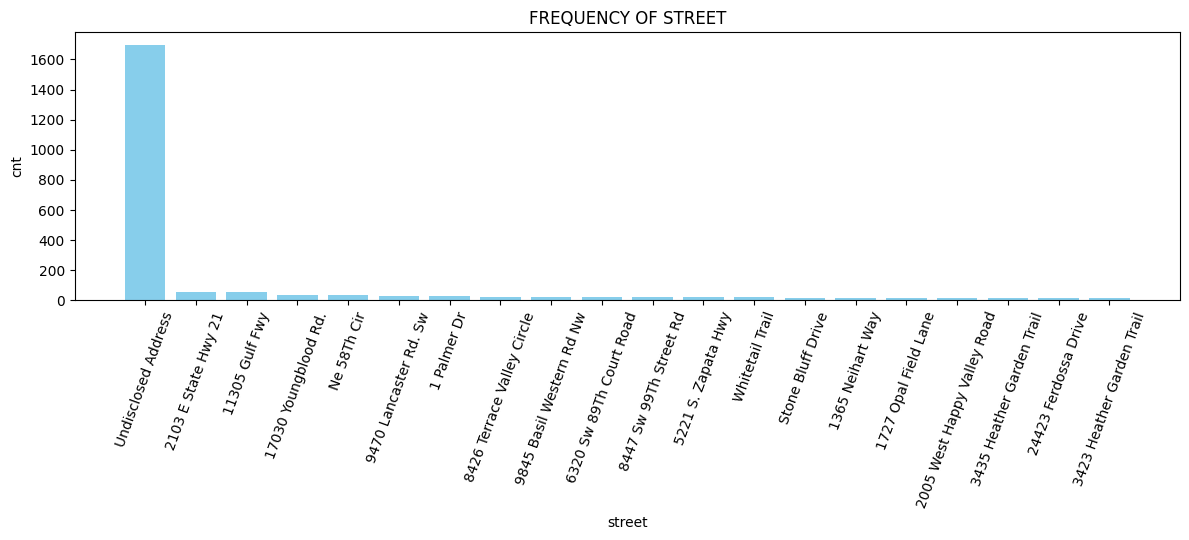

In [255]:
street_cnt = original_data['street'].value_counts().nlargest(20)

plt.figure(figsize=(12, 5.5))
plt.bar(street_cnt.index,
        street_cnt.values,
        color='skyblue')

plt.xlabel('street',
           fontsize=10)

plt.ylabel('cnt')
plt.title('FREQUENCY OF STREET')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

- сложно полностью очистить данные признака "улица", существует слишком много возможных ошибок
- и, возможно, в будущих итерациях можно попробовать другие стратегии, так как при комбинации улицы, города и почтового индекса можно создать ряд дополнительных признаков — например, чтобы найти расстояние от объекта до центра города, ближайшие удобства, общественный транспорт и т.д.
- пока удалить признак

In [256]:
original_data = original_data.drop('street',
                                   axis=1)

#### **state** (штат)

In [257]:
original_data['state'].isnull().sum()[original_data['state'].isnull().sum() > 0]

array([], dtype=int64)

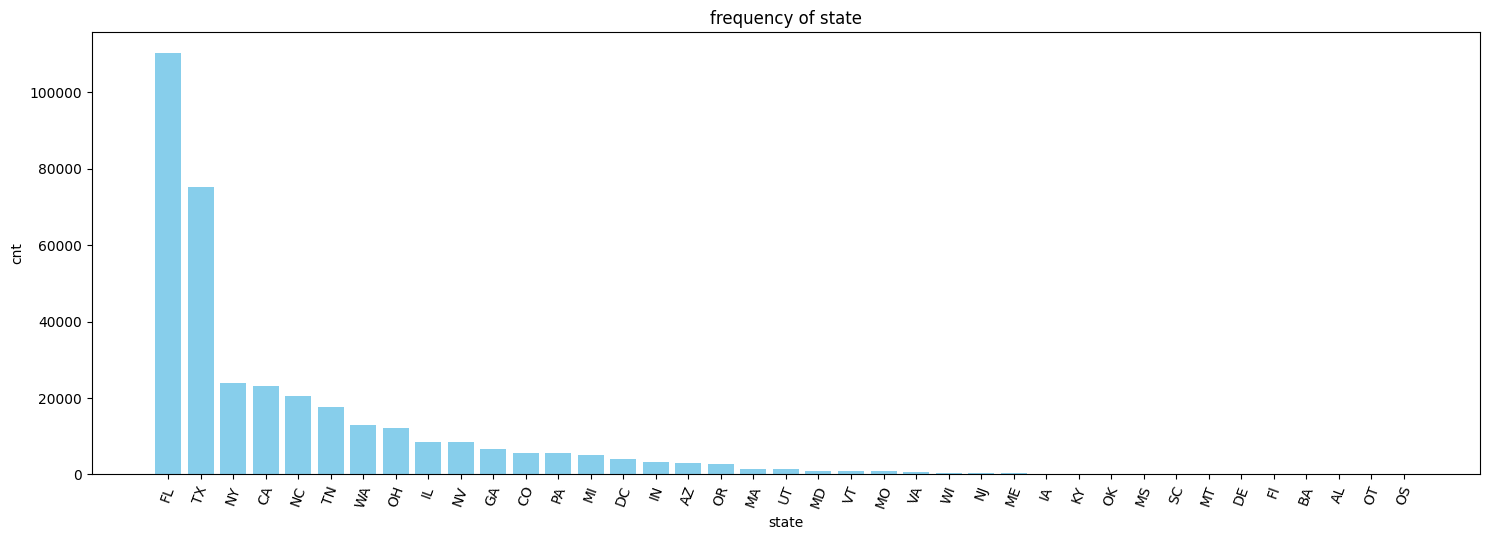

In [258]:
state_cnt = original_data['state'].value_counts()

plt.figure(figsize=(15, 5.5))
plt.bar(state_cnt.index,
        state_cnt.values,
        color='skyblue')

plt.xlabel('state',
           fontsize=10)

plt.ylabel('cnt')
plt.title('frequency of state')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [259]:
original_data['state'].nunique()

39

In [260]:
original_data['state'] = original_data['state'].apply(lambda x: str(x).upper())

In [261]:
original_data['state'].unique()

array(['NC', 'WA', 'CA', 'TX', 'FL', 'PA', 'TN', 'IA', 'NY', 'OR', 'DC',
       'NV', 'AZ', 'GA', 'IL', 'NJ', 'MA', 'OH', 'IN', 'UT', 'MI', 'VT',
       'MD', 'CO', 'KY', 'MO', 'VA', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT',
       'DE', 'BA', 'AL', 'OT', 'OS'], dtype=object)

In [262]:
#создать таблицу доступных штатов США, чтобы убедиться в отсутствии ошибок в исходном наборе данных
state_abbr = pd.DataFrame({
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}, index=['state_abbr']).T.reset_index()

state_abbr = state_abbr.rename(columns={
    'index': 'state_name'
})

In [263]:
original_data = original_data.merge(state_abbr,
                                    how='left',
                                    left_on='state',
                                    right_on='state_abbr')

In [264]:
original_data['state_name'].isnull().sum()[original_data['state_name'].isnull().sum() > 0]

array([4029])

In [265]:
original_data[original_data['state_name'].isnull()]['state'].unique()

array(['DC', 'BA', 'OT', 'OS'], dtype=object)

Нет, округ Колумбия не является штатом. Это федеральный округ, специально созданный для размещения правительства США, как указано в Конституции США. Округ Колумбия часто называют Вашингтоном, Округ Колумбия, и хотя у него есть собственное местное правительство, включая избираемого мэра и совет, он не является частью какого-либо штата и находится под исключительной законодательной юрисдикцией Конгресса США.

In [266]:
original_data[original_data['state'] == 'DC']['city'].unique()

array(['Washington'], dtype=object)

In [267]:
original_data['state'] = original_data['state'].apply(lambda x: 'WA' if str(x) == 'DC' else x)

In [268]:
original_data[original_data['state'] == 'BA']['city'].unique()

array([' '], dtype=object)

In [269]:
original_data[original_data['state'] == 'OT']['city'].unique()

array(['Other'], dtype=object)

In [270]:
original_data[original_data['state'] == 'OS']['city'].unique()

array(['Foreign Country'], dtype=object)

In [271]:
legitimate_states = 'AL, AK, AZ, AR, CA, CO, CT, DE, FL, GA, HI, ID, IL, IN, IA, KS, KY, LA, ME, MD, MA, MI, MN, MS, MO, MT, NE, NV, NH, NJ, NM, NY, NC, ND, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VT, VA, WA, WV, WI, WY'
lst_of_legitimate_states = legitimate_states.split(', ')

In [608]:
#original_data = original_data[~original_data['state'].isin(['BA', 'OT', 'OS'])] #Возможно, будут различия с другими данными, нужно учесть возможные будущие ошибки.
original_data = original_data[original_data['state'].isin(lst_of_legitimate_states)]

In [273]:
original_data['state'] = original_data['state'].astype('string')

In [274]:
original_data[(original_data['state'] != original_data['state_abbr']) & (original_data['state_abbr'].isnull() == False)]

c:\phython\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,parking_availability,parking_type,lotsize,price_per_sq_feet,average_school_rating,school_number,school_distance,school_ages,state_name,state_abbr


#### **zipcode** (почтовый индекс)

- Действительный почтовый индекс штата США всегда начинается с цифры от 0 до 9, обозначающей широкий географический район, и заканчивается числом от 00 до 99, обозначающим конкретную зону доставки.
- Формат почтового индекса представляет собой либо пятизначное число (#####), либо пятизначное число, дефис и еще четыре цифры (#####-####) согласно Geoapify.
- Первая цифра указывает на общий регион страны: 0 на Северо-Востоке и 9 на Западе согласно GeoPostcodes. Следующие две цифры определяют региональную зону или секционный центр. Последние две цифры обозначают конкретное местное почтовое отделение или зону доставки.

In [275]:
original_data['zipcode'].isnull().sum()[original_data['zipcode'].isnull().sum() > 0]

array([], dtype=int64)

In [276]:
original_data['zipcode'].unique()

array(['28387', '99216', '90049', ..., '75792', '20191', '64015'],
      shape=(4432,), dtype=object)

Проверяем длину почтового индекса

In [277]:
original_data['length'] = original_data['zipcode'].apply(lambda x: len(x))
original_data['length'].value_counts()

length
5     354380
4       1911
10       156
1          3
6          3
8          1
2          1
Name: count, dtype: int64

In [278]:
original_data['zipcode'] = original_data['zipcode'].apply(lambda x: '0' + str(x) if len(str(x)) == 4 else x)

In [279]:
original_data['length2'] = original_data['zipcode'].apply(lambda x: len(x))
original_data['length2'].value_counts()

length2
5     356291
10       156
1          3
6          3
8          1
2          1
Name: count, dtype: int64

In [280]:
original_data['zipcode_length'] = original_data['zipcode'].apply(lambda x: True if (len(str(x)) == 5 or len(str(x)) == 10) else False)

In [281]:
original_data['zipcode_length'].value_counts()

zipcode_length
True     356447
False         8
Name: count, dtype: int64

In [282]:
original_data = original_data[original_data['zipcode_length'] == True]

Правильное начало, правильное окончание:

- Первая цифра находится в диапазоне от 0 до 9
- Последние две цифры находятся в диапазоне от 00 до 99
- Формат соответствует стандартам USPS

In [283]:
original_data['correct_start'] = original_data['zipcode'].apply(lambda x: True if str(x)[:1] in '0123456789' else False)
original_data['correct_end'] = original_data['zipcode'].apply(lambda x: True if ((str(x)[-2:-1] in '0123456789') and (str(x)[-1:] in '0123456789')) else False)

In [284]:
original_data['zip_hyphen'] = original_data['zipcode'].apply(lambda x: True if ('-' in x and len(x) == 10) else False)

In [285]:
original_data['only_numbers'] = original_data['zipcode'].apply(lambda x: True if str(x).isdigit() == True else False)

Правильные комбинации

In [286]:
original_data[(original_data['correct_start'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [287]:
original_data[(original_data['correct_end'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


Только цифры и могут содержать дефис

In [288]:
original_data[(original_data['only_numbers'] == False) & (original_data['zip_hyphen'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [289]:
original_data[(original_data['zip_hyphen'] == False) & (original_data['zipcode_length'] == False)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [290]:
original_data[(original_data['zip_hyphen'] == True) & (original_data['length2'] != 10)]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_ages,state_name,state_abbr,length,length2,zipcode_length,correct_start,correct_end,zip_hyphen,only_numbers


In [291]:
original_data['zipcode'] = original_data['zipcode'].astype('string')

- можно проверить, соответствует ли почтовый индекс штату, но это потребует времени
- в будущем этот признак можно будет очистить более тщательно

In [292]:
original_data = original_data.drop(['length', 'length2', 'zipcode_length', 'correct_start', 'correct_end', 'zip_hyphen', 'only_numbers'],
                                   axis=1)

#### **city** (город)

In [293]:
original_data['city'].isnull().sum()[original_data['city'].isnull().sum() > 0]

array([34])

In [294]:
original_data['city'] = original_data['city'].apply(lambda x: str(x).title())

In [295]:
original_data['missing_city'] = original_data['city'].apply(lambda x: True if (str(x).replace('.', '').replace(',', '').\
    replace(' ', '').isalpha() == False) else False)

In [296]:
original_data['missing_city'].value_counts()

missing_city
False    356387
True         60
Name: count, dtype: int64

In [297]:
missing_city = original_data[original_data['missing_city'] == True]

In [298]:
missing_city = missing_city['zipcode']
missing_city = missing_city.drop_duplicates()

In [299]:
list_of_zipcodes = missing_city.values.tolist()
full_five_zipcodes = [int(var) for var in list_of_zipcodes]
zero_five_zipcodes = [var for var in list_of_zipcodes if var.startswith('0')]

- попытаться определить соответствующий город на основе имеющегося почтового индекса
- осторожнее с геокодерами: они часто блокируют слишком много подключений

In [300]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="find_city_name")

blank_city_full, blank_city_five, blank_city_zero = [], [], []
blank_country_full, blank_country_five, blank_country_zero = [], [], []

for p_code in list_of_zipcodes:
    location = geolocator.geocode(p_code)
    address = str(location).split(',')
    blank_city_full.append(str(address[1]).strip())
    blank_country_full.append(str(address[-1]).strip())

In [301]:
for p_code in full_five_zipcodes:
    location = geolocator.geocode(p_code)
    address = str(location).split(',')
    blank_city_five.append(str(address[1]).strip())
    blank_country_five.append(str(address[-1]).strip())

In [302]:
for p_code in zero_five_zipcodes:
    location = geolocator.geocode(p_code)
    address = str(location).split(',')
    blank_city_zero.append(str(address[1]).strip())
    blank_country_zero.append(str(address[-1]).strip())

In [303]:
missing_cities_with_zipcodes_full = pd.DataFrame({
    'postal_code': list_of_zipcodes,
    'find_city': blank_city_full,
    'find_country': blank_country_full
})

missing_cities_with_zipcodes_five = pd.DataFrame({
    'postal_code': full_five_zipcodes,
    'find_city': blank_city_five,
    'find_country': blank_country_five
})

missing_cities_with_zipcodes_zero = pd.DataFrame({
    'postal_code': zero_five_zipcodes,
    'find_city': blank_city_zero,
    'find_country': blank_country_zero
})

missing_cities_with_zipcodes = pd.concat([missing_cities_with_zipcodes_full, missing_cities_with_zipcodes_five, missing_cities_with_zipcodes_zero])

In [304]:
def isEnglish(table: pd.DataFrame):
  
  '''
    > check whether the string contains latin / roman characters
  '''
  
  s = str(table['find_city'])
  return s.isascii()

missing_cities_with_zipcodes['condition'] = missing_cities_with_zipcodes.apply(isEnglish,
                                                                               axis=1)

In [305]:
missing_cities_with_zipcodes = missing_cities_with_zipcodes.drop_duplicates()

In [306]:
missing_cities_with_zipcodes = missing_cities_with_zipcodes[missing_cities_with_zipcodes['find_country'] == 'United States']

In [307]:
original_data = original_data.merge(missing_cities_with_zipcodes,
                                    how='left',
                                    left_on='zipcode',
                                    right_on='postal_code')


original_data['find_city'] = original_data['find_city'].fillna('Unknown')

In [308]:
def consolidate_city(table: pd.DataFrame):
    if table['missing_city'] == True:
        new_city = table['find_city']
    else:
        new_city = table['city']

    return new_city

original_data['city_name'] = original_data.apply(consolidate_city,
                                                 axis=1)

In [309]:
original_data['city_name'].isnull().sum()[original_data['city_name'].isnull().sum() > 0]

array([], dtype=int64)

In [310]:
original_data = original_data[original_data['city_name'] != 'Unknown']

In [311]:
original_data['city_name'] = original_data['city_name'].astype('string')

#### **stories** (этажи)

In [312]:
original_data['stories'].isnull().sum()[original_data['stories'].isnull().sum() > 0]

array([134762])

In [313]:
original_data['stories'] = original_data['stories'].fillna(0)

In [314]:
original_data['stories'] = original_data['stories'].apply(lambda x: str(x).lower())

In [315]:
original_data[original_data['stories'] == '']

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_distance,school_ages,state_name,state_abbr,missing_city,postal_code,find_city,find_country,condition,city_name


In [316]:
original_data[original_data['stories'] == "''"]

,city,sqft,zipcode,state,stories,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,...,school_distance,school_ages,state_name,state_abbr,missing_city,postal_code,find_city,find_country,condition,city_name


In [317]:
original_data['stories'] = original_data['stories'].apply(lambda x: 1 if 'one' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 2 if 'two' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 2 if 'bi' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 3 if 'three' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 3 if 'tri' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 4 if 'four' in str(x) else x)
original_data['stories'] = original_data['stories'].apply(lambda x: 4 if 'quad' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 6 if 'six' in str(x) else x)

original_data['stories'] = original_data['stories'].apply(lambda x: 0 if 'mobile' in str(x) else x)

In [318]:
original_data['stories'] = original_data['stories'].apply(lambda x: str(x).replace('1/2', '0.5').replace('3/4', '0.75'))

In [319]:
def extract_the_storey_number(table: pd.DataFrame):

  '''
    > extract relevant data from the stories feature to return possible storey number
  '''
  
  npt_vl = str(table['stories'])

  if any(char.isdigit() for char in npt_vl):
    all_numbers_as_strings = re.findall(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', npt_vl)
    lst_of_storeys = [abs(float(num)) for num in all_numbers_as_strings]
    dupl_storeys = [sum(lst_of_storeys) if any(element in lst_of_storeys for element in [0.5, 0.75]) else max(lst_of_storeys) for x in lst_of_storeys]
    storeys = (list(set(dupl_storeys))[0])

  elif str(npt_vl).replace(' ', '').isalpha():
    storeys = None

  else:
    storeys = 0

  return storeys

original_data['stories_new'] = original_data.apply(extract_the_storey_number,
                                                   axis=1)

In [320]:
original_data['stories_new'] = original_data['stories_new'].fillna(0)

- провел краткий анализ и выявил среднее количество этажей для каждого типа недвижимости, которое я ранее закодировал в функции propertyType

In [321]:
def consolidate_storey_number(table: pd.DataFrame):
    
    '''
        > if storey feature is missing for known property type, return an average
    '''
    
    if (table['property_type'] != 'unknown type') and (table['stories_new'] == 0):
        if table['property_type'] == 'single family':
            result = 1.5
        elif table['property_type'] == 'american colonial':
            result = 2
        elif table['property_type'] == 'american foursquare':
            result = 2
        elif table['property_type'] == 'barndominium':
            result = 1.5
        elif table['property_type'] == 'bungalow':
            result = 1
        elif table['property_type'] == 'american craftsman':
            result = 1.5
        elif table['property_type'] == 'cape cod':
            result = 1.5
        elif table['property_type'] == 'chalet':
            result = 1.5
        elif table['property_type'] == 'cottage':
            result = 1.5
        elif table['property_type'] == 'farmhouse':
            result = 1.5
        elif table['property_type'] == 'federal':
            result = 10
        elif table['property_type'] == 'gambrel':
            result = 1
        elif table['property_type'] == 'hall':
            result = 1.5
        elif table['property_type'] == 'linked':
            result = 1
        elif table['property_type'] == 'log':
            result = 1.5
        elif table['property_type'] == 'manor':
            result = 1.5
        elif table['property_type'] == 'mansion':
            result = 2.5
        elif table['property_type'] == 'manufactured':
            result = 1
        elif table['property_type'] == 'patio':
            result = 1.5
        elif table['property_type'] == 'prefabricated':
            result = 1.5
        elif table['property_type'] == 'ranch':
            result = 1
        elif table['property_type'] == 'saltbox':
            result = 2
        elif table['property_type'] == 'split-level':
            result = 3
        elif table['property_type'] == 'stilt':
            result = 1.5
        elif table['property_type'] == 'tudor':
            result = 2.5
        elif table['property_type'] == 'tuscan':
            result = 1.5
        elif table['property_type'] == 'victorian':
            result = 2.5
        elif table['property_type'] == 'villa':
            result = 1.5
        elif table['property_type'] == 'beach':
            result = 1
        elif table['property_type'] == 'a-frame':
            result = 2.5
        elif table['property_type'] == 'council':
            result = 2 #1-3
        elif table['property_type'] == 'duplex':
            result = 2
        elif table['property_type'] == 'two-family':
            result = 2
        elif table['property_type'] == 'two-decker':
            result = 2
        elif table['property_type'] == 'semi-detached':
            result = 2
        elif table['property_type'] == 'byre-dwelling':
            result = 1
        elif table['property_type'] == 'connected farm':
            result = 3
        elif table['property_type'] == 'housebarn':
            result = 3 #2-4
        elif table['property_type'] == 'longhouse':
            result = 1
        elif table['property_type'] == 'apartment':
            result = 6 #1-12
        elif table['property_type'] == 'brownstone':
            result = 4 #3-5
        elif table['property_type'] == 'cluster':
            result = 5
        elif table['property_type'] == 'condominium':
            result = 5
        elif table['property_type'] == 'garden':
            result = 1
        elif table['property_type'] == 'housing cooperative':
            result = 1
        elif table['property_type'] == 'penthouse':
            result = 1
        elif table['property_type'] == 'townhouse':
            result = 2.5
        elif table['property_type'] == 'multifamily':
            result = 5.5# 3
        elif table['property_type'] == 'tower block':
            result = 7
        elif table['property_type'] == 'mobile':
            result = 0
        elif table['property_type'] == 'tent':
            result = 0
        elif table['property_type'] == 'yurt':
            result = 1
        else:
            result = 0

    elif (table['property_type'] != 'unknown type') and (table['stories_new'] != 0):
        result = table['stories_new']
    else:
        result = 0

    return result

original_data['storey_number'] = original_data.apply(consolidate_storey_number,
                                                     axis=1)

In [322]:
original_data['storey_number'].value_counts()

storey_number
1.0       96758
2.0       75652
0.0       72136
1.5       48873
5.0       24093
          ...  
2.2           1
3.5           1
1002.0        1
96.0          1
65.0          1
Name: count, Length: 84, dtype: int64

In [323]:
original_data = original_data.drop(['city', 'state_name', 'state_abbr', 'missing_city', 'postal_code',
                                    'find_city', 'find_country', 'condition', 'stories', 'stories_new'],
                                   axis=1)

In [324]:
original_data['storey_number'] = original_data['storey_number'].astype('int16')

### **PRE-PROCESSING** (Предварительная обработка)

- убедиться, что после первого этапа очистки признаков для модели не осталось возможных дубликатов или незамеченных пропусков

In [325]:
original_data.isnull().sum()[original_data.isnull().sum() > 0]

Series([], dtype: int64)

In [326]:
print(f'original dimension after data transformation: {original_data.shape}')

original_data = original_data.drop_duplicates()

print(f'dimension without duplicates: {original_data.shape}')

original dimension after data transformation: (356387, 32)
dimension without duplicates: (351092, 32)


In [327]:
def check_if_empty(table: pd.DataFrame,
                   feature: str):
    null_rows = table[table[feature].isnull()].empty
    no_rows = table[table[feature] == ''].empty
    space_rows = table[table[feature] == "''"].empty
    
    return f'{feature}: {null_rows, no_rows, space_rows}'

In [328]:
print(check_if_empty(original_data, 'sqft'))
print(check_if_empty(original_data, 'zipcode'))
print(check_if_empty(original_data, 'state'))
print(check_if_empty(original_data, 'target'))
print(check_if_empty(original_data, 'listing_status'))
print(check_if_empty(original_data, 'private_pool'))
print(check_if_empty(original_data, 'availability_of_fireplace'))
print(check_if_empty(original_data, 'type_of_fireplace'))
print(check_if_empty(original_data, 'multiple_listings'))
print(check_if_empty(original_data, 'number_of_bedrooms'))
print(check_if_empty(original_data, 'bathroom'))
print(check_if_empty(original_data, 'property_group'))
print(check_if_empty(original_data, 'property_type'))
print(check_if_empty(original_data, 'selling'))
print(check_if_empty(original_data, 'year_of_construction'))
print(check_if_empty(original_data, 'year_of_remodeling'))
print(check_if_empty(original_data, 'availability_of_heating'))
print(check_if_empty(original_data, 'type_of_heating_system'))
print(check_if_empty(original_data, 'source_of_heat'))
print(check_if_empty(original_data, 'availability_of_cooling'))
print(check_if_empty(original_data, 'type_of_cooling_system'))
print(check_if_empty(original_data, 'source_of_cool'))
print(check_if_empty(original_data, 'parking_availability'))
print(check_if_empty(original_data, 'parking_type'))
print(check_if_empty(original_data, 'lotsize'))
print(check_if_empty(original_data, 'price_per_sq_feet'))
print(check_if_empty(original_data, 'average_school_rating'))
print(check_if_empty(original_data, 'school_number'))
print(check_if_empty(original_data, 'school_distance'))
print(check_if_empty(original_data, 'school_ages'))
print(check_if_empty(original_data, 'city_name'))
print(check_if_empty(original_data, 'storey_number'))

sqft: (True, True, True)
zipcode: (True, True, True)
state: (True, True, True)
target: (True, True, True)
listing_status: (True, True, True)
private_pool: (True, True, True)
availability_of_fireplace: (True, True, True)
type_of_fireplace: (True, True, True)
multiple_listings: (True, True, True)
number_of_bedrooms: (True, True, True)
bathroom: (True, True, True)
property_group: (True, True, True)
property_type: (True, True, True)
selling: (True, True, True)
year_of_construction: (True, True, True)
year_of_remodeling: (True, True, True)
availability_of_heating: (True, True, True)
type_of_heating_system: (True, True, True)
source_of_heat: (True, True, True)
availability_of_cooling: (True, True, True)
type_of_cooling_system: (True, True, True)
source_of_cool: (True, True, True)
parking_availability: (True, True, True)
parking_type: (True, True, True)
lotsize: (True, True, True)
price_per_sq_feet: (True, True, True)
average_school_rating: (True, True, True)
school_number: (True, True, True)

In [329]:
with pd.ExcelWriter('data_xlsx/pre_data_cleaning_data.xlsx') as writer:
    original_data.to_excel(writer,
                           index=False,
                           header=True)

### **DATA CLEANING** (очистка данных)

In [330]:
original_data = pd.read_excel('data_xlsx/pre_data_cleaning_data.xlsx')

In [331]:
original_data.isnull().sum()[original_data.isnull().sum() > 0]

Series([], dtype: int64)

##### MEDIAN CONSTRUCTION YEAR (медианный год постройки)

- найти медианный год постройки по типам недвижимости вместо среднего значения, так как при наличии выбросов среднее значение будет смещено
- этот признак будет полезен для заполнения пропусков в годе постройки, т.е. год постройки не может быть 0, это нелогично

In [332]:
property_by_construction = original_data[['property_type', 'year_of_construction']]

property_by_construction = property_by_construction.drop_duplicates()

property_by_construction = property_by_construction.groupby('property_type')['year_of_construction'].median().round(0)
property_by_construction = property_by_construction.reset_index().sort_values(by='property_type')

property_by_construction['year_of_construction'] = property_by_construction['year_of_construction'].astype('int16')

lst_of_yrs = property_by_construction['year_of_construction'].tolist()
with_yearly_specifics = [year for year in lst_of_yrs if year != 0]
median_year = round(statistics.median(with_yearly_specifics))

mask = property_by_construction['year_of_construction'] == 0
property_by_construction.loc[mask, 'year_of_construction'] = median_year

property_by_construction = property_by_construction.rename(columns={
    'property_type': 'c_prop_type',
    'year_of_construction': 'med_construct_year'
})

In [333]:
original_data = original_data.merge(property_by_construction,
                                    how='left',
                                    left_on='property_type',
                                    right_on='c_prop_type')

##### MEDIAN SQFT / LOTSIZE (МЕДИАННАЯ ПЛОЩАДЬ / РАЗМЕР УЧАСТКА)

- найти медианное значение площади по типам недвижимости вместо среднего, так как при наличии выбросов среднее значение будет смещено
- этот признак будет полезен для заполнения пропусков в площади, где возможные нулевые значения площади следует заменить на медианное значение

In [334]:
property_by_median_sqft_n_lotsize = original_data[['property_type', 'sqft']]

property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.drop_duplicates()

property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.groupby('property_type')['sqft'].median().round(0)
property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.reset_index().sort_values(by='property_type')

property_by_median_sqft_n_lotsize['med_lot'] = property_by_median_sqft_n_lotsize['sqft'].apply(lambda x: round(x*2.5, 0))

property_by_median_sqft_n_lotsize = property_by_median_sqft_n_lotsize.rename(columns={
    'property_type': 'sq_prop_type',
    'sqft': 'med_sqft'
})

In [335]:
original_data = original_data.merge(property_by_median_sqft_n_lotsize,
                                    how='left',
                                    left_on='property_type',
                                    right_on='sq_prop_type')

##### AVERAGE SQFT / LOTSIZE (СРЕДНЯЯ ПЛОЩАДЬ / РАЗМЕР УЧАСТКА)

- провел краткое исследование средней площади для каждого типа недвижимости
- этот признак будет полезен для заполнения пропусков в данных о площади, где нулевые значения следует заменить на подходящие, и вместо использования среднего значения из набора данных, который может содержать выбросы, лучше использовать известные средние по стране из базы данных

In [336]:
average_sqft_n_lotsize_by_property = pd.read_excel('data/square_footage_by_property.xlsx')

average_sqft_n_lotsize_by_property['lot_average'] = average_sqft_n_lotsize_by_property['sqft_average'].apply(lambda x: x*2.5)

average_sqft_n_lotsize_by_property['sqft_average'] = average_sqft_n_lotsize_by_property['sqft_average'].astype('int16')
average_sqft_n_lotsize_by_property['lot_average'] = average_sqft_n_lotsize_by_property['lot_average'].astype('int16')

average_sqft_n_lotsize_by_property.property_type = average_sqft_n_lotsize_by_property.property_type.replace('^\s+', '', regex=True)

average_sqft_n_lotsize_by_property.property_type = average_sqft_n_lotsize_by_property.property_type.replace('\s+$', '', regex=True)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_9868\2071110612.py:10: SyntaxWarning: invalid escape sequence '\s'
  average_sqft_n_lotsize_by_property.property_type = average_sqft_n_lotsize_by_property.property_type.replace('^\s+', '', regex=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9868\2071110612.py:13: SyntaxWarning: invalid escape sequence '\s'
  average_sqft_n_lotsize_by_property.property_type = average_sqft_n_lotsize_by_property.property_type.replace('\s+$', '', regex=True)


In [337]:
original_data = original_data.merge(average_sqft_n_lotsize_by_property,
                                    how='left',
                                    left_on='property_type',
                                    right_on='property_type')

##### SQUARE FOOTAGE AND LOT SIZE AND CONSTRUCTION YEAR (ПЛОЩАДЬ, РАЗМЕР УЧАСТКА И ГОД ПОСТРОЙКИ)

Год постройки не может быть 0

In [338]:
def fill_in_median_construction_year(table: pd.DataFrame):
    if table['year_of_construction'] == 0:
        return table['med_construct_year']
    else:
        return table['year_of_construction']

original_data['year_of_construction2'] = original_data.apply(fill_in_median_construction_year,
                                                             axis=1)

площадь не можыт быть равна 0

In [339]:
def create_sqft_with_lotsize(table: pd.DataFrame):
    if (table['sqft'] == 0) and (table['lotsize'] == 0):
        if table['property_type'] == 'unknown type':
            return table['med_sqft']
        else:
            return table['sqft_average']
    elif (table['sqft'] == 0) and (table['lotsize'] > 0):
        return table['lotsize'] / 2.5
    else:
        return table['sqft']
    
original_data['sqft2'] = original_data.apply(create_sqft_with_lotsize,
                                             axis=1)

Размер участка не может быть равен 0

In [340]:
def create_lotsize_with_sqft(table: pd.DataFrame):
    if (table['lotsize'] == 0) and (table['sqft'] == 0):
        if table['property_type'] == 'unknown type':
            return table['med_lot']
        else:
            return table['lot_average']
    elif (table['lotsize'] == 0) and (table['sqft'] > 0):
        return table['sqft'] * 2.5
    else:
        return table['lotsize']
    
original_data['lotsize2'] = original_data.apply(create_lotsize_with_sqft,
                                                axis=1)

Потенциальная возможность поменять местами площадь и размер участка, но на данном этапе я не занимаюсь такой очисткой данных

Удалить все значения меньше нормальных: возможно, площадь указана в акрах или других единицах измерения, но нет способа это проверить, поэтому лучше удалить такие данные совсем

In [341]:
original_data = original_data[original_data['lotsize2'] > 500]

In [342]:
original_data = original_data[original_data['sqft2'] > 500]

In [343]:
original_data.shape

(347224, 44)

##### SCHOOL NUMBER AND SCHOOL NUMBER GROUP (КОЛИЧЕСТВО ШКОЛ И ГРУППИРОВКА ПО КОЛИЧЕСТВУ ШКОЛ)

Да, в городе действительно может быть 65 школ. Не существует фиксированного ограничения на количество школ в городе. Их число зависит от таких факторов, как население, размер города и структура образовательной системы.

Гарландский независимый школьный округ (Garland Independent School District, GISD) включает 67 учебных заведений. В их число входят начальные, средние и старшие школы, а также специализированные программы и курсы профессионально-технического образования. Округ GISD является вторым по величине в округе Даллас и занимает 15-е место по размерам в Техасе.

In [344]:
original_data['school_number'].min(), original_data['school_number'].max()

(np.int64(0), np.int64(65))

Отсортировать и сгруппировать количество школ, чтобы упростить доступные варианты для конечного покупателя и модели.

In [346]:
bins = [-np.inf, 0, 1, 2, 3, 4, 5, 10, np.inf]
labels = ['0', '1', '2', '3', '4', '5', '6-10', '>10']

original_data['school_number_group'] = pd.cut(
    original_data['school_number'], 
    bins=bins, 
    labels=labels,
    right=False  # включает левую границу
)

In [347]:
original_data['school_number_group'].value_counts()

school_number_group
4       190049
6-10     81548
3        33679
5        20200
>10       9751
2         8273
1         3724
0            0
Name: count, dtype: int64

##### SCHOOL DISTANCE AND SCHOOL DISTANCE GROUP (РАССТОЯНИЕ ДО ШКОЛ И ГРУППИРОВКА РАССТОЯНИЙ)

In [348]:
original_data['school_distance'].min(), original_data['school_distance'].max()

(np.int64(0), np.int64(1591))

Вероятно, расстояние измеряется в милях или километрах, поэтому школы с расстоянием более 50 миль или км — это слишком много, возможный выброс.

In [349]:
original_data = original_data[original_data['school_distance'] < 50]

Отсортировать и сгруппировать расстояние до школ, чтобы упростить доступные варианты для конечного покупателя и модели.

In [351]:
bins = [0, 0.5, 1, 1.5, 2, 3, 5, 10, np.inf]
labels = ['<0.5M', '0.5-1M', '1-1.5M', '1.5-2M', '2-3M', '3-5M', '5-10M', '>10M']

original_data['school_distance_group'] = pd.cut(
    original_data['school_distance'], 
    bins=bins, 
    labels=labels,
    right=False  # включает левую границу, исключает правую
)

In [352]:
original_data['school_distance_group'].value_counts()

school_distance_group
3-5M      86168
2-3M      81032
1-1.5M    60588
5-10M     60043
>10M      44964
<0.5M     14412
1.5-2M        0
0.5-1M        0
Name: count, dtype: int64

##### STOREYS AND STOREY NUMBER GROUP (ЭТАЖИ И ГРУППИРОВКА ПО КОЛИЧЕСТВУ ЭТАЖЕЙ)

In [353]:
original_data['storey_number'].min(), original_data['storey_number'].max()

(np.int64(0), np.int64(1002))

In [354]:
original_data['storey_number'].describe()

count    347207.000000
mean          1.734930
std           3.064093
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1002.000000
Name: storey_number, dtype: float64

Высотный кондоминиум* обычно считается зданием с 10 и более этажами. Такие здания часто встречаются в городских районах и предлагают такие удобства, как лифты, а также часто имеют подземные гаражи или открытые парковки.

Вот более подробная разбивка:

- Малоэтажные здания: обычно 1-3 или 1-4 этажа
- Среднеэтажные здания: обычно 5-9 этажей
- Высотные здания: обычно 10 и более этажей
- Небоскрёбы: часто 40 и более этажей и могут считаться разновидностью высотных зданий

*(форма собственности, при которой каждый владелец имеет индивидуальное право на свою квартиру (или другое помещение), а общее имущество здания и придомовая территория находятся в совместном долевом владении)

Объекты с количеством этажей более 50 следует считать выбросами.

In [355]:
original_data = original_data[original_data['storey_number'] <= 50]

Отсортировать и сгруппировать количество этажей, чтобы упростить доступные варианты для конечного покупателя и модели.

In [358]:
bins = [-np.inf, 1, 5, 10, 40, np.inf]
labels = ['no storeys', 'low-rise', 'mid-rise', 'high-rise', 'skyscraper']

original_data['storeys_group'] = pd.cut(
    original_data['storey_number'], 
    bins=bins, 
    labels=labels,
    right=False  # включает левую границу
)

In [359]:
original_data['storeys_group'].value_counts()

storeys_group
low-rise      241019
no storeys     68921
mid-rise       35450
high-rise       1537
skyscraper       153
Name: count, dtype: int64

##### NUMBER OF BEDROOMS AND BEDROOMS GROUP (КОЛИЧЕСТВО СПАЛЕН И ГРУППИРОВКА СПАЛЕН)

In [360]:
original_data['number_of_bedrooms'].min(), original_data['number_of_bedrooms'].max()

(np.int64(0), np.int64(99))

In [361]:
original_data['number_of_bedrooms'].describe()

count    347080.00000
mean          2.52963
std           2.03478
min           0.00000
25%           0.00000
50%           3.00000
75%           4.00000
max          99.00000
Name: number_of_bedrooms, dtype: float64

Большинство объектов недвижимости не будут иметь более 20 спален.

In [362]:
original_data = original_data[original_data['number_of_bedrooms'] <= 20]

In [376]:
bins = [-1, 0, 1, 2, 3, 4, np.inf]
labels = ['0', '1', '2', '3', '4', '5+']

original_data['bedroom_group'] = pd.cut(
    original_data['number_of_bedrooms'], 
    bins=bins, 
    labels=labels
)

Объекты без спален могут быть свойствами с пустыми значениями спален, поэтому на данном этапе я сохраню эти записи.

In [377]:
original_data['bedroom_group'].value_counts()

bedroom_group
3     103982
0      88102
4      68210
2      48537
5+     32396
1       5690
Name: count, dtype: int64

In [378]:
sorted(original_data[original_data['bedroom_group'] == '>10']['number_of_bedrooms'].unique().tolist())

[]

##### NUMBER OF BATHROOMS (КОЛИЧЕСТВО ВАННЫХ КОМНАТ)

- объекты без спален, но с ванными комнатами > 0, считаются выбросами на данном этапе
- если данные содержат объекты без спален и без ванных комнат, это определенно считается ошибочной записью

In [379]:
original_data = original_data[~((original_data['number_of_bedrooms'] == 0) & (original_data['bathroom'] > 0))]
original_data = original_data[~((original_data['number_of_bedrooms'] == 0) & (original_data['bathroom'] == 0))]

In [380]:
def create_a_bath_group(table: pd.DataFrame):
  if table['bathroom'] == 0:
    return 'no bathrooms'
  elif table['bathroom'] < 1:
    return '< 1 bathrooms'
  elif table['bathroom'] >= 1 and table['bathroom'] < 2:
    return '1+ bathrooms'
  elif table['bathroom'] >= 2 and table['bathroom'] < 3:
    return '2+ bathrooms'
  elif table['bathroom'] >= 3 and table['bathroom'] < 5:
    return '3-4+ bathrooms'
  elif table['bathroom'] >= 5 and table['bathroom'] <= 10:
    return '5-10 bathrooms'
  elif table['bathroom'] > 10:
    return '> 10 bathrooms'
  else:
    return 'no data'

original_data['bathroom_group'] = original_data.apply(create_a_bath_group,
                                                      axis=1)

In [381]:
original_data['bathroom_group'].value_counts()

bathroom_group
2+ bathrooms      110238
3-4+ bathrooms     96112
5-10 bathrooms     18143
1+ bathrooms       17469
no bathrooms       16385
> 10 bathrooms       467
< 1 bathrooms          1
Name: count, dtype: int64

In [382]:
sorted(original_data[original_data['bathroom_group'] == '5-10 bathrooms']['bathroom'].unique().tolist())

[5.0, 5.25, 5.5, 6.0, 6.5, 6.75, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]

##### PROPERTY AGE AND PROPERTY AGE GROUP (ВОЗРАСТ НЕДВИЖИМОСТИ И ГРУППИРОВКА ПО ВОЗРАСТУ)

-  возраст недвижимости является полезным признаком для определения стоимости property
- большинство покупателей не имеют средств или знаний, когда дело доходит до ремонта, и предпочли бы избежать его

In [383]:
def create_property_age(table: pd.DataFrame):

  current_datetime = datetime.now()
  current_year = current_datetime.year

  if table['year_of_remodeling'] > 0:
    home_age = current_year - table['year_of_remodeling']
  else:
    home_age = current_year - table['year_of_construction2']

  return home_age

original_data['property_age'] = original_data.apply(create_property_age,
                                                    axis=1)

In [385]:
bins = [0, 30, 65, 100, np.inf]
labels = ['Class A', 'Class B', 'Class C', 'Class D']

original_data['property_age_group'] = pd.cut(
    original_data['property_age'], 
    bins=bins, 
    labels=labels,
    right=False  # включает левую границу, исключает правую
)

Да, можно купить недвижимость, построенную в XIX веке. Эти старые дома, часто называемые викторианскими или историческими зданиями, можно найти и приобрести, но они имеют свои особенности.

но все, что старше 300 лет, вероятно, является выбросом; сомневаюсь, что большинство покупателей будут приобретать недвижимость XVIII века или еще более старую.

In [386]:
original_data = original_data[original_data['property_age'] < 300]

##### SQUARE FOOTAGE GROUP (ГРУППИРОВКА ПО ПЛОЩАДИ)

In [387]:
original_data['sqft2'].describe().round()

count       258813.0
mean          7423.0
std        1624939.0
min            501.0
25%           1347.0
50%           1880.0
75%           2652.0
max      795979430.0
Name: sqft2, dtype: float64

Группировка площади на основе средних показателей по стране

In [389]:
bins = [-1, 0, 1000, 2500, np.inf]
labels = ['no data', 'small', 'medium', 'large']

original_data['sqft_group'] = pd.cut(
    original_data['sqft2'], 
    bins=bins, 
    labels=labels
)

In [390]:
original_data['sqft_group'].value_counts()

sqft_group
medium     162899
large       74028
small       21886
no data         0
Name: count, dtype: int64

##### LOTSIZE GROUP (ГРУППИРОВКА ПО РАЗМЕРУ УЧАСТКА)

In [391]:
original_data['lotsize2'].describe().round()

count    2.588130e+05
mean     9.029500e+04
std      7.538424e+06
min      5.020000e+02
25%      3.998000e+03
50%      6.650000e+03
75%      1.055900e+04
max      2.147484e+09
Name: lotsize2, dtype: float64

Группировка размера участка на основе средних показателей по стране, или скорее на основе предыдущего признака - группировки площади, умноженной на 2.5 раза

In [393]:
bins = [-1, 0, 2500, 6500, np.inf]
labels = ['no data', 'small', 'medium', 'large']

original_data['lotsize_group'] = pd.cut(
    original_data['lotsize2'], 
    bins=bins, 
    labels=labels
)

In [394]:
original_data['lotsize_group'].value_counts()

lotsize_group
large      134031
medium      94951
small       29831
no data         0
Name: count, dtype: int64

##### PRICE PER SQUARE FEET GROUP (ГРУППИРОВКА ПО ЦЕНЕ ЗА КВАДРАТНЫЙ ФУТ)

In [395]:
original_data['price_per_sq_feet'].describe()

count    258813.000000
mean        246.545112
std         423.519625
min           0.000000
25%         111.000000
50%         164.000000
75%         275.000000
max      134950.000000
Name: price_per_sq_feet, dtype: float64

In [397]:
bins = [-1, 0, 100, 150, 200, 250, np.inf]
labels = ['no data', '<$100', '$100-$150', '$150-$200', '$200-$250', '>$250']

original_data['price_sqft_group'] = pd.cut(
    original_data['price_per_sq_feet'], 
    bins=bins, 
    labels=labels
)

In [398]:
original_data['price_sqft_group'].value_counts()

price_sqft_group
>$250        73422
$100-$150    63369
$150-$200    43824
<$100        35616
$200-$250    25909
no data      16673
Name: count, dtype: int64

##### INTERQUARTILE RANGE (ИНТЕРКВАРТИЛЬНЫЙ РАЗМАХ)

Логарифмическая шкала обычно используется с интерквартильным размахом (IQR) при работе с данными, которые охватывают широкий диапазон значений, сильно смещены или когда нужно подчеркнуть процентные изменения, а не абсолютные разницы. Это связано с тем, что логарифмические шкалы сжимают большие диапазоны, облегчая визуализацию и интерпретацию данных, особенно при наличии выбросов или смещенных распределений.

Смещенные данные (skewed data) — это тип данных, где распределение не является симметричным, то есть данные неравномерно распределены вокруг среднего значения или центра.

Удаление дублирующих признаков

In [399]:
original_data = original_data.drop(['sqft', 'year_of_construction', 'lotsize',
                                    'c_prop_type', 'med_construct_year',
                                    'sq_prop_type', 'med_sqft', 'med_lot',
                                    'property_group_y', 'sqft_range',
                                    'sqft_average', 'lot_average'],
                                   axis=1)

In [400]:
original_data = original_data.rename(columns={
    'property_group_x': 'property_group',
    'year_of_construction2': 'year_of_construction',
    'sqft2': 'sqft',
    'lotsize2': 'lotsize',
})

Исследование целовой переменной

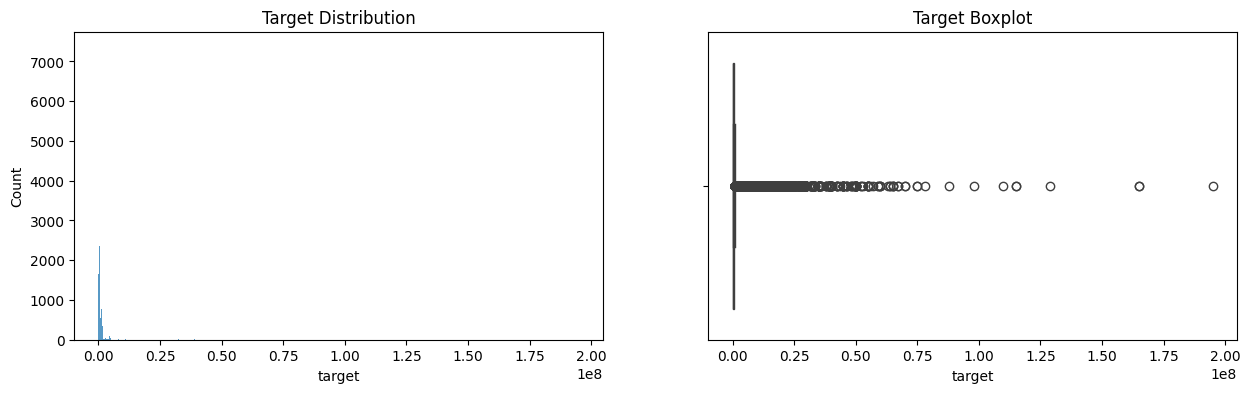

In [401]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(15, 4))

histplot = sns.histplot(data=original_data,
                        x='target',
                        ax=axes[0]);
histplot.set_title('Target Distribution');

boxplot = sns.boxplot(data=original_data,
                      x='target',
                      ax=axes[1]);
boxplot.set_title('Target Boxplot');

In [402]:
def outliers_iqr_mod(data,
                     feature,
                     left=1.5,
                     right=1.5,
                     log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, data = outliers_iqr_mod(original_data,
                                  'target')

print(f"Outliers by Tukey's Method: {outliers.shape[0]}")

Outliers by Tukey's Method: 26172


Было бы полезно взять записи без выбросов в самой целевой переменной, так как это помогло бы прогнозам модели.

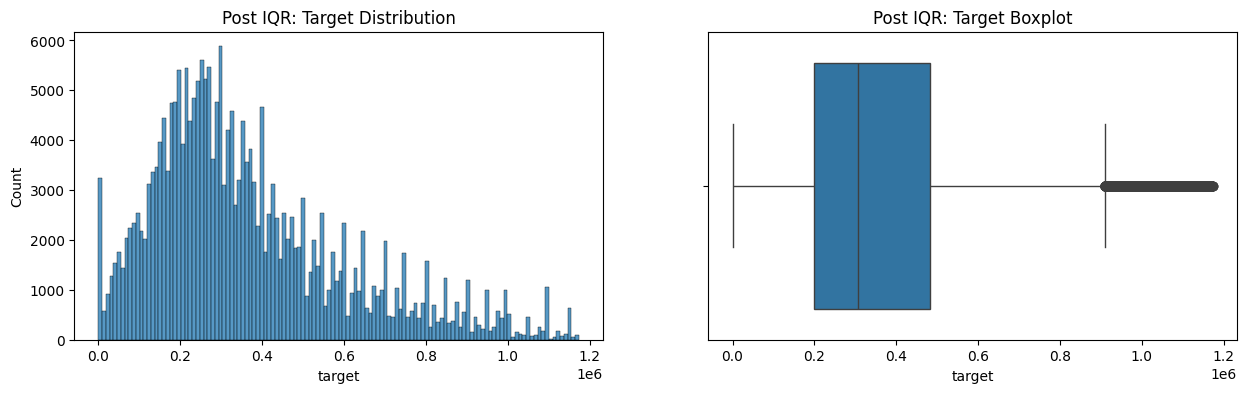

In [403]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(15, 4))

histplot = sns.histplot(data=data,
                        x='target',
                        ax=axes[0])
histplot.set_title('Post IQR: Target Distribution');

boxplot = sns.boxplot(data=data,
                      x='target',
                      ax=axes[1])
boxplot.set_title('Post IQR: Target Boxplot');

In [404]:
print(f'original dimension after data cleaning: {data.shape}')

data = data.drop_duplicates()

print(f'dimension without duplicates: {data.shape}')

original dimension after data cleaning: (232641, 42)
dimension without duplicates: (232641, 42)


In [405]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

Почти уверен, что мы не можем использовать этот тип признака.

In [406]:
data = data[data['selling'] == 'for sale']

data = data.drop('selling',
                 axis=1)

In [408]:
with pd.ExcelWriter('data_xlsx/post_data_cleaning_data.xlsx') as writer:
    data.to_excel(writer,
                  index=False,
                  header=True)

##### ISOLATION FOREST

Краткий анализ возможных выбросов

In [409]:
isolation_forest_df = data.copy()

In [410]:
anomaly_inputs_mx = ['number_of_bedrooms', 'bathroom',
                    #  'sqft', 'lotsize',
                     'property_age', 'storey_number']

In [411]:
model_IF_mx = ensemble.IsolationForest(contamination=0.1,
                              random_state=42)

model_IF_mx.fit(isolation_forest_df[anomaly_inputs_mx])

IsolationForest(contamination=0.1, random_state=42)

In [412]:
isolation_forest_df['anomaly_scores'] = model_IF_mx.decision_function(isolation_forest_df[anomaly_inputs_mx])

isolation_forest_df['anomaly'] = model_IF_mx.predict(isolation_forest_df[anomaly_inputs_mx])

In [413]:
def outlier_plot(data,
                 outlier_method_name):
    
	print(f'outlier method: {outlier_method_name}')
	method = f'{outlier_method_name}_anomaly'
	print(f"number of anomalous values {len(data[data['anomaly']==-1])}")
	print(f"number of non-anomalous values {len(data[data['anomaly']==1])}")
	print(f"total number of values: {len(data)}")

outlier method: ['Isolation Forest', 'number_of_bedrooms', 'bathroom', 'property_age', 'storey_number']
number of anomalous values 23239
number of non-anomalous values 209149
total number of values: 232388


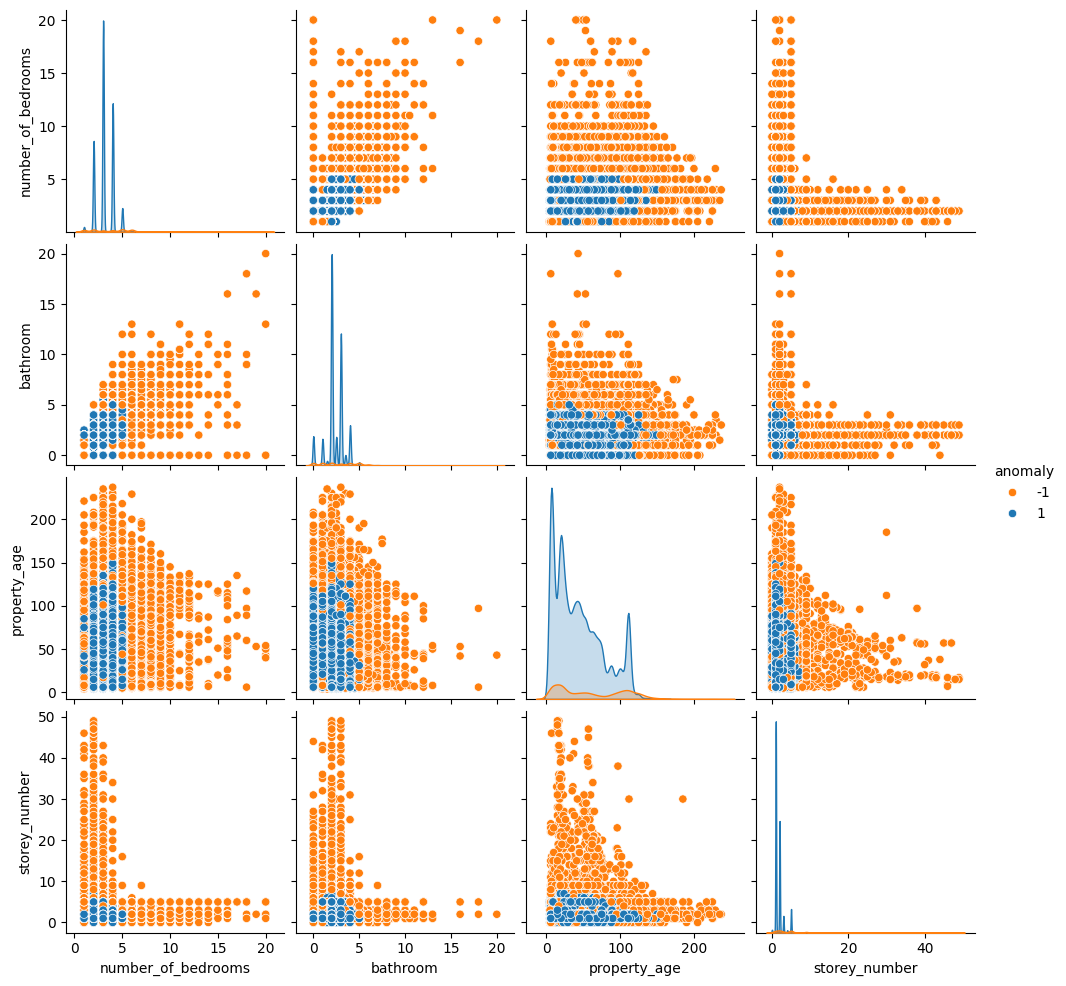

In [414]:
outlier_plot(isolation_forest_df, ['Isolation Forest',
                                   'number_of_bedrooms', 'bathroom',
                                   #'sqft', 'lotsize',
                                   'property_age', 'storey_number']);

palette = ['#ff7f0e', '#1f77b4']

sns.pairplot(isolation_forest_df,
             vars=anomaly_inputs_mx,
             hue='anomaly',
             palette=palette,
);

### **EXPLORATORY DATA ANALYSIS** (ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ)

##### STATE (штат)

In [416]:
fig = px.box(
    data_frame=data,
    x='target',
    y='state',
    color='state',
    orientation='h',
    title='Distribution of Property Value by State',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='State',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.1_box_state.html')

Комментарии:

- много выбросов, но удалять нельзя
- разумное распределение: штаты с более высоким уровнем дохода имеют более высокую стоимость недвижимости, меньшие (по территории) штаты — более низкую

##### PROPERTY GROUP (ГРУППА НЕДВИЖИМОСТИ)

In [417]:
fig = px.box(
    data_frame=data,
    x='target',
    y='property_group',
    color='property_group',
    orientation='h',
    title='Distribution of Property Value by Property Group',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Property Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.2_box_property_group.html')

Комментарий:
- Многоквартирное жилье немного опережает отдельные дома по диапазону цен, возможно, потому что в густонаселенных городах/штатах большинство людей покупают квартиры, а не дома
- Мобильное жилье находится на самом низком уровне, что вполне логично, поскольку покупатели реже приобретают мобильные дома

##### PROPERTY TYPE (ТИП НЕДВИЖИМОСТИ)

In [418]:
fig = px.box(
    data_frame=data,
    x='target',
    y='property_type',
    color='property_type',
    orientation='h',
    title='Distribution of Property Value by Property Type',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Property Type',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.3_box_property_type.html')

Комментарий:
- Интересное разделение, но для извлечения информации из графика необходимо более глубокое знание рынка недвижимости

##### SCHOOLS (ШКОЛА)

SCHOOL RATING (РЕЙТИНГ ШКОЛ)

In [419]:
fig = px.histogram(data,
                   x="average_school_rating",
                   title='Distribution of School Rating'
)

fig.update_layout(
   xaxis_title_text='Average School Rating',
   yaxis_title_text='Count',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.4b_histogram_school_rating.html')

Комментарий:
- В основном нормальное распределение

SCHOOL DISTANCE (РАССТОЯНИЕ ДО ШКОЛ)

In [420]:
fig = px.box(
    data_frame=data,
    x='target',
    y='school_distance_group',
    color='school_distance_group',
    orientation='h',
    title='Distribution of Property Value by School Distance',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='School Distance',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.4c_box_school_distance.html')

Комментарий:
- Расстояние до школы, похоже, не влияет на стоимость недвижимости ни в ту, ни в другую сторону

SCHOOL NUMBER (КОЛИЧЕСТВО ШКОЛ)

In [421]:
fig = px.box(
    data_frame=data,
    x='target',
    y='school_number_group',
    color='school_number_group',
    orientation='h',
    title='Distribution of Property Value by School Availability',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='School Number',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.4d_box_school_number.html')

Комментарий:
- В основном не влияет на стоимость недвижимости ни в положительную, ни в отрицательную сторону
- Фактически, большее количество школ, кажется, оказывает негативный эффект? > Возможно, более густонаселенные районы, поэтому менее привлекательные с точки зрения стоимости? Т.е. большинство людей предпочли бы жить в более тихих районах и готовы за это платить
- Для анализа этого результата требуются более глубокие знания рынка недвижимости

##### NUMBER OF BEDROOMS (КОЛИЧЕСТВО СПАЛЕН)

In [422]:
fig = px.box(
    data_frame=data,
    x='target',
    y='bedroom_group',
    color='bedroom_group',
    orientation='h',
    title='Distribution of Property Value by Number of Bedrooms',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Number of Bedrooms',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.5b_box_bedroom.html')

Комментарий:
- Стандартный ожидаемый результат: больше спален — выше стоимость недвижимости

##### NUMBER OF BATHROOMS (КОЛИЧЕСТВО ВАННЫХ КОМНАТ)

In [423]:
fig = px.box(
    data_frame=data,
    x='target',
    y='bathroom_group',
    color='bathroom_group',
    orientation='h',
    title='Distribution of Property Value by Number of Bathrooms',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Number of Bathrooms',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.6_box_bathroom.html')

Комментарий:
- Стандартный ожидаемый результат: больше ванных комнат — выше стоимость недвижимости

##### PROPERTY AGE (ВОЗРАСТ НЕДВИЖИМОСТИ)

In [424]:
fig = px.box(
    data_frame=data,
    x='target',
    y='property_age_group',
    color='property_age_group',
    orientation='h',
    title='Distribution of Property Value by Property Age',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Property Age Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.7_box_property_age.html')

Комментарий:
- Интересное распределение, стоит исследовать, поскольку возраст недвижимости, похоже, не оказывает существенного влияния на её стоимость, что меня удивляет

##### SQUARE FEET (ПЛОЩАДЬ В КВАДРАТНЫХ ФУТАХ)

In [425]:
fig = px.box(
    data_frame=data,
    x='target',
    y='sqft_group',
    color='sqft_group',
    orientation='h',
    title='Distribution of Property Value by Square Feet',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='SqFeet Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.8a_box_sqfeet.html')

Комментарий:
- Ожидаемый стандартный результат: большая площадь — выше стоимость недвижимости

##### PRICE PER SQUARE FOOT (ЦЕНА ЗА КВАДРАТНЫЙ ФУТ)

In [426]:
fig = px.box(
    data_frame=data,
    x='target',
    y='price_sqft_group',
    color='price_sqft_group',
    orientation='h',
    title='Distribution of Property Value by Price per Sq.Feet',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Price per Sq.Feet Group',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.8b_box_price_per_sqfeet.html')

Комментарий:
- Ожидаемый стандартный результат: чем выше цена за квадратный фут, тем выше стоимость недвижимости

##### STOREY NUMBER (КОЛИЧЕСТВО ЭТАЖЕЙ)

In [427]:
fig = px.box(
    data_frame=data,
    x='target',
    y='storeys_group',
    color='storeys_group',
    orientation='h',
    title='Distribution of Property Value by Storey Number',
)

fig.update_layout(
   xaxis_title_text='Property Value',
   yaxis_title_text='Storey Number',
   showlegend=False
)

#fig.show()

fig.write_html('graphs/1.9_box_storey_number.html')

Комментарий:
- Высотные здания показывают лучшие результаты
- Для анализа этого результата требуются более глубокие знания рынка недвижимости, например, возможно, большинство покупателей склоняются к квартирному типу жилья, что создает повышенный спрос и, соответственно, более высокие цены

#### FEATURES CORRELATION (КОРРЕЛЯЦИЯ ПРИЗНАКОВ)

In [428]:
numericals = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

c_data = data.select_dtypes(include=numericals)

Коэффициент Пирсона предпочтителен, когда данные являются числовыми и количественными, тогда как коэффициент Спирмена предпочтителен, когда данные являются качественными и порядковыми.

In [429]:
matrix_corr_s = c_data.corr(method='spearman')
matrix_corr_s

,target,number_of_bedrooms,bathroom,year_of_remodeling,price_per_sq_feet,average_school_rating,school_number,school_distance,storey_number,year_of_construction,sqft,lotsize,property_age
target,1.000000,0.245541,0.489811,0.027925,0.682913,0.344097,-0.057813,-0.061695,0.208514,0.156260,0.465887,0.088882,-0.174188
number_of_bedrooms,0.245541,1.000000,0.538725,-0.027000,-0.178846,0.081245,0.033749,0.006555,-0.063055,0.042791,0.678426,0.343639,-0.056614
bathroom,0.489811,0.538725,1.000000,0.018014,0.083497,0.243351,-0.014567,0.039958,0.261170,0.318831,0.694731,0.157734,-0.315760
year_of_remodeling,0.027925,-0.027000,0.018014,1.000000,0.047995,0.065148,-0.201631,-0.015251,-0.009980,-0.002918,-0.026915,0.061388,-0.151359
price_per_sq_feet,0.682913,-0.178846,0.083497,0.047995,1.000000,0.198413,-0.048718,-0.079806,0.184439,0.070338,-0.116210,-0.164082,-0.090773
average_school_rating,0.344097,0.081245,0.243351,0.065148,0.198413,1.000000,0.024947,0.146086,0.062726,0.214891,0.244810,0.107381,-0.174286
school_number,-0.057813,0.033749,-0.014567,-0.201631,-0.048718,0.024947,1.000000,0.274056,-0.084212,0.039472,0.050531,0.118888,0.004434
school_distance,-0.061695,0.006555,0.039958,-0.015251,-0.079806,0.146086,0.274056,1.000000,-0.016919,0.147674,0.047732,0.085018,-0.113519
storey_number,0.208514,-0.063055,0.261170,-0.009980,0.184439,0.062726,-0.084212,-0.016919,1.000000,0.141621,0.046348,-0.327622,-0.126653
year_of_construction,0.156260,0.042791,0.318831,-0.002918,0.070338,0.214891,0.039472,0.147674,0.141621,1.000000,0.192052,0.021150,-0.916547


In [430]:
fig = px.imshow(matrix_corr_s[matrix_corr_s.abs() >= 0.5],
                text_auto=True)

fig.update_layout(height=900,
                  width=900,
                  title_text='Spearman Correlation between Numerical Features'
)

#fig.show()

fig.write_html('graphs/2.1_spearman_correlation.html')

Комментарий:
- стоит изучить выбор признаков только по числовым данным

In [431]:
matrix_corr_s['target'].abs().sort_values(ascending=False)[1:11]

price_per_sq_feet        0.682913
bathroom                 0.489811
sqft                     0.465887
average_school_rating    0.344097
number_of_bedrooms       0.245541
storey_number            0.208514
property_age             0.174188
year_of_construction     0.156260
lotsize                  0.088882
school_distance          0.061695
Name: target, dtype: float64

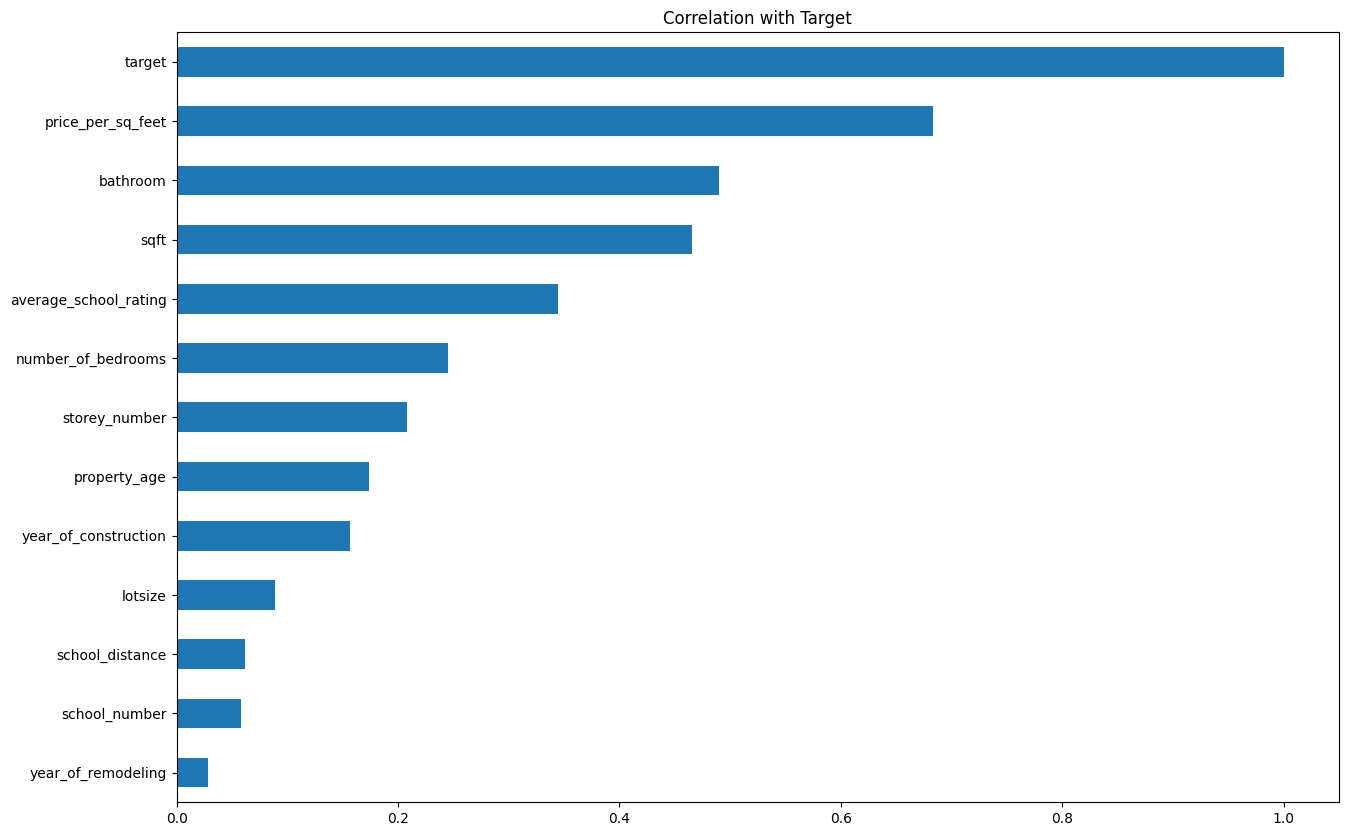

In [432]:
fig = plt.subplots(figsize=(15, 10))
matrix_corr_s['target'].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.title('Correlation with Target')
plt.show()

### **STATISTICAL TESTING** (СТАТИСТИЧЕСКОЕ ТЕСТИРОВАНИЕ)

In [433]:
alpha = 0.05 
print(f'significance level = {alpha:.2f}')

significance level = 0.05


In [434]:
def decision_normality(p):
    print(f'p-value = {p:.3f}')
    if p <= alpha:
        print(f'p-value {p:.3f} is less than alpha {alpha:.3f}, asymmetric distribution')
    else:
        print(f'p-value {p:.3f} is greater than alpha {alpha:.3f}, normal distribution')


def anderson_darling(x):
    for i in range(len(x.critical_values)):
        sig_lev, crit_val = x.significance_level[i], x.critical_values[i]
        if x.statistic < crit_val:
            print(f'normal distribution: {crit_val} critical value at {sig_lev}% significance level')
        else:
            print(f'asymmetric distribution: {crit_val} critical value at {sig_lev}% significance level')


def decision_hypothesis(p):
    print(f'p-value = {p:.3f}')
    if p <= alpha:
        print(f'p-value {p:.3f} is less than alpha {alpha:.3f}, reject NULL hypothesis in favor of the ALTERNATIVE')
    else:
        print(f'p-value {p:.3f} is greater than alpha {alpha:.3f}, no reason to reject NULL hypothesis')

Всего несколько тестов, так как нет времени изучить больше вариантов

#### ВЛИЯЕТ ЛИ МЕСТОПОЛОЖЕНИЕ НА СТОИМОСТЬ НЕДВИЖИМОСТИ??

*Нулевая гипотеза* ($H_0$): местоположение недвижимости не влияет на её стоимость
Северо-Восток-Пенсильвания ($μ_1$), Средний Запад-Мичиган ($μ_2$), Юг-Флорида ($μ_3$), Запад-Аризона ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза* ($H_1$): местоположение недвижимости влияет на её стоимость
Северо-Восток-Пенсильвания ($μ_1$), Средний Запад-Мичиган ($μ_2$), Юг-Флорида ($μ_3$), Запад-Аризона ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

##### **Проверка на нормальность**


С помощью теста Шапиро-Уилка проверяется, является ли распределение признака нормальным:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отличается от нормального.

In [435]:
northeast_pa = data.loc[data['state'] == 'PA', 'target']
midwest_mi = data.loc[data['state'] == 'MI', 'target']
south_fl = data.loc[data['state'] == 'FL', 'target']
west_az = data.loc[data['state'] == 'AZ', 'target']

print('Northeast, Pennsylvania:')
result = stats.shapiro(northeast_pa)
decision_normality(result[1])
print()

print('Midwest, Michigan:')
result = stats.shapiro(midwest_mi)
decision_normality(result[1])
print()

print('South, Florida:')
result = stats.shapiro(south_fl)
decision_normality(result[1])

print('West, Arizona:')
result = stats.shapiro(west_az)
decision_normality(result[1])

Northeast, Pennsylvania:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

Midwest, Michigan:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

South, Florida:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution
West, Arizona:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution


c:\phython\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 65427.



С помощью теста Андерсона-Дарлинга проверяется, является ли распределение признака нормальным:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отличается от нормального.

In [436]:
print('Northeast, Pennsylvania:')
result = stats.anderson(northeast_pa)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)
print()


print('Midwest, Michigan:')
result = stats.anderson(midwest_mi)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)
print()


print('South, Florida:')
result = stats.anderson(south_fl)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)
print()


print('West, Arizona:')
result = stats.anderson(west_az)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)

Northeast, Pennsylvania:
stat=123.122
asymmetric distribution: 0.575 critical value at 15.0% significance level
asymmetric distribution: 0.655 critical value at 10.0% significance level
asymmetric distribution: 0.786 critical value at 5.0% significance level
asymmetric distribution: 0.917 critical value at 2.5% significance level
asymmetric distribution: 1.091 critical value at 1.0% significance level

Midwest, Michigan:
stat=299.915
asymmetric distribution: 0.575 critical value at 15.0% significance level
asymmetric distribution: 0.655 critical value at 10.0% significance level
asymmetric distribution: 0.786 critical value at 5.0% significance level
asymmetric distribution: 0.917 critical value at 2.5% significance level
asymmetric distribution: 1.091 critical value at 1.0% significance level

South, Florida:
stat=1954.828
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distr

Проверка равенства дисперсий между выборками данных:

In [437]:
result = stats.levene(northeast_pa, midwest_mi, south_fl, west_az)
pv = result[1]
print(f'p-value = {pv:.3f}')

if pv <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

p-value = 0.000
unequal variance, non-parametric tests must be used



In [438]:
test_statistic, p_value = stats.bartlett(northeast_pa, midwest_mi, south_fl, west_az)

print(f'{test_statistic:.7f}, {p_value:.7f}')

if p_value <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

1385.2907673, 0.0000000
unequal variance, non-parametric tests must be used



##### **Выбор подходящего статистического теста**

**выбор подходящего статистического теста**

Для выбора необходимого теста используем алгоритм:
* Тип признака: Штат - количественный;
* Количество анализируемых групп: 4;
* Зависимость групп: независимые;
* Нормальное распределение: нет;
* Равенство дисперсий: нет.

Для проверки нашей гипотезы можем использовать **критерий Крускала-Уоллиса** для сравнения распределений на основе рангов.

In [439]:
_, p = stats.kruskal(northeast_pa, midwest_mi, south_fl, west_az)

decision_hypothesis(p)

p-value = 0.000
p-value 0.000 is less than alpha 0.050, reject NULL hypothesis in favor of the ALTERNATIVE


**Комментарий**:

- выбраны штаты из всех четырех регионов США
- логичный, разумный результат, показывающий, что местоположение недвижимости действительно влияет на её стоимость
- будущие тесты могут быть более конкретными: можно определить, стоят ли объекты в определенном штате дороже, чем в остальных
- вероятно, недвижимость на побережье, такая как в Нью-Йорке, Флориде, Калифорнии, дороже из-за большей плотности населения и более развитой экономики

#### **СТОИМОСТЬ НЕДВИЖИМОСТИ КЛАССА B (ВОЗРАСТ 30-65 ЛЕТ) НИЖЕ, ЧЕМ У КЛАССА A (ВОЗРАСТ < 30 ЛЕТ)**

*Нулевая гипотеза* ($H_0$): недвижимость Класса B ($μ_1$) имеет более высокую или равную стоимость по сравнению с недвижимостью Класса A ($μ_2$)  

$$ H_0 : μ_1 \geq μ_2$$

*Альтернативная гипотеза* ($H_1$): недвижимость Класса B ($μ_1$) имеет более низкую стоимость, чем недвижимость Класса A ($μ_2$).

$$ H_1 : μ_1 < μ_2 $$

##### **Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяется, является ли распределение признака нормальным:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отличается от нормального.

In [440]:
classA = data.loc[data['property_age_group'] == 'Class A', 'target']
classB = data.loc[data['property_age_group'] == 'Class B', 'target']


print('Class A:')
result = stats.shapiro(classA)
decision_normality(result[1])
print()

print('Class B:')
result = stats.shapiro(classB)
decision_normality(result[1])

c:\phython\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 97961.



Class A:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

Class B:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution


c:\phython\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71654.



С помощью теста Андерсона-Дарлинга проверяется, является ли распределение признака нормальным:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отличается от нормального.

In [441]:
print('Class A:')
result = stats.anderson(classA)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)
print()


print('Class B:')
result = stats.anderson(classB)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)

Class A:
stat=2568.035
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level

Class B:
stat=2417.329
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level


Проверка равенства дисперсий между выборками данных:

In [442]:
result = stats.levene(classA, classB)
pv = result[1]
print(f'p-value = {pv:.3f}')

if pv <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

p-value = 0.000
unequal variance, non-parametric tests must be used



In [443]:
test_statistic, p_value = stats.bartlett(classA, classB)

print(f'{test_statistic:.7f}, {p_value:.7f}')

if p_value <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

25.7350444, 0.0000004
unequal variance, non-parametric tests must be used



##### **Выбор подходящего статистического теста**

**выбор подходящего статистического теста**

Для выбора необходимого теста используем алгоритм:
* Тип признака: Группа возраста недвижимости - количественный;
* Количество анализируемых групп: 2;
* Зависимость групп: независимые;
* Нормальное распределение: нет;
* Равенство дисперсий: нет.

Для проверки нашей гипотезы можем использовать **критерий Манна-Уитни** для сравнения распределений на основе рангов.

In [444]:
_, p = stats.mannwhitneyu(classB, classA,
                          alternative='less')

decision_hypothesis(p)

p-value = 0.000
p-value 0.000 is less than alpha 0.050, reject NULL hypothesis in favor of the ALTERNATIVE


**Комментарий**:

- выбраны дома из двух возрастных групп: построенные менее 30 лет назад и построенные от 30 до 65 лет назад
- логичный и обоснованный результат, показывающий, что современные дома, вероятно, стоят дороже
- следует отметить, что признак возраста недвижимости изначально был преобразован таким образом, что если объект подвергался перепланировке/ремонту, то его возраст обновляется до ТЕКУЩИЙ ГОД - ГОД ПЕРЕПЛАНИРОВКИ, а не ГОД ПОСТРОЙКИ - но это не отменяет логику, что более современные или недавно отремонтированные дома будут стоить дороже альтернативных вариантов

#### **СТОИМОСТЬ НЕДВИЖИМОСТИ С ОТОПЛЕНИЕМ ВЫШЕ, ЧЕМ БЕЗ НЕГО**

*Нулевая гипотеза* ($H_0$): недвижимость с опциями отопления ($μ_1$) имеет более низкую или равную стоимость по сравнению с недвижимостью без отопления ($μ_2$).

$$ H_0 : μ_1 \leq μ_2$$

*Альтернативная гипотеза* ($H_1$): недвижимость с опциями отопления ($μ_1$) имеет более высокую стоимость, чем недвижимость без отопления ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

##### **Проверка на нормальность**

С помощью теста Шапиро-Уилка проверяется, является ли распределение признака нормальным:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отличается от нормального.

In [445]:
with_heating = data.loc[data['availability_of_heating'] == 'heating', 'target']
without_heating = data.loc[data['availability_of_heating'] == 'no heating', 'target']

print('With Heating:')
result = stats.shapiro(with_heating)
decision_normality(result[1])
print()

print('Without Heating:')
result = stats.shapiro(without_heating)
decision_normality(result[1])

With Heating:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution

Without Heating:
p-value = 0.000
p-value 0.000 is less than alpha 0.050, asymmetric distribution


c:\phython\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 175256.

c:\phython\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 57132.



С помощью теста Андерсона-Дарлинга проверяется, является ли распределение признака нормальным:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отличается от нормального.

In [446]:
print('With Heating:')
result = stats.anderson(with_heating)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)
print()

print('Without Heating:')
result = stats.anderson(without_heating)
print('stat=%.3f' % (result.statistic))

anderson_darling(result)

With Heating:
stat=4052.871
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level

Without Heating:
stat=1367.534
asymmetric distribution: 0.576 critical value at 15.0% significance level
asymmetric distribution: 0.656 critical value at 10.0% significance level
asymmetric distribution: 0.787 critical value at 5.0% significance level
asymmetric distribution: 0.918 critical value at 2.5% significance level
asymmetric distribution: 1.092 critical value at 1.0% significance level


Проверка равенства дисперсий между выборками данных:

In [447]:
result = stats.levene(with_heating, without_heating)
pv = result[1]
print(f'p-value = {pv:.3f}')

if pv <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

p-value = 0.000
unequal variance, non-parametric tests must be used



In [448]:
test_statistic, p_value = stats.bartlett(with_heating, without_heating)

print(f'{test_statistic:.7f}, {p_value:.7f}')

if p_value <= alpha:
    print('unequal variance, non-parametric tests must be used')
else:
    print('equal variance, parametric tests can be used')
print()

9.1171577, 0.0025322
unequal variance, non-parametric tests must be used



##### **Выбор подходящего статистического теста**

**выбор подходящего статистического теста**

Для выбора необходимого теста используем алгоритм:
* Тип признака: Опции отопления - количественный;
* Количество анализируемых групп: 2;
* Зависимость групп: независимые;
* Нормальное распределение: нет;
* Равенство дисперсий: нет.

Для проверки нашей гипотезы можем использовать **критерий Манна-Уитни** для сравнения распределений на основе рангов.

In [449]:
_, p = stats.mannwhitneyu(with_heating, without_heating,
                          alternative='greater')

decision_hypothesis(p)

p-value = 0.887
p-value 0.887 is greater than alpha 0.050, no reason to reject NULL hypothesis


**Комментарий**:

- выбраны дома с опциями отопления и без них
- неожиданный результат, но похоже, что для покупателей не имеет значения, оборудована ли недвижимость опциями отопления или нет
- необходим дальнейший анализ по штатам, т.е. дома, расположенные в более теплом климате, могут еще больше исказить результат

### **DATA ENCODING**

In [450]:
primary_data = data.copy()

encoded_data = data.copy()

In [451]:
primary_data.shape, encoded_data.shape

((232388, 41), (232388, 41))

##### SPLIT FEATURES WITH GROUPS (РАЗДЕЛЕНИЕ ПРИЗНАКОВ НА ГРУППЫ)

In [452]:
binary_features = ['private_pool',
                   'multiple_listings',
                   'availability_of_heating', 'availability_of_cooling', 'availability_of_fireplace']

encoded_data['private_pool'] = encoded_data['private_pool'].apply(lambda x: 0 if x == 'no' else 1)
encoded_data['availability_of_fireplace'] = encoded_data['availability_of_fireplace'].apply(lambda x: 0 if x == 'no' else 1)
encoded_data['multiple_listings'] = encoded_data['multiple_listings'].apply(lambda x: 0 if x == 'no' else 1)
encoded_data['availability_of_heating'] = encoded_data['availability_of_heating'].apply(lambda x: 0 if x == 'no heating' else 1)
encoded_data['availability_of_cooling'] = encoded_data['availability_of_cooling'].apply(lambda x: 0 if x == 'no cooling' else 1)

In [453]:
label_encoder = preprocessing.LabelEncoder()

ordinal_features = ['listing_status',
                    'school_ages', 'school_number_group', 'school_distance_group',
                    'storeys_group',
                    'bedroom_group', 'bathroom_group',
                    'property_age_group',
                    'sqft_group', 'lotsize_group',
                    'price_sqft_group']

for col in ordinal_features:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

Попытался выполнить one-hot кодирование, но оно создало тысячи признаков, и у меня закончилась память приложения; возможно, на другой машине кодирование номинальных признаков сработает, но на моей — нет, поэтому придется использовать также label encoding.

In [454]:
nominal_features = ['zipcode', 'state', 'city_name',
                    'property_group', 'property_type',
                    'type_of_heating_system', 'source_of_heat',
                    'type_of_cooling_system', 'source_of_cool',
                    'parking_availability', 'parking_type',
                    'type_of_fireplace']

for col in nominal_features:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

In [455]:
e_lists = binary_features + ordinal_features + nominal_features

In [456]:
encoded_clms = [column for column in encoded_data.columns if (column in e_lists or column == 'target')]

In [457]:
encoded_data = encoded_data[encoded_clms]

In [459]:
with pd.ExcelWriter('data_xlsx/post_data_encoding_data.xlsx') as writer:
    encoded_data.to_excel(writer,
                          index=False,
                          header=True)

##### SPLIT FEATURES WITH NUMERICALS (РАЗДЕЛЕНИЕ ПРИЗНАКОВ С ЧИСЛОВЫМИ ДАННЫМИ)

In [460]:
primary_data['private_pool'] = primary_data['private_pool'].apply(lambda x: 0 if x == 'no' else 1)
primary_data['availability_of_fireplace'] = primary_data['availability_of_fireplace'].apply(lambda x: 0 if x == 'no' else 1)
primary_data['multiple_listings'] = primary_data['multiple_listings'].apply(lambda x: 0 if x == 'no' else 1)
primary_data['availability_of_heating'] = primary_data['availability_of_heating'].apply(lambda x: 0 if x == 'no heating' else 1)
primary_data['availability_of_cooling'] = primary_data['availability_of_cooling'].apply(lambda x: 0 if x == 'no cooling' else 1)

In [461]:
ordinal_feature = ['listing_status']

for col in ordinal_feature:
    primary_data[col] = label_encoder.fit_transform(primary_data[col])

In [462]:
n_clms = ['number_of_bedrooms', 'bathroom',
           'price_per_sq_feet', 'sqft', 'lotsize',
           'average_school_rating', 'school_number', 'school_distance',
           'storey_number',
           'property_age',
           'target'
           ]

In [463]:
n_lists = binary_features + ordinal_feature + n_clms

In [464]:
primary_data = primary_data[n_lists]

In [466]:
with pd.ExcelWriter('data_xlsx/primary_modeling_data.xlsx') as writer:
    primary_data.to_excel(writer,
                          index=False,
                          header=True)

### **FEATURE SELECTION** (ОТБОР ПРИЗНАКОВ)

In [468]:
primary_data = pd.read_excel('data_xlsx/primary_modeling_data.xlsx')
encoded_data = pd.read_excel('data_xlsx/post_data_encoding_data.xlsx')

primary_orig_data = pd.read_excel('data_xlsx/primary_modeling_data.xlsx')

#### **ВАРИАНТ ПЕРВЫЙ**: С ЗАКОДИРОВАННЫМИ ДАННЫМИ

In [469]:
y_e = encoded_data.target.values
X_e = encoded_data.drop(['target'],
                        axis=1)

X_train_e, X_test_e, y_train_e, y_test_e = model_selection.train_test_split(
    X_e, y_e,
    test_size=0.3,
    random_state=42
)

X_train_e.shape, X_test_e.shape, y_train_e.shape, y_test_e.shape

((162671, 28), (69717, 28), (162671,), (69717,))

##### LINEAR REGRESSION

In [470]:
lr_model = linear_model.LinearRegression()

start_time = time.time()

lr_model.fit(X_train_e, y_train_e)

model_time = round(time.time() - start_time, 2)

y_test_pred_lr_e = lr_model.predict(X_test_e)

print(f'MAE: {np.round(metrics.mean_absolute_error(y_test_e, y_test_pred_lr_e), 3)}')
print(f'MSE: {np.round(metrics.mean_squared_error(y_test_e, y_test_pred_lr_e), 3)}')
print(f'MAPE: {np.round(metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_lr_e), 3)}')
print(f'R2: {np.round(metrics.r2_score(y_test_e, y_test_pred_lr_e), 3)}')

MAE: 145019.164
MSE: 39033840627.085
MAPE: 1.5235932120149672e+19
R2: 0.309


In [471]:
review['model'].append('linear regression')
review['type'].append('baseline')
review['features'].append('encoded')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_lr_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_lr_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_lr_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_lr_e): .3f}')

**Рекурсивное исключение признаков (RFE) для отбора переменных**

In [472]:
lr_model_rfe = linear_model.LinearRegression()

selector_rfe = feature_selection.RFE(lr_model_rfe,
                                     n_features_to_select=10,
                                     step=1)

selector_rfe.fit(X_train_e, y_train_e)

rfe_columns = list(selector_rfe.get_feature_names_out())
rfe_columns

['private_pool',
 'availability_of_fireplace',
 'property_group',
 'availability_of_heating',
 'availability_of_cooling',
 'parking_availability',
 'storeys_group',
 'bedroom_group',
 'sqft_group',
 'price_sqft_group']

In [473]:
X_train_rfe = X_train_e[rfe_columns]
X_test_rfe = X_test_e[rfe_columns]

lr_model = linear_model.LinearRegression()

start_time = time.time()

lr_model.fit(X_train_rfe, y_train_e)

model_time = round(time.time() - start_time, 2)

y_test_pred_rfe = lr_model.predict(X_test_rfe)

print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_rfe): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_rfe): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rfe): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_rfe): .3f}')

MAE:  146317.171
MSE:  39942848452.911
MAPE:  15178318924880844800.000
R2:  0.293


In [474]:
review['model'].append('linear regression')
review['type'].append('RFE')
review['features'].append(rfe_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_rfe): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_rfe): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rfe): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_rfe): .3f}')

**SelectKBest для отбора признаков**

In [475]:
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

selector_kbest.fit(X_train_e, y_train_e)

kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['zipcode',
 'private_pool',
 'type_of_fireplace',
 'availability_of_fireplace',
 'property_group',
 'parking_availability',
 'bedroom_group',
 'property_age_group',
 'sqft_group',
 'price_sqft_group']

In [476]:
X_train_kbest = X_train_e[kbest_columns]
X_test_kbest = X_test_e[kbest_columns]

lr_model = linear_model.LinearRegression()

start_time = time.time()

lr_model.fit(X_train_kbest, y_train_e)

model_time = round(time.time() - start_time, 2)

y_test_pred_kbest = lr_model.predict(X_test_kbest)

print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

MAE:  145501.480
MSE:  39774781216.469
MAPE:  15329472161459253248.000
R2:  0.296


In [477]:
review['model'].append('linear regression')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

##### RANDOM FOREST REGRESSOR

In [478]:
rf_model = ensemble.RandomForestRegressor()

start_time = time.time()

rf_model.fit(X_train_e, y_train_e)

model_time = round(time.time() - start_time, 2)

y_test_pred_rf_e = rf_model.predict(X_test_e)

In [479]:
print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_rf_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_rf_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rf_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_rf_e): .3f}')

MAE:  59291.766
MSE:  8732325201.689
MAPE:  6966769044248075264.000
R2:  0.846


In [480]:
review['model'].append('random forest regressor')
review['type'].append('baseline')
review['features'].append('encoded')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_rf_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_rf_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_rf_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_rf_e): .3f}')

Не использую **RFE**, так как это занимает слишком много времени.

**SelectKBest для отбора признаков**

In [481]:
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

selector_kbest.fit(X_train_e, y_train_e)

kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['zipcode',
 'private_pool',
 'type_of_fireplace',
 'availability_of_fireplace',
 'property_group',
 'parking_availability',
 'bedroom_group',
 'property_age_group',
 'sqft_group',
 'price_sqft_group']

In [482]:
X_train_kbest = X_train_e[kbest_columns]
X_test_kbest = X_test_e[kbest_columns]

rf_model = ensemble.RandomForestRegressor()

start_time = time.time()

rf_model.fit(X_train_kbest, y_train_e)

model_time = round(time.time() - start_time, 2)

y_test_pred_kbest = rf_model.predict(X_test_kbest)

print(f'MAE: {metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

MAE:  64992.401
MSE:  10690324010.030
MAPE:  7835415403932247040.000
R2:  0.811


In [483]:
review['model'].append('random forest regressor')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_e, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_e, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_e, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_e, y_test_pred_kbest): .3f}')

#### **ВАРИАНТ ВТОРОЙ**: С ПЕРВИЧНЫМИ (ЧИСЛОВЫМИ) ДАННЫМИ

In [484]:
y_n = primary_data.target.values
X_n = primary_data.drop(['target'],
                        axis=1)

X_train_n, X_test_n, y_train_n, y_test_n = model_selection.train_test_split(
    X_n, y_n,
    test_size=0.3,
    random_state=42
)

X_train_n.shape, X_test_n.shape, y_train_n.shape, y_test_n.shape

((162671, 16), (69717, 16), (162671,), (69717,))

##### LINEAR REGRESSION

In [485]:
lr_model = linear_model.LinearRegression()

start_time = time.time()

lr_model.fit(X_train_n, y_train_n)

model_time = round(time.time() - start_time, 2)

y_test_pred_lr_n = lr_model.predict(X_test_n)

print(f'MAE: {np.round(metrics.mean_absolute_error(y_test_n, y_test_pred_lr_n), 3)}')
print(f'MSE: {np.round(metrics.mean_squared_error(y_test_n, y_test_pred_lr_n), 3)}')
print(f'MAPE: {np.round(metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_lr_n), 3)}')
print(f'R2: {np.round(metrics.r2_score(y_test_n, y_test_pred_lr_n), 3)}')

MAE: 101053.291
MSE: 314697698394.32
MAPE: 5.46698031687379e+18
R2: -4.568


- Отрицательный показатель R-квадрат указывает на то, что модель работает хуже, чем простое предсказание среднего значения целевой переменной  
- В будущих итерациях можно попробовать использовать полиномиальную регрессию для улучшения соответствия модели и потенциального решения проблемы отрицательного R-квадрат, но это не гарантирует исправления

In [486]:
review['model'].append('linear regression')
review['type'].append('baseline')
review['features'].append('encoded numerical')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_lr_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_lr_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_lr_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_lr_n): .3f}')

**Рекурсивное исключение признаков (RFE) для отбора признаков**

In [487]:
lr_model_rfe = linear_model.LinearRegression()

selector_rfe = feature_selection.RFE(lr_model_rfe,
                                     n_features_to_select=10,
                                     step=1)

selector_rfe.fit(X_train_n, y_train_n)

rfe_columns = list(selector_rfe.get_feature_names_out())
rfe_columns

['private_pool',
 'multiple_listings',
 'availability_of_heating',
 'availability_of_cooling',
 'availability_of_fireplace',
 'number_of_bedrooms',
 'bathroom',
 'price_per_sq_feet',
 'average_school_rating',
 'storey_number']

In [488]:
X_train_rfe = X_train_n[rfe_columns]
X_test_rfe = X_test_n[rfe_columns]

lr_model = linear_model.LinearRegression()

start_time = time.time()

lr_model.fit(X_train_rfe, y_train_n)

model_time = round(time.time() - start_time, 2)

y_test_pred_rfe = lr_model.predict(X_test_rfe)

print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_rfe): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_rfe): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rfe): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_rfe): .3f}')

MAE:  100912.465
MSE:  314267475604.790
MAPE:  5470651625639422976.000
R2: -4.560


- Отрицательное значение R-квадрат указывает на то, что модель работает хуже, чем простое предсказание среднего значения целевой переменной  
- В будущих итерациях можно использовать полиномиальную регрессию для улучшения соответствия модели и потенциального решения проблемы отрицательного R-квадрат, но это не гарантирует исправления

In [489]:
review['model'].append('linear regression')
review['type'].append('RFE')
review['features'].append(rfe_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_rfe): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_rfe): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rfe): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_rfe): .3f}')

**SelectKBest for Feature Selection**

In [490]:
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

selector_kbest.fit(X_train_n, y_train_n)

kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['private_pool',
 'multiple_listings',
 'availability_of_fireplace',
 'number_of_bedrooms',
 'bathroom',
 'price_per_sq_feet',
 'average_school_rating',
 'school_number',
 'storey_number',
 'property_age']

In [491]:
X_train_kbest = X_train_n[kbest_columns]
X_test_kbest = X_test_n[kbest_columns]

lr_model = linear_model.LinearRegression()

start_time = time.time()

lr_model.fit(X_train_kbest, y_train_n)

model_time = round(time.time() - start_time, 2)

y_test_pred_kbest = lr_model.predict(X_test_kbest)

print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

MAE:  101131.274
MSE:  313261563347.442
MAPE:  5432145948522359808.000
R2: -4.542


- Отрицательное значение R-квадрат указывает на то, что модель работает хуже, чем простое предсказание среднего значения целевой переменной  
- В будущих итерациях можно использовать полиномиальную регрессию для улучшения соответствия модели и потенциального решения проблемы отрицательного R-квадрат, но это не гарантирует исправления

In [492]:
review['model'].append('linear regression')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

##### RANDOM FOREST

In [493]:
rf_model = ensemble.RandomForestRegressor()

start_time = time.time()

rf_model.fit(X_train_n, y_train_n)

model_time = round(time.time() - start_time, 2)

y_test_pred_rf_n = rf_model.predict(X_test_n)

In [494]:
print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_rf_n): .3f}')

MAE:  10241.847
MSE:  2319122632.864
MAPE:  8677744545770808320.000
R2:  0.959


In [495]:
review['model'].append('random forest regressor')
review['type'].append('baseline')
review['features'].append('encoded numerical')
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_rf_n): .3f}')

Не использую **RFE**, так как выполнение занимает слишком много времени.

**SelectKBest для отбора признаков**

In [496]:
selector_kbest = feature_selection.SelectKBest(feature_selection.f_regression,
                                               k=10)

selector_kbest.fit(X_train_n, y_train_n)

kbest_columns = list(selector_kbest.get_feature_names_out())
kbest_columns

['private_pool',
 'multiple_listings',
 'availability_of_fireplace',
 'number_of_bedrooms',
 'bathroom',
 'price_per_sq_feet',
 'average_school_rating',
 'school_number',
 'storey_number',
 'property_age']

In [497]:
X_train_kbest = X_train_n[kbest_columns]
X_test_kbest = X_test_n[kbest_columns]

rf_model = ensemble.RandomForestRegressor()

start_time = time.time()

rf_model.fit(X_train_kbest, y_train_n)

model_time = round(time.time() - start_time, 2)

y_test_pred_kbest = rf_model.predict(X_test_kbest)

print(f'MAE: {metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
print(f'R2: {metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

MAE:  65170.753
MSE:  10323426285.075
MAPE:  8808726329775819776.000
R2:  0.817


In [498]:
review['model'].append('random forest regressor')
review['type'].append('KBest')
review['features'].append(kbest_columns)
review['hyperparameters'].append(None)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_n, y_test_pred_kbest): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_n, y_test_pred_kbest): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_n, y_test_pred_kbest): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_n, y_test_pred_kbest): .3f}')

### **АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ ПОСЛЕ КОДИРОВАНИЯ**

##### **РАЗДЕЛЕНИЕ ПРИЗНАКОВ С ЧИСЛОВЫМИ ДАННЫМИ**

In [499]:
matrix_corr_sn = primary_data.corr(method='spearman')
matrix_corr_sn

,private_pool,multiple_listings,availability_of_heating,availability_of_cooling,availability_of_fireplace,listing_status,number_of_bedrooms,bathroom,price_per_sq_feet,sqft,lotsize,average_school_rating,school_number,school_distance,storey_number,property_age,target
private_pool,1.000000,0.008782,0.023957,0.098804,0.019784,0.042248,0.005457,0.105519,0.090093,0.078099,0.062017,0.133158,-0.068694,0.061736,0.045974,-0.032511,0.135453
multiple_listings,0.008782,1.000000,0.020674,-0.031852,0.005988,-0.083313,-0.003675,-0.024211,-0.012845,-0.007524,0.056962,0.021639,0.141731,0.099884,-0.055662,0.046018,-0.027643
availability_of_heating,0.023957,0.020674,1.000000,0.454033,0.373195,-0.106296,0.000080,0.041146,0.056638,0.000102,0.112086,-0.019443,0.064140,0.058306,0.040295,-0.186057,-0.002515
availability_of_cooling,0.098804,-0.031852,0.454033,1.000000,0.138835,0.014500,-0.016957,0.132275,0.051030,0.058300,0.136861,0.049903,0.018172,0.065476,0.024771,-0.289706,0.020530
availability_of_fireplace,0.019784,0.005988,0.373195,0.138835,1.000000,-0.123462,0.163712,0.178489,-0.028074,0.250514,0.260421,0.076376,0.025388,-0.086319,-0.022730,-0.061203,0.122938
listing_status,0.042248,-0.083313,-0.106296,0.014500,-0.123462,1.000000,-0.046540,0.016686,-0.048063,-0.040066,-0.106142,0.062458,-0.306966,0.032826,0.042818,-0.084919,-0.013455
number_of_bedrooms,0.005457,-0.003675,0.000080,-0.016957,0.163712,-0.046540,1.000000,0.538725,-0.178846,0.678426,0.343639,0.081245,0.033749,0.006555,-0.063055,-0.056614,0.245541
bathroom,0.105519,-0.024211,0.041146,0.132275,0.178489,0.016686,0.538725,1.000000,0.083497,0.694731,0.157734,0.243351,-0.014567,0.039958,0.261170,-0.315760,0.489811
price_per_sq_feet,0.090093,-0.012845,0.056638,0.051030,-0.028074,-0.048063,-0.178846,0.083497,1.000000,-0.116210,-0.164082,0.198413,-0.048718,-0.079806,0.184439,-0.090773,0.682913
sqft,0.078099,-0.007524,0.000102,0.058300,0.250514,-0.040066,0.678426,0.694731,-0.116210,1.000000,0.412289,0.244810,0.050531,0.047732,0.046348,-0.194351,0.465887


In [500]:
fig = px.imshow(matrix_corr_sn[matrix_corr_sn.abs() >= 0.4],
                text_auto=True)

fig.update_layout(height=900,
                  width=900,
                  title_text='Spearman Correlation between Numerical Features'
)

#fig.show()

fig.write_html('graphs/3.1_spearman_correlation_by_numericals.html')

##### **РАЗДЕЛЕНИЕ ПРИЗНАКОВ НА ГРУППЫ**

In [501]:
matrix_corr_se = encoded_data.corr(method='spearman')
matrix_corr_se

,zipcode,state,target,listing_status,private_pool,type_of_fireplace,availability_of_fireplace,multiple_listings,property_group,property_type,...,city_name,school_number_group,school_distance_group,storeys_group,bedroom_group,bathroom_group,property_age_group,sqft_group,lotsize_group,price_sqft_group
zipcode,1.000000,0.245365,0.079644,-0.041591,-0.031514,0.157692,0.147886,0.056976,0.151335,0.060835,...,0.080593,0.071517,-0.194605,-0.078704,0.060312,0.000798,-0.048465,-0.067515,-0.069669,-0.035798
state,0.245365,1.000000,-0.047792,-0.025893,-0.151423,0.182460,0.179144,-0.076729,0.096443,0.126519,...,-0.045518,-0.006817,-0.165612,-0.154695,0.110337,0.075578,0.012648,-0.120895,-0.039601,-0.145186
target,0.079644,-0.047792,1.000000,-0.013455,0.135453,0.105722,0.122938,-0.027643,-0.069718,-0.030488,...,0.030765,-0.057737,-0.036582,0.062648,0.245625,0.269146,-0.158147,-0.403086,-0.067776,0.234128
listing_status,-0.041591,-0.025893,-0.013455,1.000000,0.042248,-0.093043,-0.123462,-0.083313,-0.044669,0.011134,...,0.042749,-0.300419,0.023873,0.069985,-0.046370,0.023001,-0.069793,0.036234,0.082932,0.097020
private_pool,-0.031514,-0.151423,0.135453,0.042248,1.000000,0.033863,0.019784,0.008782,-0.061668,-0.071417,...,0.036242,-0.060773,0.042788,0.036544,0.006093,0.042338,-0.060246,-0.082402,-0.053339,0.008821
type_of_fireplace,0.157692,0.182460,0.105722,-0.093043,0.033863,1.000000,0.923729,0.008517,0.141270,0.104191,...,-0.025056,-0.028695,-0.117116,-0.126515,0.145435,0.121013,-0.056043,-0.190346,-0.208530,-0.039727
availability_of_fireplace,0.147886,0.179144,0.122938,-0.123462,0.019784,0.923729,1.000000,0.005988,0.151858,0.103792,...,-0.035699,0.021623,-0.103826,-0.131848,0.164940,0.122951,-0.082691,-0.220569,-0.232274,-0.061513
multiple_listings,0.056976,-0.076729,-0.027643,-0.083313,0.008782,0.008517,0.005988,1.000000,0.045846,0.001369,...,-0.004248,0.140292,0.093231,-0.025670,-0.003602,0.000459,0.044978,0.006734,-0.047827,-0.026281
property_group,0.151335,0.096443,-0.069718,-0.044669,-0.061668,0.141270,0.151858,0.045846,1.000000,0.464696,...,0.029976,0.103414,-0.006366,-0.391640,0.383690,0.089544,0.047369,-0.246700,-0.458742,-0.194887
property_type,0.060835,0.126519,-0.030488,0.011134,-0.071417,0.104191,0.103792,0.001369,0.464696,1.000000,...,0.038453,-0.031014,-0.075777,-0.439240,0.283321,0.207356,0.041667,-0.192494,-0.181525,-0.185353


In [502]:
fig = px.imshow(matrix_corr_se[matrix_corr_se.abs() >= 0.4],
                text_auto=True)

fig.update_layout(height=900,
                  width=900,
                  title_text='Spearman Correlation between Grouped Features'
)

#fig.show()

fig.write_html('graphs/3.2_spearman_correlation_by_groups.html')

### **ПОСТРОЕНИЕ МОДЕЛИ С ЧИСЛОВЫМИ ПРИЗНАКАМИ С ИСПОЛЬЗОВАНИЕМ MINMAX SCALER**

Для прогнозирования стоимости недвижимости с помощью машинного обучения обычно используются несколько алгоритмов, причем **Random Forest и Gradient Boosting** (включая **XGBoost**) часто упоминаются как наиболее эффективные.

Эти ансамблевые методы часто превосходят по точности более простые модели, такие как **Linear Regression и Decision Trees**, особенно в сложных наборах данных. Другие жизнеспособные варианты включают **Support Vector Machines (SVM)** и искусственные нейронные сети, хотя они могут быть более требовательными к вычислительным ресурсам.

R-квадрат показывает долю дисперсии зависимой переменной, которая объясняется независимыми переменными в модели. Проще говоря, он указывает, насколько хорошо модель улавливает взаимосвязи и закономерности в данных.

**Масштаратор Min-Max**: предназначен для преобразования признаков таким образом, чтобы они находились в определенном диапазоне, обычно [0, 1]; сохраняет форму исходного распределения, приводя значения к нужному диапазону.

In [503]:
mm_scaler = preprocessing.MinMaxScaler()

features_to_scale = ['number_of_bedrooms', 'bathroom',
                     'price_per_sq_feet', 'sqft', 'lotsize',
                     'average_school_rating', 'school_number', 'school_distance',
                     'storey_number',
                     'property_age']

primary_data[features_to_scale] = mm_scaler.fit_transform(primary_data[features_to_scale])

In [504]:
y_primary = primary_data.target.values
X_primary = primary_data.drop(['target'],
                              axis=1)

X_train_primary, X_test_primary, y_train_primary, y_test_primary = model_selection.train_test_split(
    X_primary, y_primary,
    test_size=0.3,
    random_state=42
)

X_train_primary.shape, X_test_primary.shape, y_train_primary.shape, y_test_primary.shape

((162671, 16), (69717, 16), (162671,), (69717,))

**примечание**: попытался выполнить SupportVectorRegression, но выполнение занимало слишком много времени, возможно, на другой машине с большей вычислительной мощностью это можно оценить

##### **Lasso Regression**

In [505]:
def optuna_lasso_reg_n(trial):

  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Lasso(
    **grid,
    random_state=42)

  score = model_selection.cross_val_score(
      model,
      X=X_train_primary,
      y=y_train_primary,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [506]:
%%time

study_optuna_lasso_reg_n = optuna.create_study(
    study_name='LassoRegression',
    direction='minimize',
    )

study_optuna_lasso_reg_n.optimize(optuna_lasso_reg_n,
                                  n_trials=10)

[I 2025-11-15 21:22:40,464] A new study created in memory with name: LassoRegression
[I 2025-11-15 21:22:46,652] Trial 0 finished with value: 0.652856306767162 and parameters: {'alpha': 3.5}. Best is trial 0 with value: 0.652856306767162.
[I 2025-11-15 21:22:50,227] Trial 1 finished with value: 0.652452545029836 and parameters: {'alpha': 6.0}. Best is trial 1 with value: 0.652452545029836.
[I 2025-11-15 21:22:52,986] Trial 2 finished with value: 0.6519918504144597 and parameters: {'alpha': 8.0}. Best is trial 2 with value: 0.6519918504144597.
[I 2025-11-15 21:22:53,820] Trial 3 finished with value: 0.6522388081237819 and parameters: {'alpha': 7.0}. Best is trial 2 with value: 0.6519918504144597.
[I 2025-11-15 21:22:54,606] Trial 4 finished with value: 0.6515588345347666 and parameters: {'alpha': 9.5}. Best is trial 4 with value: 0.6515588345347666.
[I 2025-11-15 21:22:55,381] Trial 5 finished with value: 0.6530356763925614 and parameters: {'alpha': 1.5}. Best is trial 4 with value: 0.6

CPU times: total: 1.16 s
Wall time: 17.9 s


In [609]:
print(f'лучшие гиперпараметры для лассо с использованием optuna {study_optuna_lasso_reg_n.best_params}')

лучшие гиперпараметры для лассо с использованием optuna {'alpha': 9.5}


In [508]:
model_opt_lasso_n = linear_model.Lasso(
    **study_optuna_lasso_reg_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_lasso_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_lasso_n = model_opt_lasso_n.predict(X_train_primary)
y_test_pred_lasso_n = model_opt_lasso_n.predict(X_test_primary)

In [509]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_lasso_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_lasso_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_lasso_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_lasso_n): .3f}')

MAE:  101907.631
MSE:  277550924704.818
MAPE:  5678282821385954304.000
R2: -3.910


In [510]:
review['model'].append('lasso regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_lasso_reg_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_lasso_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_lasso_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_lasso_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_lasso_n): .3f}')

##### **Ridge Regression**

In [511]:
def optuna_ridge_reg_n(trial):

  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Ridge(
    **grid,
    random_state=42)

  score = model_selection.cross_val_score(
      model,
      X=X_train_primary,
      y=y_train_primary,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [512]:
%%time

study_optuna_ridge_reg_n = optuna.create_study(
    study_name='LidgeRegression',
    direction='minimize',
    )

study_optuna_ridge_reg_n.optimize(optuna_ridge_reg_n,
                                  n_trials=10)

[I 2025-11-15 21:22:58,987] A new study created in memory with name: LidgeRegression
[I 2025-11-15 21:22:59,669] Trial 0 finished with value: 0.32202816326818534 and parameters: {'alpha': 2.0}. Best is trial 0 with value: 0.32202816326818534.
[I 2025-11-15 21:23:00,137] Trial 1 finished with value: 0.2864610956778241 and parameters: {'alpha': 9.0}. Best is trial 1 with value: 0.2864610956778241.
[I 2025-11-15 21:23:00,610] Trial 2 finished with value: 0.29514286323552275 and parameters: {'alpha': 5.0}. Best is trial 1 with value: 0.2864610956778241.
[I 2025-11-15 21:23:01,080] Trial 3 finished with value: 0.3356604690672116 and parameters: {'alpha': 1.5}. Best is trial 1 with value: 0.2864610956778241.
[I 2025-11-15 21:23:01,557] Trial 4 finished with value: 0.3134209380934306 and parameters: {'alpha': 2.5}. Best is trial 1 with value: 0.2864610956778241.
[I 2025-11-15 21:23:02,033] Trial 5 finished with value: 0.2858698224348415 and parameters: {'alpha': 9.5}. Best is trial 5 with val

CPU times: total: 906 ms
Wall time: 5 s


In [610]:
print(f'лучшие гиперпараметры для ridge с использованием optuna {study_optuna_ridge_reg_n.best_params}')

лучшие гиперпараметры для ridge с использованием optuna {'alpha': 9.5}


In [514]:
model_opt_ridge_n = linear_model.Ridge(
    **study_optuna_ridge_reg_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_ridge_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_ridge_n = model_opt_ridge_n.predict(X_train_primary)
y_test_pred_ridge_n = model_opt_ridge_n.predict(X_test_primary)

In [515]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_ridge_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_ridge_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_ridge_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_ridge_n): .3f}')

MAE:  152763.736
MSE:  40656566658.479
MAPE:  10112501451030712320.000
R2:  0.281


In [516]:
review['model'].append('ridge regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_ridge_reg_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_ridge_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_ridge_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_ridge_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_ridge_n): .3f}')

##### **Elastic Net Regression**

In [517]:
def optuna_elastic_net_reg_n(trial):

  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
    #'l1_ratio': trial.suggest_float('l1_ratio', 0.1, 1, step=0.05),
  }

  model = linear_model.ElasticNet(
    **grid,
    random_state=42)

  score = model_selection.cross_val_score(
      model,
      X=X_train_primary,
      y=y_train_primary,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [518]:
%%time

study_optuna_elastic_net_reg_n = optuna.create_study(
    study_name='ElasticNetRegression',
    direction='minimize',
    )

study_optuna_elastic_net_reg_n.optimize(optuna_elastic_net_reg_n,
                                        n_trials=10)

[I 2025-11-15 21:23:04,191] A new study created in memory with name: ElasticNetRegression
[I 2025-11-15 21:23:04,765] Trial 0 finished with value: 0.0049066065803879955 and parameters: {'alpha': 7.5}. Best is trial 0 with value: 0.0049066065803879955.
[I 2025-11-15 21:23:05,314] Trial 1 finished with value: 0.007945277888462176 and parameters: {'alpha': 4.5}. Best is trial 0 with value: 0.0049066065803879955.
[I 2025-11-15 21:23:05,850] Trial 2 finished with value: 0.01150662376130418 and parameters: {'alpha': 3.0}. Best is trial 0 with value: 0.0049066065803879955.
[I 2025-11-15 21:23:06,392] Trial 3 finished with value: 0.0072025419359643015 and parameters: {'alpha': 5.0}. Best is trial 0 with value: 0.0049066065803879955.
[I 2025-11-15 21:23:06,965] Trial 4 finished with value: 0.004117083878463279 and parameters: {'alpha': 9.0}. Best is trial 4 with value: 0.004117083878463279.
[I 2025-11-15 21:23:07,557] Trial 5 finished with value: 0.0049066065803879955 and parameters: {'alpha': 

CPU times: total: 797 ms
Wall time: 5.74 s


In [611]:
print(f'лучшие параметры для elastic с optuna {study_optuna_elastic_net_reg_n.best_params}')

лучшие параметры для elastic с optuna {'alpha': 9.0}


In [520]:
model_opt_net_n = linear_model.ElasticNet(
    **study_optuna_elastic_net_reg_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_net_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_net_n = model_opt_net_n.predict(X_train_primary)
y_test_pred_net_n = model_opt_net_n.predict(X_test_primary)

In [521]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_net_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_net_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_net_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_net_n): .3f}')

MAE:  185323.903
MSE:  56290458268.058
MAPE:  12291099497621417984.000
R2:  0.004


In [522]:
review['model'].append('elastic net regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_elastic_net_reg_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_net_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_net_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_net_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_net_n): .3f}')

##### **Random Forest Regressor**

In [523]:
def optuna_rf_n(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

   model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [524]:
%%time

study_optuna_rf_n = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

study_optuna_rf_n.optimize(optuna_rf_n,
                           n_trials=5)

[I 2025-11-15 21:23:10,268] A new study created in memory with name: RandomForestRegressor
[I 2025-11-15 21:27:12,480] Trial 0 finished with value: 0.8809905611322485 and parameters: {'n_estimators': 616, 'max_depth': 36, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.8809905611322485.
[I 2025-11-15 21:30:30,322] Trial 1 finished with value: 0.8571228371927517 and parameters: {'n_estimators': 639, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8571228371927517.
[I 2025-11-15 21:31:53,403] Trial 2 finished with value: 0.5043849219387317 and parameters: {'n_estimators': 948, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5043849219387317.
[I 2025-11-15 21:36:40,258] Trial 3 finished with value: 0.9032051182873164 and parameters: {'n_estimators': 680, 'max_depth': 39, 'min_samples_split': 2, 'm

CPU times: total: 5.34 s
Wall time: 17min 9s


In [612]:
print(f'лучшие параметры для random forest regressor с optuna {study_optuna_rf_n.best_params}')

лучшие параметры для random forest regressor с optuna {'n_estimators': 985, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}


In [526]:
model_opt_rf_n = ensemble.RandomForestRegressor(
    **study_optuna_rf_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_rf_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_rf_n = model_opt_rf_n.predict(X_train_primary)
y_test_pred_rf_n = model_opt_rf_n.predict(X_test_primary)

In [527]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

MAE:  124629.008
MSE:  27917936511.143
MAPE:  9683247557622810624.000
R2:  0.506


In [528]:
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_rf_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

##### **Gradient Boosting Regressor**

In [529]:
def optuna_grad_boost_n(trial):

  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) #squared_error

  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [530]:
%%time

study_optuna_grad_boost_n = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

study_optuna_grad_boost_n.optimize(optuna_grad_boost_n,
                                   n_trials=5)

[I 2025-11-15 21:41:31,362] A new study created in memory with name: GradientBoostingRegressor
[I 2025-11-15 21:43:13,390] Trial 0 finished with value: 0.8043625338853122 and parameters: {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 6, 'learning_rate': 0.025, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.8043625338853122.
[I 2025-11-15 21:43:55,859] Trial 1 finished with value: 0.7867649142579622 and parameters: {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 5, 'learning_rate': 0.1, 'loss': 'absolute_error'}. Best is trial 1 with value: 0.7867649142579622.
[I 2025-11-15 21:46:23,873] Trial 2 finished with value: 0.8746043988829569 and parameters: {'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 2, 'learning_rate': 0.05, 'loss': 'huber'}. Best is trial 1 with value: 0.7867649142579622.
[I 2025-11-15 21:48:33,550] Trial 3 finished with value: 0.7087142848627757 and parameter

CPU times: total: 2.61 s
Wall time: 7min 25s


In [614]:
print(f'лучшие параметры для gradient boosting regressor с optuna {study_optuna_grad_boost_n.best_params}')

лучшие параметры для gradient boosting regressor с optuna {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9, 'learning_rate': 0.05, 'loss': 'absolute_error'}


In [532]:
model_opt_grad_boost_n = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_grad_boost_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_train_primary)
y_test_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_test_primary)

In [533]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

MAE:  87040.521
MSE:  16328084807.450
MAPE:  8747511170483675136.000
R2:  0.711


In [534]:
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('scaled')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

### **ПОСТРОЕНИЕ МОДЕЛИ С ГРУППАМИ**

In [535]:
y_encoded = encoded_data.target.values
X_encoded = encoded_data.drop(['target'],
                              axis=1)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = model_selection.train_test_split(
    X_encoded, y_encoded,
    test_size=0.3,
    random_state=42
)

X_train_encoded.shape, X_test_encoded.shape, y_train_encoded.shape, y_test_encoded.shape

((162671, 28), (69717, 28), (162671,), (69717,))

##### **Lasso Regression**

In [536]:
def optuna_lasso_reg_e(trial):
  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Lasso(
    **grid,
    random_state=42)

  score = model_selection.cross_val_score(
      model,
      X=X_train_encoded,
      y=y_train_encoded,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [537]:
%%time

study_optuna_lasso_reg_e = optuna.create_study(
    study_name='LassoRegression',
    direction='minimize',
    )

study_optuna_lasso_reg_e.optimize(optuna_lasso_reg_e,
                                  n_trials=10)

[I 2025-11-15 21:50:40,338] A new study created in memory with name: LassoRegression
[I 2025-11-15 21:50:43,405] Trial 0 finished with value: 0.3088502925129878 and parameters: {'alpha': 8.5}. Best is trial 0 with value: 0.3088502925129878.
[I 2025-11-15 21:50:46,654] Trial 1 finished with value: 0.3088502826515096 and parameters: {'alpha': 8.0}. Best is trial 1 with value: 0.3088502826515096.
[I 2025-11-15 21:50:50,123] Trial 2 finished with value: 0.30885003412956646 and parameters: {'alpha': 2.5}. Best is trial 2 with value: 0.30885003412956646.
[I 2025-11-15 21:50:53,317] Trial 3 finished with value: 0.3088499217836202 and parameters: {'alpha': 1.0}. Best is trial 3 with value: 0.3088499217836202.
[I 2025-11-15 21:50:56,335] Trial 4 finished with value: 0.3088499613539691 and parameters: {'alpha': 1.5}. Best is trial 3 with value: 0.3088499217836202.
[I 2025-11-15 21:50:59,153] Trial 5 finished with value: 0.30884999880269126 and parameters: {'alpha': 2.0}. Best is trial 3 with val

CPU times: total: 812 ms
Wall time: 31.9 s


In [615]:
print(f'лучшие параметры для lasso с optuna {study_optuna_lasso_reg_e.best_params}')

лучшие параметры для lasso с optuna {'alpha': 1.0}


In [539]:
model_opt_lasso_e = linear_model.Lasso(
    **study_optuna_lasso_reg_e.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_lasso_e.fit(X_train_encoded, y_train_encoded)

model_time = round(time.time() - start_time, 2)

y_train_pred_lasso_e = model_opt_lasso_e.predict(X_train_encoded)
y_test_pred_lasso_e = model_opt_lasso_e.predict(X_test_encoded)

In [540]:
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_lasso_e): .3f}')

MAE:  145018.699
MSE:  39033861185.202
MAPE:  15235921909330257920.000
R2:  0.309


In [541]:
review['model'].append('lasso regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_lasso_reg_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_lasso_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_lasso_e): .3f}')

##### **Ridge Regression**

In [542]:
def optuna_ridge_reg_e(trial):

  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
  }

  model = linear_model.Ridge(
    **grid,
    random_state=42)

  score = model_selection.cross_val_score(
      model,
      X=X_train_encoded,
      y=y_train_encoded,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [543]:
%%time

study_optuna_ridge_reg_e = optuna.create_study(
    study_name='LidgeRegression',
    direction='minimize',
    )

study_optuna_ridge_reg_e.optimize(optuna_ridge_reg_e,
                                  n_trials=10)

[I 2025-11-15 21:51:18,130] A new study created in memory with name: LidgeRegression
[I 2025-11-15 21:51:18,723] Trial 0 finished with value: 0.30884990001445833 and parameters: {'alpha': 9.0}. Best is trial 0 with value: 0.30884990001445833.
[I 2025-11-15 21:51:19,179] Trial 1 finished with value: 0.30884990001445833 and parameters: {'alpha': 9.0}. Best is trial 0 with value: 0.30884990001445833.
[I 2025-11-15 21:51:19,598] Trial 2 finished with value: 0.30884989200405033 and parameters: {'alpha': 7.0}. Best is trial 2 with value: 0.30884989200405033.
[I 2025-11-15 21:51:19,999] Trial 3 finished with value: 0.3088498983404709 and parameters: {'alpha': 8.5}. Best is trial 2 with value: 0.30884989200405033.
[I 2025-11-15 21:51:20,602] Trial 4 finished with value: 0.3088498611347001 and parameters: {'alpha': 2.5}. Best is trial 4 with value: 0.3088498611347001.
[I 2025-11-15 21:51:21,011] Trial 5 finished with value: 0.30884984687998934 and parameters: {'alpha': 1.0}. Best is trial 5 wit

CPU times: total: 781 ms
Wall time: 4.92 s


In [616]:
print(f'лучшие параметры для ridge с optuna {study_optuna_ridge_reg_e.best_params}')

лучшие параметры для ridge с optuna {'alpha': 1.0}


In [545]:
model_opt_ridge_e = linear_model.Ridge(
    **study_optuna_ridge_reg_e.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_ridge_e.fit(X_train_encoded, y_train_encoded)

model_time = round(time.time() - start_time, 2)

y_train_pred_ridge_e = model_opt_ridge_e.predict(X_train_encoded)
y_test_pred_ridge_e = model_opt_ridge_e.predict(X_test_encoded)

In [546]:
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_ridge_e): .3f}')

MAE:  145019.052
MSE:  39033842607.015
MAPE:  15235955490706739200.000
R2:  0.309


In [547]:
review['model'].append('ridge regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_ridge_reg_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_ridge_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_ridge_e): .3f}')

##### **Elastic Net Regression**

In [548]:
def optuna_elastic_net_reg_e(trial):

  grid = {
    'alpha': trial.suggest_float('alpha', 1, 10, step=0.5),
    #'l1_ratio': trial.suggest_float('l1_ratio', 0.1, 1, step=0.05),
  }

  model = linear_model.ElasticNet(
    **grid,
    random_state=42)

  score = model_selection.cross_val_score(
      model,
      X=X_train_encoded,
      y=y_train_encoded,
      scoring='r2',
      cv=5,
      n_jobs=-1,
      ).mean()

  return abs(score)

In [549]:
%%time

study_optuna_elastic_net_reg_e = optuna.create_study(
    study_name='ElasticNetRegression',
    direction='minimize',
    )

study_optuna_elastic_net_reg_e.optimize(optuna_elastic_net_reg_e,
                                        n_trials=10)

[I 2025-11-15 21:51:23,332] A new study created in memory with name: ElasticNetRegression
[I 2025-11-15 21:51:24,291] Trial 0 finished with value: 0.09780060020569233 and parameters: {'alpha': 10.0}. Best is trial 0 with value: 0.09780060020569233.
[I 2025-11-15 21:51:25,309] Trial 1 finished with value: 0.11869223695699427 and parameters: {'alpha': 7.0}. Best is trial 0 with value: 0.09780060020569233.
[I 2025-11-15 21:51:26,218] Trial 2 finished with value: 0.20082859461167796 and parameters: {'alpha': 2.0}. Best is trial 0 with value: 0.09780060020569233.
[I 2025-11-15 21:51:27,144] Trial 3 finished with value: 0.14021063597987343 and parameters: {'alpha': 5.0}. Best is trial 0 with value: 0.09780060020569233.
[I 2025-11-15 21:51:28,150] Trial 4 finished with value: 0.17437381066432361 and parameters: {'alpha': 3.0}. Best is trial 0 with value: 0.09780060020569233.
[I 2025-11-15 21:51:29,318] Trial 5 finished with value: 0.20082859461167796 and parameters: {'alpha': 2.0}. Best is tr

CPU times: total: 734 ms
Wall time: 9.07 s


In [617]:
print(f'лучшие параметры для elastic с optuna {study_optuna_elastic_net_reg_e.best_params}')

лучшие параметры для elastic с optuna {'alpha': 10.0}


In [551]:
model_opt_net_e = linear_model.ElasticNet(
    **study_optuna_elastic_net_reg_e.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_net_e.fit(X_train_encoded, y_train_encoded)

model_time = round(time.time() - start_time, 2)

y_train_pred_net_e = model_opt_net_e.predict(X_train_encoded)
y_test_pred_net_e = model_opt_net_e.predict(X_test_encoded)

In [552]:
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_net_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_net_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_net_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_net_e): .3f}')

MAE:  174075.504
MSE:  50953424579.554
MAPE:  13456129897299662848.000
R2:  0.099


In [553]:
review['model'].append('elastic net regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_elastic_net_reg_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_net_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_net_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_net_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_net_e): .3f}')

##### **Random Forest Regressor**

In [554]:
def optuna_rf_e(trial):

  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
  
  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_encoded,
    y=y_train_encoded,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [555]:
%%time

study_optuna_rf_e = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

study_optuna_rf_e.optimize(optuna_rf_e,
                           n_trials=5)

[I 2025-11-15 21:51:33,400] A new study created in memory with name: RandomForestRegressor
[I 2025-11-15 22:02:30,032] Trial 0 finished with value: 0.8375346286081919 and parameters: {'n_estimators': 427, 'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.8375346286081919.
[I 2025-11-15 22:06:24,747] Trial 1 finished with value: 0.7867990214490389 and parameters: {'n_estimators': 755, 'max_depth': 32, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.7867990214490389.
[I 2025-11-15 22:07:44,935] Trial 2 finished with value: 0.8218204439385808 and parameters: {'n_estimators': 196, 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.7867990214490389.
[I 2025-11-15 22:13:26,398] Trial 3 finished with value: 0.8148647139955795 and parameters: {'n_estimators': 884, 'max_depth': 49, 'min_samples_split': 4, 'm

CPU times: total: 7.94 s
Wall time: 24min 20s


In [618]:
print(f'лучшие параметры для random forest regressor с optuna {study_optuna_rf_e.best_params}')

лучшие параметры для random forest regressor с optuna {'n_estimators': 813, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [557]:
model_opt_rf_e = ensemble.RandomForestRegressor(
    **study_optuna_rf_e.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_rf_e.fit(X_train_encoded, y_train_encoded)

model_time = round(time.time() - start_time, 2)

y_train_pred_rf_e = model_opt_rf_e.predict(X_train_encoded)
y_test_pred_rf_e = model_opt_rf_e.predict(X_test_encoded)

In [558]:
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_rf_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_rf_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_rf_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_rf_e): .3f}')

MAE:  104905.057
MSE:  20394281772.486
MAPE:  11655196682123268096.000
R2:  0.639


In [559]:
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_rf_e.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_rf_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_rf_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_rf_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_rf_e): .3f}')

##### **Gradient Boosting Regressor**

In [560]:
def optuna_grad_boost_e(trial):

  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) 

  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_encoded,
    y=y_train_encoded,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [561]:
%%time

study_optuna_grad_boost_e = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

study_optuna_grad_boost_e.optimize(optuna_grad_boost_e,
                                   n_trials=5)

[I 2025-11-15 22:17:44,154] A new study created in memory with name: GradientBoostingRegressor
[I 2025-11-15 22:20:06,297] Trial 0 finished with value: 0.7707556862688054 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 8, 'learning_rate': 0.025, 'loss': 'huber'}. Best is trial 0 with value: 0.7707556862688054.
[I 2025-11-15 22:25:14,687] Trial 1 finished with value: 0.8537693860062913 and parameters: {'n_estimators': 175, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 5, 'learning_rate': 0.2, 'loss': 'huber'}. Best is trial 0 with value: 0.7707556862688054.
[I 2025-11-15 22:28:50,197] Trial 2 finished with value: 0.8280056361045436 and parameters: {'n_estimators': 125, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 4, 'learning_rate': 0.1, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.7707556862688054.
[I 2025-11-15 22:30:09,527] Trial 3 finished with value: 0.5569043066235396 and parameters: {'n_est

CPU times: total: 5.06 s
Wall time: 15min 38s


In [619]:
print(f'лучшие параметры для gradient boosting regressor с optuna {study_optuna_grad_boost_e.best_params}')

лучшие параметры для gradient boosting regressor с optuna {'n_estimators': 125, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 2, 'learning_rate': 0.01, 'loss': 'huber'}


In [563]:
model_opt_grad_boost_e = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_e.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_grad_boost_e.fit(X_train_encoded, y_train_encoded)

model_time = round(time.time() - start_time, 2)

y_train_pred_grad_boost_e = model_opt_grad_boost_e.predict(X_train_encoded)
y_test_pred_grad_boost_e = model_opt_grad_boost_e.predict(X_test_encoded)

In [564]:
print(f'MAE: {metrics.mean_absolute_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
print(f'R2: {metrics.r2_score(y_test_encoded, y_test_pred_grad_boost_e): .3f}')

MAE:  112062.739
MSE:  24904617027.149
MAPE:  9769471110779158528.000
R2:  0.559


In [565]:
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('encoded')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_encoded, y_test_pred_grad_boost_e): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_encoded, y_test_pred_grad_boost_e): .3f}')

### **ПОСТРОЕНИЕ МОДЕЛИ С ЧИСЛОВЫМИ ПРИЗНАКАМИ БЕЗ МАСШТАБИРОВАНИЯ**

In [566]:
y_primary = primary_orig_data.target.values
X_primary = primary_orig_data.drop(['target'],
                              axis=1)

X_train_primary, X_test_primary, y_train_primary, y_test_primary = model_selection.train_test_split(
    X_primary, y_primary,
    test_size=0.3,
    random_state=42
)

X_train_primary.shape, X_test_primary.shape, y_train_primary.shape, y_test_primary.shape

((162671, 16), (69717, 16), (162671,), (69717,))

##### **Random Forest Regressor**

In [567]:
def optuna_rf_n(trial):

  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [568]:
%%time

study_optuna_rf_n = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

study_optuna_rf_n.optimize(optuna_rf_n,
                           n_trials=5)

[I 2025-11-15 22:34:19,804] A new study created in memory with name: RandomForestRegressor
[I 2025-11-15 22:43:12,826] Trial 0 finished with value: 0.8730318769942347 and parameters: {'n_estimators': 943, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.8730318769942347.
[I 2025-11-15 23:04:31,822] Trial 1 finished with value: 0.9561822130528853 and parameters: {'n_estimators': 957, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.8730318769942347.
[I 2025-11-15 23:14:19,403] Trial 2 finished with value: 0.9561813218139715 and parameters: {'n_estimators': 416, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.8730318769942347.
[I 2025-11-15 23:19:22,856] Trial 3 finished with value: 0.9343445499208567 and parameters: {'n_estimators': 690, 'max_depth': 33, 'min_samples_split': 7, 'min_sam

CPU times: total: 14.2 s
Wall time: 47min 7s


In [620]:
print(f'лучшие параметры для random forest regressor с optuna {study_optuna_rf_n.best_params}')

лучшие параметры для random forest regressor с optuna {'n_estimators': 985, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}


In [570]:
model_opt_rf_n = ensemble.RandomForestRegressor(
    **study_optuna_rf_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_rf_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_rf_n = model_opt_rf_n.predict(X_train_primary)
y_test_pred_rf_n = model_opt_rf_n.predict(X_test_primary)

In [571]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

MAE:  51172.344
MSE:  7052924096.052
MAPE:  9253943701788903424.000
R2:  0.875


In [572]:
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('encoded numerical')
review['hyperparameters'].append(study_optuna_rf_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_rf_n): .3f}')

##### **Gradient Boosting Regressor**

In [573]:
def optuna_grad_boost_n(trial):

  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber']) #squared_error

  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_primary,
    y=y_train_primary,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

In [574]:
%%time

study_optuna_grad_boost_n = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

study_optuna_grad_boost_n.optimize(optuna_grad_boost_n,
                                   n_trials=5)

[I 2025-11-15 23:30:05,427] A new study created in memory with name: GradientBoostingRegressor
[I 2025-11-15 23:31:52,553] Trial 0 finished with value: 0.9364245939548498 and parameters: {'n_estimators': 75, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 4, 'learning_rate': 0.05, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.9364245939548498.
[I 2025-11-15 23:33:31,235] Trial 1 finished with value: 0.906508338343283 and parameters: {'n_estimators': 175, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 2, 'learning_rate': 0.05, 'loss': 'absolute_error'}. Best is trial 1 with value: 0.906508338343283.
[I 2025-11-15 23:35:28,715] Trial 2 finished with value: 0.8072670988877333 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 8, 'learning_rate': 0.01, 'loss': 'huber'}. Best is trial 2 with value: 0.8072670988877333.
[I 2025-11-15 23:40:46,027] Trial 3 finished with value: 0.9593736551835006 and parameters: 

CPU times: total: 4.23 s
Wall time: 14min 5s


In [621]:
print(f'лучшие параметры для gradient boosting regressor с optuna {study_optuna_grad_boost_n.best_params}')

лучшие параметры для gradient boosting regressor с optuna {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9, 'learning_rate': 0.05, 'loss': 'absolute_error'}


In [576]:
model_opt_grad_boost_n = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_grad_boost_n.fit(X_train_primary, y_train_primary)

model_time = round(time.time() - start_time, 2)

y_train_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_train_primary)
y_test_pred_grad_boost_n = model_opt_grad_boost_n.predict(X_test_primary)

In [577]:
print(f'MAE: {metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

MAE:  57389.376
MSE:  10633982671.892
MAPE:  8238918013226405888.000
R2:  0.812


In [578]:
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('encoded numerical')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_primary, y_test_pred_grad_boost_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_primary, y_test_pred_grad_boost_n): .3f}')

### **ПОСТРОЕНИЕ МОДЕЛИ С ЧИСЛОВЫМИ ПРИЗНАКАМИ С ИСПОЛЬЗОВАНИЕМ STANDARD SCALER**

**StandardScaler** = z-нормализация.
- помогает предотвратить чрезмерное влияние признаков с большими числовыми диапазонами на алгоритмы машинного обучения

In [580]:
prim_stnd_orig = pd.read_excel('data_xlsx/primary_modeling_data.xlsx')

In [581]:
ss_scaler = preprocessing.StandardScaler()

features_to_std_scale = ['number_of_bedrooms', 'bathroom',
                         'price_per_sq_feet', 'sqft', 'lotsize',
                         'average_school_rating', 'school_number', 'school_distance',
                         'storey_number',
                         'property_age']

prim_stnd_orig[features_to_std_scale] = ss_scaler.fit_transform(prim_stnd_orig[features_to_std_scale])

In [582]:
y_prim = prim_stnd_orig.target.values
X_prim = prim_stnd_orig.drop(['target'],
                             axis=1)

X_train_prim, X_test_prim, y_train_prim, y_test_prim = model_selection.train_test_split(
    X_prim, y_prim,
    test_size=0.3,
    random_state=42
)

X_train_prim.shape, X_test_prim.shape, y_train_prim.shape, y_test_prim.shape

((162671, 16), (69717, 16), (162671,), (69717,))

##### RANDOM FOREST REGRESSOR

In [583]:
def optuna_rf_n(trial):

  n_estimators = trial.suggest_int('n_estimators', 100, 1000)
  max_depth = trial.suggest_int('max_depth', 3, 50)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

   model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         max_features=max_features,
                                         random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_prim,
    y=y_train_prim,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

Очень сильно нагружает процессор

In [584]:
%%time

study_optuna_rf_n = optuna.create_study(
    study_name='RandomForestRegressor',
    direction='minimize',
    )

study_optuna_rf_n.optimize(optuna_rf_n,
                           n_trials=2)

[I 2025-11-16 00:05:02,903] A new study created in memory with name: RandomForestRegressor
[I 2025-11-16 00:10:28,826] Trial 0 finished with value: 0.9314900818054724 and parameters: {'n_estimators': 749, 'max_depth': 32, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9314900818054724.
[I 2025-11-16 00:15:34,066] Trial 1 finished with value: 0.7094586871000657 and parameters: {'n_estimators': 985, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 1 with value: 0.7094586871000657.


CPU times: total: 3.03 s
Wall time: 10min 31s


In [622]:
print(f'лучшие параметры для random forest regressor с optuna {study_optuna_rf_n.best_params}')

лучшие параметры для random forest regressor с optuna {'n_estimators': 985, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}


In [586]:
model_opt_rf_nn = ensemble.RandomForestRegressor(
    **study_optuna_rf_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_rf_nn.fit(X_train_prim, y_train_prim)

model_time = round(time.time() - start_time, 2)

y_train_pred_rf_n = model_opt_rf_nn.predict(X_train_prim)
y_test_pred_rf_n = model_opt_rf_nn.predict(X_test_prim)

In [587]:
print(f'MAE: {metrics.mean_absolute_error(y_test_prim, y_test_pred_rf_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_prim, y_test_pred_rf_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_rf_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_prim, y_test_pred_rf_n): .3f}')

MAE:  88652.158
MSE:  16157869374.069
MAPE:  7820975849454586880.000
R2:  0.714


In [588]:
review['model'].append('random forest regression')
review['type'].append('optuna')
review['features'].append('standardized')
review['hyperparameters'].append(study_optuna_rf_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_prim, y_test_pred_rf_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_prim, y_test_pred_rf_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_rf_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_prim, y_test_pred_rf_n): .3f}')

##### **GRADIENT BOOSTING REGRESSOR**

In [589]:
def optuna_grad_boost_n(trial):

  n_estimators = trial.suggest_categorical('n_estimators', [50, 75, 100, 125, 150, 175, 200])
  max_depth = trial.suggest_categorical('max_depth', [3, 5, 7, 9])
  min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
  learning_rate = trial.suggest_categorical('learning_rate', [0.01, 0.025, 0.05, 0.1, 0.2])
  loss = trial.suggest_categorical('loss', ['absolute_error', 'huber'])

  model = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf,
                                             min_samples_split=min_samples_split,
                                             learning_rate=learning_rate,
                                             loss=loss,
                                             random_state=42)

  score = model_selection.cross_val_score(
    model,
    X=X_train_prim,
    y=y_train_prim,
    cv=5,
    scoring='r2',
    n_jobs=-1).mean()

  return score

Не сильно нагружает процессор, поэтому можно запустить больше кол-во раз по сравнению со случайным лесом

In [590]:
%%time

study_optuna_grad_boost_n = optuna.create_study(
    study_name='GradientBoostingRegressor',
    direction='minimize',
    )

study_optuna_grad_boost_n.optimize(optuna_grad_boost_n,
                                   n_trials=5)

[I 2025-11-16 00:19:59,630] A new study created in memory with name: GradientBoostingRegressor
[I 2025-11-16 00:21:23,795] Trial 0 finished with value: 0.9009689428410674 and parameters: {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9, 'learning_rate': 0.05, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.9009689428410674.
[I 2025-11-16 00:23:26,817] Trial 1 finished with value: 0.9464322242218366 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'learning_rate': 0.1, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.9009689428410674.
[I 2025-11-16 00:27:41,484] Trial 2 finished with value: 0.9151842427324919 and parameters: {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 6, 'learning_rate': 0.01, 'loss': 'huber'}. Best is trial 0 with value: 0.9009689428410674.
[I 2025-11-16 00:31:36,351] Trial 3 finished with value: 0.9559570885514009 and parameters

CPU times: total: 5.08 s
Wall time: 15min 55s


In [624]:
print(f'лучшие параметры для gradient boosting regressor с optuna {study_optuna_grad_boost_n.best_params}')

лучшие параметры для gradient boosting regressor с optuna {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9, 'learning_rate': 0.05, 'loss': 'absolute_error'}


In [592]:
model_opt_grad_boost_nn = ensemble.GradientBoostingRegressor(
    **study_optuna_grad_boost_n.best_params,
    random_state=42
    )

start_time = time.time()

model_opt_grad_boost_nn.fit(X_train_prim, y_train_prim)

model_time = round(time.time() - start_time, 2)

y_train_pred_grad_boost_n = model_opt_grad_boost_nn.predict(X_train_prim)
y_test_pred_grad_boost_n = model_opt_grad_boost_nn.predict(X_test_prim)

In [593]:
print(f'MAE: {metrics.mean_absolute_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
print(f'MSE: {metrics.mean_squared_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
print(f'MAPE: {metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
print(f'R2: {metrics.r2_score(y_test_prim, y_test_pred_grad_boost_n): .3f}')

MAE:  29276.614
MSE:  5434218325.072
MAPE:  8014749182928257024.000
R2:  0.904


In [594]:
review['model'].append('gradient boosting regression')
review['type'].append('optuna')
review['features'].append('standardized')
review['hyperparameters'].append(study_optuna_grad_boost_n.best_params)
review['learning time'].append(model_time)
review['MAE, test'].append(f'{metrics.mean_absolute_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
review['MSE, test'].append(f'{metrics.mean_squared_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
review['MAPE, test'].append(f'{metrics.mean_absolute_percentage_error(y_test_prim, y_test_pred_grad_boost_n): .3f}')
review['R2, test'].append(f'{metrics.r2_score(y_test_prim, y_test_pred_grad_boost_n): .3f}')

### **ОБЗОР МОДЕЛЕЙ**

**Средняя абсолютная ошибка (MAE)** — это показатель средней величины ошибок в наборе прогнозов без учёта их направления.  
Она представляет собой среднюю абсолютную разницу между прогнозируемыми и фактическими значениями. Более низкий показатель MAE указывает на более точную модель, так как означает меньшие средние ошибки между прогнозами и фактическими данными.
- при сравнении нескольких моделей модель с наименьшим MAE обычно считается лучшей с точки зрения прогнозной точности
- более устойчива к выбросам, поскольку не возводит ошибки в квадрат, смягчая влияние экстремальных значений
- не предоставляет информации о направлении ошибки, то есть о том, завышает или занижает прогнозы модель

> лучшая модель должна иметь максимально низкий показатель MAE, для каждого случая допустимая погрешность может различаться, но для прогнозирования стоимости недвижимости она, вероятно, должна составлять менее 50000

**Средняя квадратичная ошибка (MSE)** — это показатель средней квадратичной разницы между прогнозируемыми и фактическими значениями в наборе данных. Более низкий показатель MSE указывает на лучшее соответствие модели данным, то есть прогнозы ближе к фактическим значениям. И наоборот, более высокий MSE означает худшее соответствие с большими расхождениями между прогнозируемыми и фактическими значениями.
- чувствительна к выбросам, поскольку возведение больших ошибок в квадрат непропорционально увеличивает значение MSE
- не существует «правильного» значения MSE — необходимо устанавливать ориентир

> набор данных содержит много выбросов, которые нельзя удалить, так как они могут содержать реальные жизненные данные  
> лучшая модель будет иметь максимально низкий показатель MSE по сравнению с остальными

**Средняя абсолютная процентная ошибка (MAPE)** — это метрика, используемая для оценки точности прогнозной модели. Она выражает среднюю процентную разницу между прогнозируемыми и фактическими значениями. Более низкие значения MAPE указывают на более высокую точность, где 0% представляет собой идеальный прогноз.
- допустимый диапазон MAPE может варьироваться в зависимости от конкретного приложения и отрасли

> лично я считаю, что для данной конкретной модели показатель MAPE не даст полезных прогнозных возможностей

**R-квадрат (R²)** — это статистическая мера, показывающая, насколько хорошо регрессионная модель соответствует наблюдаемым данным. Она отражает долю дисперсии зависимой переменной, которая предсказывается на основе независимой переменной (или переменных).
- высокое значение R-квадрат не подразумевает причинно-следственную связь, а лишь указывает на сильную взаимосвязь между переменными, но не говорит о том, что одна переменная вызывает изменение другой.

> лучшая модель будет иметь максимально высокий показатель R-квадрат по сравнению с остальными, так как это указывает на хорошее соответствие модели данным в плане отражения общих взаимосвязей, даже если отдельные прогнозы могут быть не очень точными.

In [595]:
review_summary = pd.DataFrame(review)
review_summary.head(10)

,model,type,features,hyperparameters,learning time,"MAE, test","MSE, test","MAPE, test","R2, test"
0,linear regression,baseline,encoded,None,0.46,145019.164,39033840627.085,15235932120149671936.000,0.309
1,linear regression,RFE,"[private_pool, availability_of_fireplace, prop...",None,0.08,146317.171,39942848452.911,15178318924880844800.000,0.293
2,linear regression,KBest,"[zipcode, private_pool, type_of_fireplace, ava...",None,0.06,145501.480,39774781216.469,15329472161459253248.000,0.296
3,random forest regressor,baseline,encoded,None,167.58,59291.766,8732325201.689,6966769044248075264.000,0.846
4,random forest regressor,KBest,"[zipcode, private_pool, type_of_fireplace, ava...",None,54.43,64992.401,10690324010.030,7835415403932247040.000,0.811
5,linear regression,baseline,encoded numerical,None,0.17,101053.291,314697698394.320,5466980316873790464.000,-4.568
6,linear regression,RFE,"[private_pool, multiple_listings, availability...",None,0.09,100912.465,314267475604.790,5470651625639422976.000,-4.560
7,linear regression,KBest,"[private_pool, multiple_listings, availability...",None,0.06,101131.274,313261563347.442,5432145948522359808.000,-4.542
8,random forest regressor,baseline,encoded numerical,None,153.00,10241.847,2319122632.864,8677744545770808320.000,0.959
9,random forest regressor,KBest,"[private_pool, multiple_listings, availability...",None,80.62,65170.753,10323426285.075,8808726329775819776.000,0.817


In [596]:
review_summary['MAE, test'] = review_summary['MAE, test'].apply(lambda x: str(x).replace(' ', ''))
review_summary['MSE, test'] = review_summary['MSE, test'].apply(lambda x: str(x).replace(' ', ''))
review_summary['MAPE, test'] = review_summary['MAPE, test'].apply(lambda x: str(x).replace(' ', ''))
review_summary['R2, test'] = review_summary['R2, test'].apply(lambda x: str(x).replace(' ', ''))

In [597]:
review_summary['MAE, test'] = review_summary['MAE, test'].apply(lambda x: math.ceil(int(float(x))))
review_summary['MSE, test'] = review_summary['MSE, test'].apply(lambda x: math.ceil(int(float(x))))
review_summary['MAPE, test'] = review_summary['MAPE, test'].apply(lambda x: math.ceil(int(float(x))))
review_summary['R2, test'] = review_summary['R2, test'].apply(lambda x: float(x))

In [598]:
top_10 = review_summary.sort_values(by=['R2, test', 'MAE, test', 'learning time'],
                                    ascending=[False, True, True]).head(10)

top_10

,model,type,features,hyperparameters,learning time,"MAE, test","MSE, test","MAPE, test","R2, test"
8,random forest regressor,baseline,encoded numerical,None,153.00,10241,2319122632,8677744545770808320,0.959
23,gradient boosting regression,optuna,standardized,"{'n_estimators': 50, 'max_depth': 9, 'min_samp...",82.22,29276,5434218325,8014749182928257024,0.904
20,random forest regression,optuna,encoded numerical,"{'n_estimators': 943, 'max_depth': 5, 'min_sam...",497.87,51172,7052924096,9253943701788903424,0.875
3,random forest regressor,baseline,encoded,None,167.58,59291,8732325201,6966769044248075264,0.846
9,random forest regressor,KBest,"[private_pool, multiple_listings, availability...",None,80.62,65170,10323426285,8808726329775819776,0.817
21,gradient boosting regression,optuna,encoded numerical,"{'n_estimators': 200, 'max_depth': 3, 'min_sam...",108.80,57389,10633982671,8238918013226405888,0.812
4,random forest regressor,KBest,"[zipcode, private_pool, type_of_fireplace, ava...",None,54.43,64992,10690324010,7835415403932247040,0.811
22,random forest regression,optuna,standardized,"{'n_estimators': 985, 'max_depth': 3, 'min_sam...",254.36,88652,16157869374,7820975849454586880,0.714
14,gradient boosting regression,optuna,scaled,"{'n_estimators': 125, 'max_depth': 7, 'min_sam...",100.92,87040,16328084807,8747511170483675136,0.711
18,random forest regression,optuna,encoded,"{'n_estimators': 813, 'max_depth': 7, 'min_sam...",94.67,104905,20394281772,11655196682123268096,0.639


**Лучшая модель**: Регрессия на основе случайного леса (Random Forest Regression)  
- использование optuna для выбора наилучших гиперпараметров: возможны дальнейшие улучшения при увеличении количества итераций и испытаний  
- работа с немасштабированными числовыми признаками и бинарными признаками ИЛИ числовыми признаками, масштабированными с помощью StandardScaler  
- меньшее время обучения по сравнению с базовой моделью Random Forest Regressor с теми же признаками (без масштабирования)  
- высокий показатель R2, демонстрирующий хорошее соответствие модели наблюдаемым данным  
- низкий показатель MAE, свидетельствующий о хорошей точности для непрерывных переменных

In [600]:
with pd.ExcelWriter('data_xlsx/model_results.xlsx') as writer:
    review_summary.to_excel(writer,
                            index=False,
                            header=True)

**Будущие испытания**:

- Дополнительное статистическое тестирование
- Различные методы масштабирования и кодирования
- Разные модели машинного обучения: XGBoost, LightGBM, CatBoost, искусственные нейронные сети
- Преобразования данных: корректировка признака "улица" для введения точного географического местоположения с созданием новых признаков, таких как расстояние до центра города, варианты общественного транспорта, близость к объектам инфраструктуры
- Изменение целевой переменной с числового значения на групповое, т.е. категоризация стоимости недвижимости > что преобразует задачу машинного обучения из регрессии в классификацию

### SERVER

In [602]:
with open('data_xlsx/model_standardised.pkl', 'wb') as output:
    pickle.dump(model_opt_rf_nn, output)

In [604]:
with open('data_xlsx/model_not_scaled.pkl', 'wb') as output:
    pickle.dump(model_opt_rf_n, output)

In [631]:
# # create_model.py
# import pandas as pd
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# import pickle

# # Загрузите ваши данные
# # data = pd.read_csv('your_data.csv')

# # Подготовьте данные (X - features, y - target)
# # X = data.drop('target', axis=1)
# # y = data['target']

# # Разделите данные
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Обучите модель (ЗАМЕНИТЕ НА ВАШУ РЕАЛЬНУЮ МОДЕЛЬ)
# model = GradientBoostingRegressor(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3
# )
# # model.fit(X_train, y_train)

# # Сохраните модель
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Модель сохранена как model.pkl")

Модель сохранена как model.pkl


In [639]:
#create the logging report
logger.add('output/log/server_report',
           format="{time} {level} {message}")


#load the model
with open('output/model.pkl', 'rb') as pkl_file:
  model = pickle.load(pkl_file)

#set up flask application
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
  try:
    data = request.json
    logger.success(f'data received: {data}')

    #number of predictive features used in the model
    if not isinstance(data, list) or len(data) != 16:
      logger.error(f'input data contains an incorrect number of predictive features')
      raise ValueError('input data must contain 16 features')

    features = np.array(data, dtype=float).reshape(1, -1)
    logger.info(f'reshaped features: {features}')

    prediction = model.predict(features)
    logger.success(f'prediction: {prediction}')

    return jsonify({'prediction': float(prediction[0])})

  except ValueError as e:
    logger.error(f'ValueError: {e}')
    return jsonify({'error': str(e)}), 400

  except Exception as e:
    logger.error(f'Exception: {e}')
    return jsonify({'error': 'internal server error'}), 500

if __name__ == '__main__':
  app.run('localhost', 8888)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:8888
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Nov/2025 15:25:14] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2025 15:25:14] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2025 15:25:16] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2025 15:25:23] "GET /health HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2025 15:25:26] "GET /predict HTTP/1.1" 405 -
